In [74]:
# Import required packages
import pandas as pd    
import numpy as np
from datetime import datetime
import yfinance as yf
from fredapi import Fred
import pandasdmx
from pandasdmx import Request
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import bic, aic
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Part One: US Indices VS. US Indicators

### 1. US Indices

* SP500
* Russel 1000
* Russel 1000 Value
* Russel 1000 Growth

[*********************100%***********************]  4 of 4 downloaded


R1000   R1000G   R1000V    SP500
Date                                          
2002-09-30   342.06   433.22   420.44   815.28
2002-10-01   355.43   449.66   435.90   847.91
2002-10-02   348.65   438.90   423.27   827.91
2002-10-03   344.95   433.83   417.96   818.95
2002-10-04   337.07   423.77   408.11   800.58
2002-10-07   331.59   415.53   398.79   785.28
2002-10-08   338.91   422.01   402.26   798.55
2002-10-09   331.77   410.52   388.64   776.76
2002-10-10   341.41   425.11   405.20   803.92
2002-10-11   354.08   441.45   421.36   835.32
2002-10-14   358.36   444.90   422.72   841.44
2002-10-15   374.36   465.68   443.41   881.27
2002-10-16   364.16   454.24   433.79   860.02
2002-10-17   372.16   465.12   445.11   879.20
2002-10-18   375.20   467.44   445.82   884.39
2002-10-21   380.38   475.47   455.09   899.72
2002-10-22   375.23   470.19   451.22   890.16
2002-10-23   378.08   473.28   453.70   896.14
2002-10-24   371.72   466.10   447.63   882.50
2002-10-25   379.17   474.23   454.19   897.65
2002-10-28   374.56   470.48   452.65   890.23
2002-10-29   371.50   465.89   447.49   882.15
2002-10-30   374.50   470.73   453.23   890.71
2002-10-31   373.19   468.51   450.51   885.76
2002-11-01   379.35   476.57   458.60   900.96
2002-11-04   382.79   480.31   461.62   908.35
2002-11-05   385.28   483.79   465.31   915.39
2002-11-06   389.63   488.28   468.64   923.76
2002-11-07   382.10   477.13   456.19   902.65
2002-11-08   377.67   472.63   452.94   894.74
...             ...      ...      ...      ...
2019-07-25  1633.44  1664.41  1271.91  3003.67
2019-07-26  1649.92  1677.13  1278.39  3025.86
2019-07-29  1645.11  1673.63  1276.84  3020.97
2019-07-30  1639.50  1670.13  1275.92  3013.18
2019-07-31  1621.49  1652.40  1262.86  2980.38
2019-08-01  1612.74  1636.87  1245.74  2953.56
2019-08-02  1595.62  1623.84  1239.29  2932.05
2019-08-05  1542.90  1575.30  1206.32  2844.74
2019-08-06  1567.20  1595.99  1218.90  2881.77
2019-08-07  1573.91  1597.85  1216.35  2883.98
2019-08-08  1608.27  1628.36  1236.10  2938.09
2019-08-09  1596.45  1616.97  1227.91  2918.65
2019-08-12  1577.96  1597.61  1211.97  2882.70
2019-08-13  1606.22  1619.93  1224.61  2926.32
2019-08-14  1558.01  1572.57  1189.81  2840.60
2019-08-15  1561.55  1575.97  1192.25  2847.60
2019-08-16  1584.18  1599.20  1210.14  2888.68
2019-08-19  1603.98  1617.78  1223.07  2923.65
2019-08-20  1594.49  1605.48  1211.58  2900.51
2019-08-21  1610.89  1618.81  1219.09  2924.43
2019-08-22  1607.49  1617.94  1220.47  2922.95
2019-08-23  1564.47  1576.36  1190.49  2847.11
2019-08-26  1583.69  1592.98  1200.84  2878.38
2019-08-27  1580.29  1587.13  1194.47  2869.16
2019-08-28  1586.80  1597.19  1204.88  2887.94
2019-08-29  1608.81  1617.64  1218.94  2924.58
2019-08-30  1606.70  1618.61  1222.16  2926.46
2019-09-03  1591.32  1606.91  1216.38  2906.27
2019-09-04  1608.40  1624.29  1229.64  2937.78
2019-09-05  1632.74  1645.32  1242.72  2976.00

[4258 rows x 4 columns]

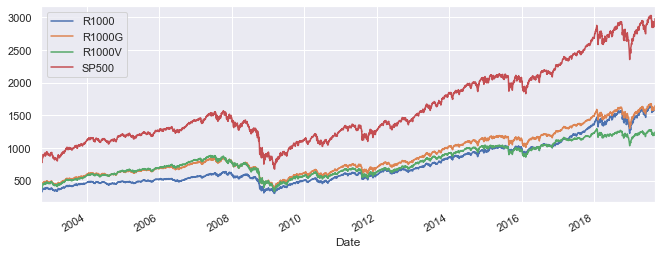

In [2]:
# Download US Indices from Yahoo API
# S&P 500, Russel 1000, R1000V, R1000G
US_Indices = ["^GSPC","^RUI",'^RLV','^RLG']
US_data = yf.download(US_Indices)
Indice_1 = US_data['Adj Close'].dropna()
Indice_1 = Indice_1.rename(columns={'^GSPC':'SP500','^RUI':'R1000G','^RLV':'R1000V','^RLG':'R1000'})
Indice_1 = Indice_1.sort_index(axis=1)
Indice_1
sns.set(rc={'figure.figsize':(11, 4)})
Indice_1.plot()

R1000    R1000G    R1000V     SP500
Date                                              
2002-10-01  0.038342  0.037246  0.036111  0.039243
2002-10-02 -0.019260 -0.024220 -0.029403 -0.023870
2002-10-03 -0.010669 -0.011619 -0.012625 -0.010881
2002-10-04 -0.023109 -0.023462 -0.023849 -0.022687
2002-10-07 -0.016391 -0.019636 -0.023102 -0.019296
2002-10-08  0.021835  0.015474  0.008664  0.016757
2002-10-09 -0.021293 -0.027604 -0.034445 -0.027666
2002-10-10  0.028642  0.034923  0.041727  0.034368
2002-10-11  0.036439  0.037717  0.039107  0.038315
2002-10-14  0.012015  0.007785  0.003222  0.007300
2002-10-15  0.043680  0.045649  0.047785  0.046249
2002-10-16 -0.027625 -0.024873 -0.021934 -0.024408
2002-10-17  0.021731  0.023670  0.025761  0.022057
2002-10-18  0.008135  0.004976  0.001594  0.005886
2002-10-21  0.013712  0.017033  0.020580  0.017185
2002-10-22 -0.013632 -0.011167 -0.008540 -0.010682
2002-10-23  0.007567  0.006550  0.005481  0.006695
2002-10-24 -0.016965 -0.015287 -0.013469 -0.015338
2002-10-25  0.019844  0.017292  0.014549  0.017021
2002-10-28 -0.012233 -0.007939 -0.003396 -0.008300
2002-10-29 -0.008203 -0.009804 -0.011465 -0.009118
2002-10-30  0.008043  0.010335  0.012746  0.009657
2002-10-31 -0.003504 -0.004727 -0.006019 -0.005573
2002-11-01  0.016372  0.017057  0.017798  0.017015
2002-11-04  0.009027  0.007817  0.006564  0.008169
2002-11-05  0.006484  0.007219  0.007962  0.007720
2002-11-06  0.011227  0.009238  0.007131  0.009102
2002-11-07 -0.019515 -0.023100 -0.026925 -0.023117
2002-11-08 -0.011662 -0.009476 -0.007150 -0.008802
2002-11-11 -0.021816 -0.020845 -0.019800 -0.020950
...              ...       ...       ...       ...
2019-07-25 -0.006943 -0.005703 -0.004417 -0.005276
2019-07-26  0.010039  0.007613  0.005082  0.007360
2019-07-29 -0.002920 -0.002089 -0.001213 -0.001617
2019-07-30 -0.003416 -0.002093 -0.000721 -0.002582
2019-07-31 -0.011046 -0.010673 -0.010288 -0.010945
2019-08-01 -0.005411 -0.009443 -0.013649 -0.009040
2019-08-02 -0.010672 -0.007992 -0.005191 -0.007309
2019-08-05 -0.033599 -0.030348 -0.026964 -0.030230
2019-08-06  0.015627  0.013049  0.010374  0.012933
2019-08-07  0.004272  0.001165 -0.002094  0.000767
2019-08-08  0.021596  0.018914  0.016107  0.018588
2019-08-09 -0.007377 -0.007019 -0.006648 -0.006639
2019-08-12 -0.011650 -0.012045 -0.013066 -0.012394
2019-08-13  0.017751  0.013874  0.010375  0.015018
2019-08-14 -0.030474 -0.029672 -0.028829 -0.029730
2019-08-15  0.002270  0.002160  0.002049  0.002461
2019-08-16  0.014388  0.014633  0.014894  0.014323
2019-08-19  0.012421  0.011551  0.010628  0.012033
2019-08-20 -0.005934 -0.007632 -0.009439 -0.007946
2019-08-21  0.010233  0.008269  0.006179  0.008213
2019-08-22 -0.002113 -0.000538  0.001131 -0.000506
2019-08-23 -0.027127 -0.026035 -0.024871 -0.026289
2019-08-26  0.012210  0.010488  0.008656  0.010923
2019-08-27 -0.002149 -0.003679 -0.005319 -0.003208
2019-08-28  0.004111  0.006318  0.008677  0.006524
2019-08-29  0.013775  0.012722  0.011602  0.012607
2019-08-30 -0.001312  0.000599  0.002638  0.000643
2019-09-03 -0.009619 -0.007255 -0.004741 -0.006923
2019-09-04  0.010676  0.010758  0.010842  0.010784
2019-09-05  0.015020  0.012864  0.010581  0.012926

[4257 rows x 4 columns]

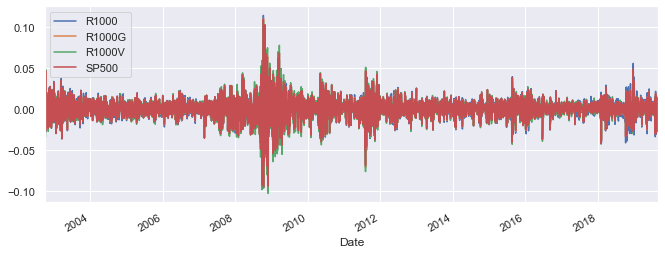

In [3]:
# Take log difference --> Return
TR_1 = np.log(Indice_1).diff().dropna()
TR_1
TR_1.plot()

R1000    R1000G     R1000V     SP500
Date                                               
2002-10-01  8.710151  7.831176   6.907849  8.291442
2002-11-01  5.192548  5.500032   5.822577  5.550058
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984
2003-03-01  1.749153  0.887685  -0.025528  0.832287
2003-04-01  7.076132  7.636873   8.234498  7.792735
2003-05-01  4.777050  5.372610   5.996177  4.964567
2003-06-01  1.251348  1.166838   1.079230  1.125863
2003-07-01  2.402049  1.831130   1.248816  1.609351
2003-08-01  2.361945  1.850221   1.320796  1.771534
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623
2003-10-01  5.379164  5.548351   5.724132  5.350427
2003-11-01  0.945482  1.027573   1.113868  0.710323
2003-12-01  3.282110  4.513700   5.770335  4.951890
2004-01-01  1.982772  1.775387   1.564719  1.712888
2004-02-01  0.508854  1.210404   1.914144  1.213510
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339
2004-05-01  1.738915  1.270972   0.795082  1.201102
2004-06-01  1.137139  1.639801   2.147690  1.782919
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224
2004-08-01 -0.628061  0.319647   1.204977  0.228472
2004-09-01  0.879950  1.109106   1.319269  0.932034
2004-10-01  1.491633  1.474818   1.458525  1.391696
2004-11-01  3.255415  4.012631   4.706808  3.786878
2004-12-01  3.764679  3.394976   3.057709  3.194249
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575
2005-02-01  0.929152  2.020492   2.990637  1.872693
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275
...              ...       ...        ...       ...
2017-04-01  2.181269  0.940558  -0.331047  0.905014
2017-05-01  2.383220  1.033628  -0.384645  1.150972
2017-06-01 -0.377620  0.547824   1.437704  0.480228
2017-07-01  2.555833  1.847336   1.162697  1.916396
2017-08-01  1.633451  0.075963  -1.459676  0.054634
2017-09-01  1.201057  1.972947   2.740088  1.911896
2017-10-01  3.733605  2.162013   0.580499  2.194560
2017-11-01  2.799006  2.763013   2.727175  2.769552
2017-12-01  0.693780  0.975856   1.263428  0.978360
2018-01-01  6.785496  5.248504   3.659400  5.465742
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251
2018-04-01  0.280503  0.232515   0.181893  0.271511
2018-05-01  4.114378  2.291228   0.302141  2.137820
2018-06-01  0.861540  0.507924   0.069077  0.483071
2018-07-01  2.842282  3.283340   3.714599  3.538798
2018-08-01  5.162683  3.175230   1.203347  2.981432
2018-09-01  0.473600  0.238122  -0.000802  0.428511
2018-10-01 -9.422744 -7.448538  -5.479570 -7.192935
2018-11-01  0.863638  1.779685   2.665644  1.770178
2018-12-01 -9.086627 -9.719585 -10.337158 -9.626529
2019-01-01  8.555235  7.920548   7.293949  7.574215
2019-02-01  3.335416  3.112511   2.890544  2.929559
2019-03-01  2.703876  1.572581   0.430165  1.776554
2019-04-01  4.367489  3.850449   3.317437  3.856034
2019-05-01 -6.694529 -6.811259  -6.931850 -6.804089
2019-06-01  6.538344  6.636460   6.737567  6.665832
2019-07-01  2.173951  1.425017   0.649843  1.304277
2019-08-01 -0.916309 -2.066102  -3.275920 -1.825731
2019-09-01  1.607720  1.636714   1.668274  1.678662

[204 rows x 4 columns]

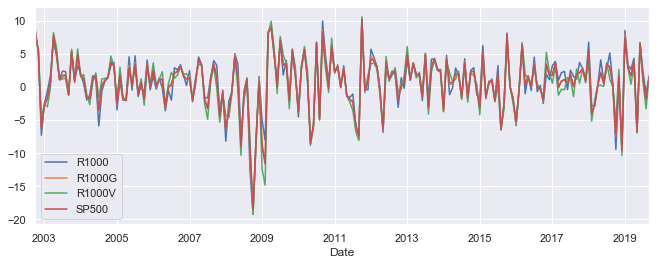

In [4]:
# Calculate Monthly Return
TR_1_M = TR_1.resample('MS').sum()*100
TR_1_M
TR_1_M.plot()

### 2. Forecasting US Indices

#### 2.1 Data Preparation

* Leading Indicators

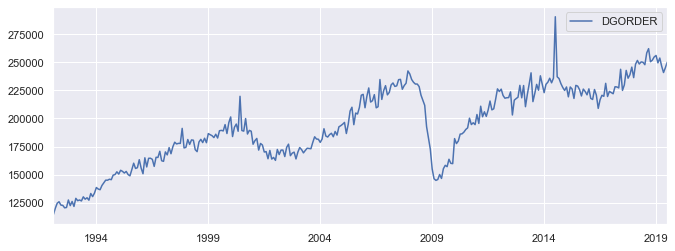

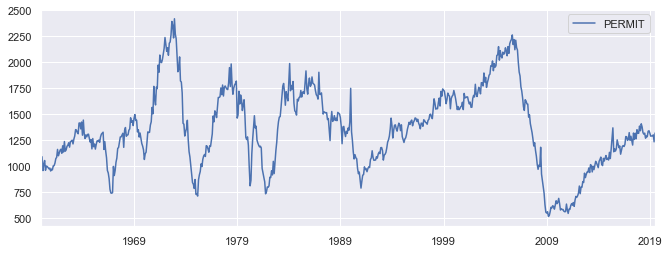

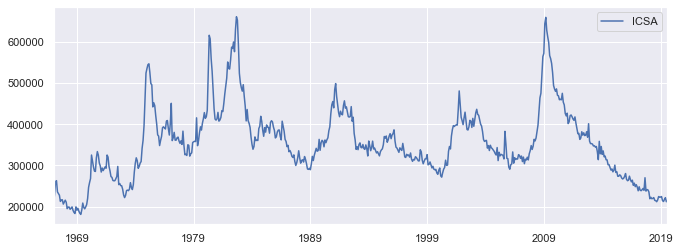

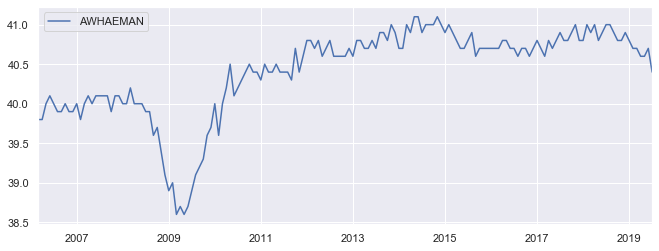

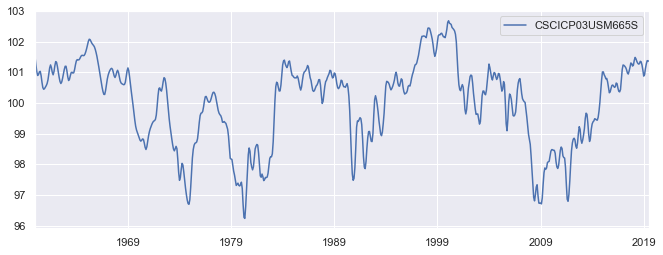

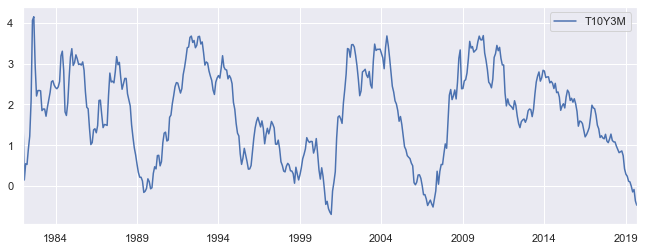

In [5]:
# Leading Indicators
fred = Fred(api_key='c61f0bb859e22e163419d6e5cf28655b')
leading_fred = ['DGORDER','PERMIT','ICSA','AWHAEMAN','CSCICP03USM665S','T10Y3M']
leading_df = {}
for i in range(0,len(leading_fred)):
    data = fred.get_series(leading_fred[i]).dropna()
    data_series = pd.DataFrame(data,columns=[leading_fred[i]])
    data_series = data_series.resample('MS').mean().dropna()
    data_series.plot()
    leading_df[leading_fred[i]] = data_series

In [6]:
# Seasonally Adjusted
for i in range(0,len(leading_fred)):
    leading_df[leading_fred[i]] = leading_df[leading_fred[i]].diff(periods=12).dropna()

# Merge all Indicators and TRs
def Merge(df,fred):
    merge = df[fred[0]]
    for i in range(0,len(fred)-1):
        merge = pd.concat([merge,df[fred[i+1]]],join='inner',axis=1)
    merge1 = pd.concat([TR_1_M,merge],join='inner',axis=1)
    merge1 = merge1.dropna()
    
    return merge1

merge1 = Merge(leading_df,leading_fred)
merge1

R1000     R1000G     R1000V      SP500  DGORDER  PERMIT  \
Date                                                                      
2007-03-01   0.437771   0.946512   1.396057   0.993048   2714.0  -522.0   
2007-04-01   4.554631   4.022540   3.482900   4.237984  17002.0  -528.0   
2007-05-01   3.396883   3.326011   3.253277   3.203072  12732.0  -412.0   
2007-06-01  -1.599981  -2.051701  -2.514395  -1.797693   7841.0  -460.0   
2007-07-01  -1.624289  -3.238209  -4.872727  -3.250450  25082.0  -402.0   
2007-08-01   1.451094   1.343026   0.824544   1.278156  24360.0  -401.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828  -8672.0  -394.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  12335.0  -378.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279   6579.0  -311.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  13107.0  -489.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  18638.0  -532.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  11501.0  -584.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741   2338.0  -629.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094   -965.0  -462.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759   2129.0  -498.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355   -619.0  -227.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830 -13766.0  -440.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680 -18491.0  -463.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079 -14337.0  -464.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649 -36599.0  -456.0   
2008-11-01  -8.524662  -8.180672  -7.839137  -7.779835 -48601.0  -598.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114 -69663.0  -595.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989 -84653.0  -549.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654 -88425.0  -456.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274 -87374.0  -454.0   
2009-04-01   9.069183   9.489713   9.965882   8.977221 -85049.0  -487.0   
2009-05-01   4.631017   5.131951   5.691168   5.172056 -80598.0  -439.0   
2009-06-01   0.955655   0.063731  -0.947814   0.019582 -81856.0  -579.0   
2009-07-01   6.778741   7.220907   7.681294   7.152198 -65597.0  -326.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932 -58076.0  -242.0   
...               ...        ...        ...        ...      ...     ...   
2017-02-01   3.893583   3.570075   3.251692   3.652310   4141.0    55.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931  11327.0   173.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014   2289.0    93.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972   6350.0    13.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  34839.0   121.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396   8251.0    68.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634   9252.0   108.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  23082.0   -22.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560   4553.0    68.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  19402.0    68.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360  21647.0    58.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742  13319.0    63.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  26307.0    92.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  23443.0   120.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511  20423.0   131.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820  23188.0   120.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071   6234.0   -11.0   
2018-07-01   2.842282   3.283340   3.714599   3.538798  22910.0    61.0   
2018-08-01   5.162683   3.175230   1.203347   2.981432  28466.0   -48.0   
2018-09-01   0.473600   0.238122  -0.000802   0.428511  19387.0    27.0   
2018-10-01  -9.422744  -7.448538  -5.4795

In [7]:
# ADF Test: test whether the series is stationary or not, take the difference if not stationary
# drop the indicator if not stationary after taking difference three times
def ADF_Test(df_diff):
    index_remove2 = []
    for i in range(3,df_diff.shape[1]):
        k = 0
        for j in range(0,3):
            pValue = ts.adfuller(df_diff.iloc[:,i].values)[1]
            # If p-value>0.05, do not reject null hypothesis that the series is non-stationary
            if pValue>0.05:
                k = k + 1
                df_diff.iloc[:,i] = df_diff.iloc[:,i].diff()
                df_diff = df_diff.dropna()
        df_diff.iloc[:,i].plot()
        if k == 3:
            index_remove2.append(i) 
            
        print(k)
    df_diff = df_diff.drop(df_diff.columns[index_remove2],axis=1) # drop columns whose p-value>0.05
#     df_diff = df_diff.reset_index(drop=True)
    
    return index_remove2,df_diff

0
1
1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value



1
1
0
1


[]

R1000     R1000G     R1000V      SP500  DGORDER  PERMIT  \
Date                                                                      
2007-08-01   1.451094   1.343026   0.824544   1.278156   -722.0     1.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828 -33032.0     7.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  21007.0    16.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0    67.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  -178.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391   5531.0   -43.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   -52.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0   -45.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094  -3303.0   167.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759   3094.0   -36.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   271.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  -213.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  -4725.0   -23.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079   4154.0    -1.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0     8.0   
2008-11-01  -8.524662  -8.180672  -7.839137  -7.779835 -12002.0  -142.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114 -21062.0     3.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0    46.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0    93.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274   1051.0     2.0   
2009-04-01   9.069183   9.489713   9.965882   8.977221   2325.0   -33.0   
2009-05-01   4.631017   5.131951   5.691168   5.172056   4451.0    48.0   
2009-06-01   0.955655   0.063731  -0.947814   0.019582  -1258.0  -140.0   
2009-07-01   6.778741   7.220907   7.681294   7.152198  16259.0   253.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932   7521.0    84.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010   3443.0    54.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987  25614.0    35.0   
2009-11-01   5.747930   5.479906   5.206403   5.577902   6264.0   150.0   
2009-12-01   2.910690   2.247248   1.571612   1.761455   9834.0   113.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514  39990.0   -19.0   
...               ...        ...        ...        ...      ...     ...   
2017-02-01   3.893583   3.570075   3.251692   3.652310   7490.0   -90.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   7186.0   118.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9038.0   -80.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972   4061.0   -80.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  28489.0   108.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396 -26588.0   -53.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634   1001.0    40.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  13830.0  -130.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -18529.0    90.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  14849.0     0.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360   2245.0   -10.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742  -8328.0     5.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  12988.0    29.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0    28.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511  -3020.0    11.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2765.0   -11.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071 -16954.0  -131.0   
2018-07-01   2.842282   3.283340   3.714599   3.538798  16676.0    72.0   
2018-08-01   5.162683   3.175230   1.203347   2.981432   5556.0  -109.0   
2018-09-01   0.473600   0.238122  -0.000802   0.428511  -9079.0    75.0   
2018-10-01  -9.422744  -7.448538  -5.4795

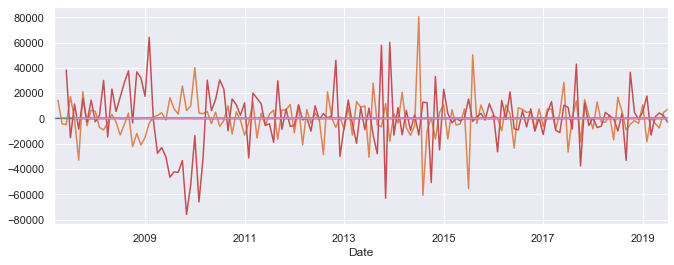

In [8]:
merge1_diff = merge1.copy()
[index_remove2,merge1_differenced] = ADF_Test(merge1_diff)
index_remove2
merge1_differenced

* Coincident Indicators

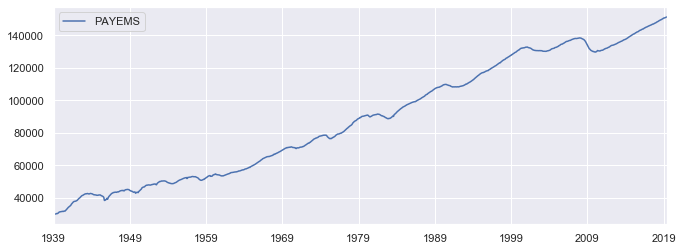

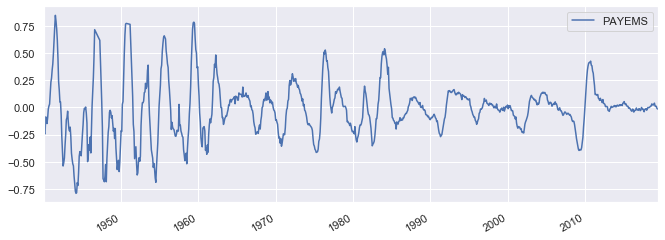

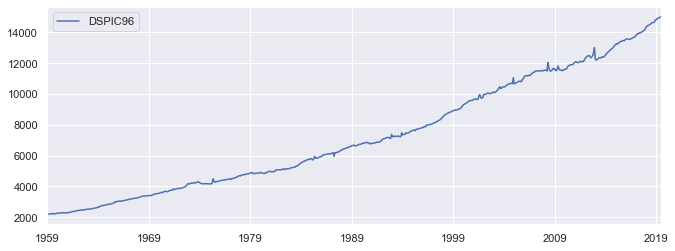

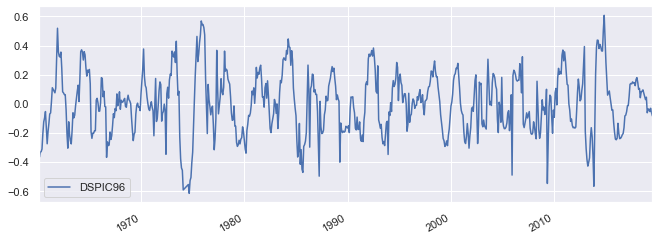

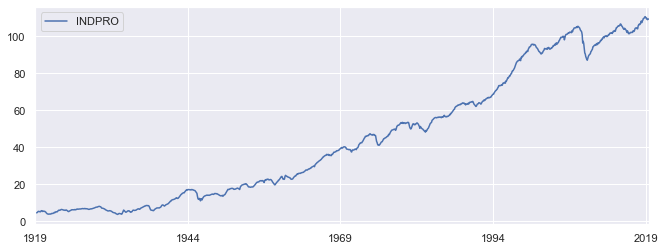

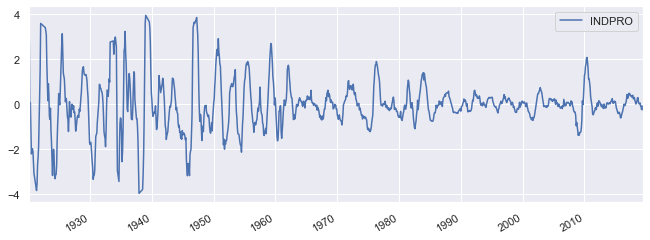

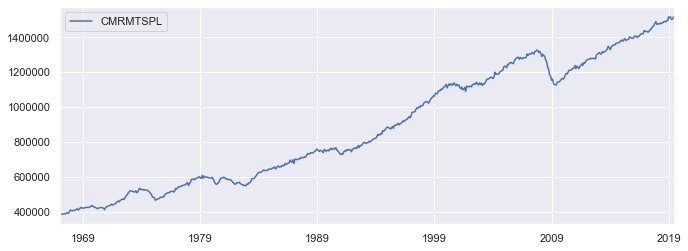

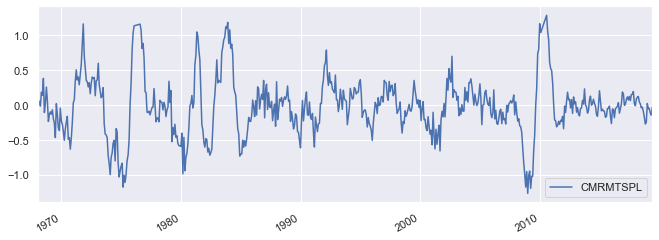

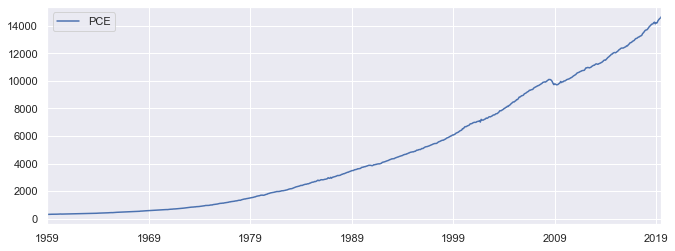

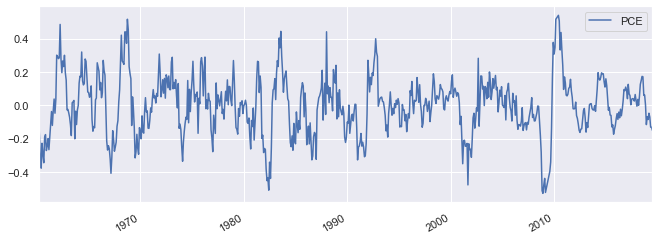

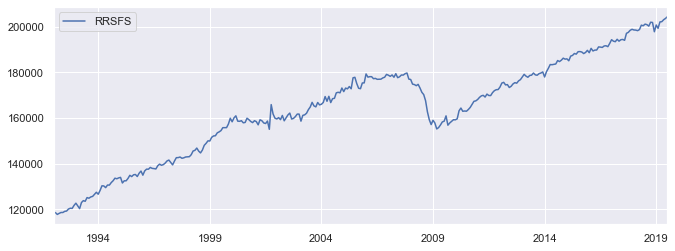

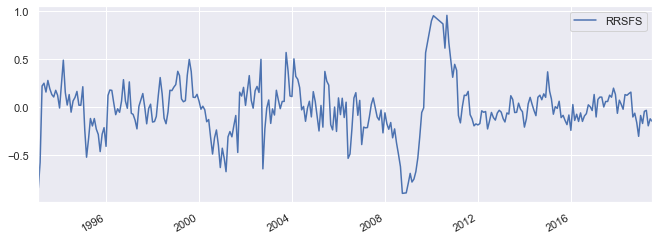

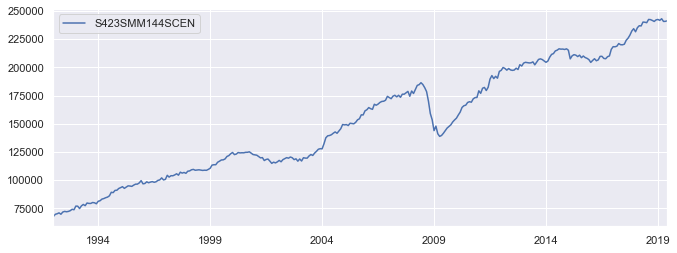

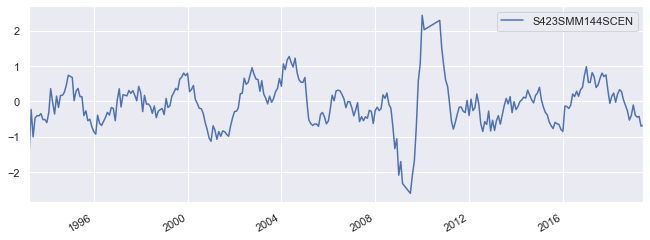

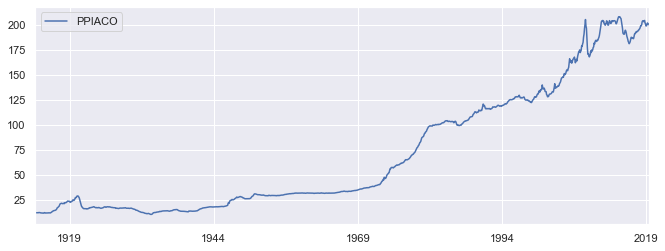

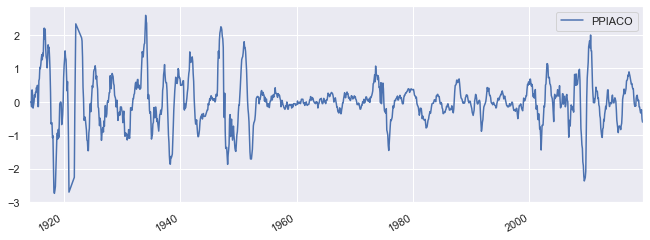

In [9]:
# Coincident Indicators from Fred Data
coincident_fred = ['PAYEMS','DSPIC96','INDPRO','CMRMTSPL','PCE','RRSFS','S423SMM144SCEN','PPIACO']
coincident_df = {}
for i in range(0,len(coincident_fred)):
    data = fred.get_series(coincident_fred[i]).dropna()
    data_series = pd.DataFrame(data,columns=[coincident_fred[i]])
    data_series = data_series.resample('MS').sum().dropna()
    data_series.plot()
    # take log difference to get the growth rate
    data_series = np.log(data_series).diff().dropna()*100
    # eliminate seasonality
    data_series = data_series.diff(periods=12).dropna()
    # eliminate trend by calculating the 12-month rolling window average
    data_series = data_series.rolling(12, min_periods=1).mean()
    # eliminate outlier
    z = np.abs(stats.zscore(data_series))
    data_series_o = data_series[(z < 3).all(axis=1)]
    data_series_o.plot()
    coincident_df[coincident_fred[i]] = data_series_o
#     data_series

In [10]:
merge2 = Merge(coincident_df,coincident_fred)
merge2.index.name='Date'
merge2

R1000    R1000G     R1000V     SP500    PAYEMS   DSPIC96  \
Date                                                                      
2002-10-01  8.710151  7.831176   6.907849  8.291442  0.004206  0.147638   
2002-11-01  5.192548  5.500032   5.822577  5.550058  0.055747  0.131342   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.139069   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749  0.099263 -0.139311   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984  0.111199 -0.159950   
2003-03-01  1.749153  0.887685  -0.025528  0.832287  0.097305 -0.113320   
2003-04-01  7.076132  7.636873   8.234498  7.792735  0.088249 -0.151563   
2003-05-01  4.777050  5.372610   5.996177  4.964567  0.084787 -0.163442   
2003-06-01  1.251348  1.166838   1.079230  1.125863  0.071424 -0.175391   
2003-07-01  2.402049  1.831130   1.248816  1.609351  0.075028  0.099308   
2003-08-01  2.361945  1.850221   1.320796  1.771534  0.063512  0.305734   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623  0.064845  0.137041   
2003-10-01  5.379164  5.548351   5.724132  5.350427  0.041608 -0.007681   
2003-11-01  0.945482  1.027573   1.113868  0.710323  0.024424  0.014362   
2003-12-01  3.282110  4.513700   5.770335  4.951890  0.039912 -0.012750   
2004-01-01  1.982772  1.775387   1.564719  1.712888  0.029517  0.142816   
2004-02-01  0.508854  1.210404   1.914144  1.213510  0.042996  0.207337   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422  0.089058  0.198603   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.175951   
2004-05-01  1.738915  1.270972   0.795082  1.201102  0.123371  0.122251   
2004-06-01  1.137139  1.639801   2.147690  1.782919  0.132695  0.098532   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224  0.130750 -0.110267   
2004-08-01 -0.628061  0.319647   1.204977  0.228472  0.141555 -0.199733   
2004-09-01  0.879950  1.109106   1.319269  0.932034  0.132088  0.009624   
2004-10-01  1.491633  1.474818   1.458525  1.391696  0.137182 -0.026069   
2004-11-01  3.255415  4.012631   4.706808  3.786878  0.137768 -0.128237   
2004-12-01  3.764679  3.394976   3.057709  3.194249  0.121626  0.180742   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575  0.114541 -0.108001   
2005-02-01  0.929152  2.020492   2.990637  1.872693  0.114898 -0.155212   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275  0.069097 -0.172507   
...              ...       ...        ...       ...       ...       ...   
2017-01-01  3.246062  1.889957   0.577924  1.772630 -0.009963 -0.055815   
2017-02-01  3.893583  3.570075   3.251692  3.652310 -0.014195 -0.014403   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931 -0.029552 -0.013215   
2017-04-01  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.051418   
2017-05-01  2.383220  1.033628  -0.384645  1.150972  0.000219  0.132718   
2017-06-01 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.138756   
2017-07-01  2.555833  1.847336   1.162697  1.916396 -0.019362  0.135844   
2017-08-01  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.149686   
2017-09-01  1.201057  1.972947   2.740088  1.911896 -0.039417  0.142135   
2017-10-01  3.733605  2.162013   0.580499  2.194560 -0.019566  0.144583   
2017-11-01  2.799006  2.763013   2.727175  2.769552 -0.012921  0.123598   
2017-12-01  0.693780  0.975856   1.263428  0.978360 -0.011428  0.166386   
2018-01-01  6.785496  5.248504   3.659400  5.465742 -0.025392  0.179005   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.143896   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.098867   
2018-04-01  0.280503  0.232515   0.181893  0.271511 -0.001193  0.104738   
2018-05-01  4.114378  2.291228   0.302141  2.137820  0.000228  0.040590   
2018-06-01  0.861540  0.507924   0.069077  0.483071  0.005141  0.082971   
2018-07-01  2.842282  3.283340   3.714599  3.538798  0.011299  0.083943   
2018-08-01  5.162683  3.175230   1.203347  2.981432  0.013591  0.094578   
2018-09-01  0.473600  0.238122  -0.00080

0
0
0
0
0
0
0
0
0


[]

R1000    R1000G     R1000V     SP500    PAYEMS   DSPIC96  \
Date                                                                      
2002-10-01  8.710151  7.831176   6.907849  8.291442  0.004206  0.147638   
2002-11-01  5.192548  5.500032   5.822577  5.550058  0.055747  0.131342   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.139069   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749  0.099263 -0.139311   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984  0.111199 -0.159950   
2003-03-01  1.749153  0.887685  -0.025528  0.832287  0.097305 -0.113320   
2003-04-01  7.076132  7.636873   8.234498  7.792735  0.088249 -0.151563   
2003-05-01  4.777050  5.372610   5.996177  4.964567  0.084787 -0.163442   
2003-06-01  1.251348  1.166838   1.079230  1.125863  0.071424 -0.175391   
2003-07-01  2.402049  1.831130   1.248816  1.609351  0.075028  0.099308   
2003-08-01  2.361945  1.850221   1.320796  1.771534  0.063512  0.305734   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623  0.064845  0.137041   
2003-10-01  5.379164  5.548351   5.724132  5.350427  0.041608 -0.007681   
2003-11-01  0.945482  1.027573   1.113868  0.710323  0.024424  0.014362   
2003-12-01  3.282110  4.513700   5.770335  4.951890  0.039912 -0.012750   
2004-01-01  1.982772  1.775387   1.564719  1.712888  0.029517  0.142816   
2004-02-01  0.508854  1.210404   1.914144  1.213510  0.042996  0.207337   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422  0.089058  0.198603   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.175951   
2004-05-01  1.738915  1.270972   0.795082  1.201102  0.123371  0.122251   
2004-06-01  1.137139  1.639801   2.147690  1.782919  0.132695  0.098532   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224  0.130750 -0.110267   
2004-08-01 -0.628061  0.319647   1.204977  0.228472  0.141555 -0.199733   
2004-09-01  0.879950  1.109106   1.319269  0.932034  0.132088  0.009624   
2004-10-01  1.491633  1.474818   1.458525  1.391696  0.137182 -0.026069   
2004-11-01  3.255415  4.012631   4.706808  3.786878  0.137768 -0.128237   
2004-12-01  3.764679  3.394976   3.057709  3.194249  0.121626  0.180742   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575  0.114541 -0.108001   
2005-02-01  0.929152  2.020492   2.990637  1.872693  0.114898 -0.155212   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275  0.069097 -0.172507   
...              ...       ...        ...       ...       ...       ...   
2017-01-01  3.246062  1.889957   0.577924  1.772630 -0.009963 -0.055815   
2017-02-01  3.893583  3.570075   3.251692  3.652310 -0.014195 -0.014403   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931 -0.029552 -0.013215   
2017-04-01  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.051418   
2017-05-01  2.383220  1.033628  -0.384645  1.150972  0.000219  0.132718   
2017-06-01 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.138756   
2017-07-01  2.555833  1.847336   1.162697  1.916396 -0.019362  0.135844   
2017-08-01  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.149686   
2017-09-01  1.201057  1.972947   2.740088  1.911896 -0.039417  0.142135   
2017-10-01  3.733605  2.162013   0.580499  2.194560 -0.019566  0.144583   
2017-11-01  2.799006  2.763013   2.727175  2.769552 -0.012921  0.123598   
2017-12-01  0.693780  0.975856   1.263428  0.978360 -0.011428  0.166386   
2018-01-01  6.785496  5.248504   3.659400  5.465742 -0.025392  0.179005   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.143896   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.098867   
2018-04-01  0.280503  0.232515   0.181893  0.271511 -0.001193  0.104738   
2018-05-01  4.114378  2.291228   0.302141  2.137820  0.000228  0.040590   
2018-06-01  0.861540  0.507924   0.069077  0.483071  0.005141  0.082971   
2018-07-01  2.842282  3.283340   3.714599  3.538798  0.011299  0.083943   
2018-08-01  5.162683  3.175230   1.203347  2.981432  0.013591  0.094578   
2018-09-01  0.473600  0.238122  -0.00080

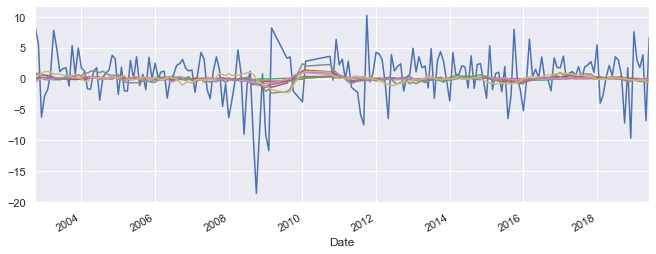

In [11]:
# ADF Test
merge2_diff = merge2.copy()

[index_remove2,merge2_differenced]=ADF_Test(merge2_diff)
index_remove2
merge2_differenced

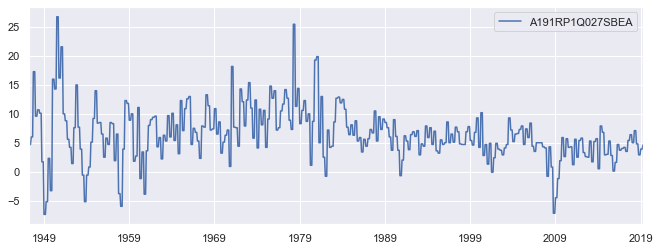

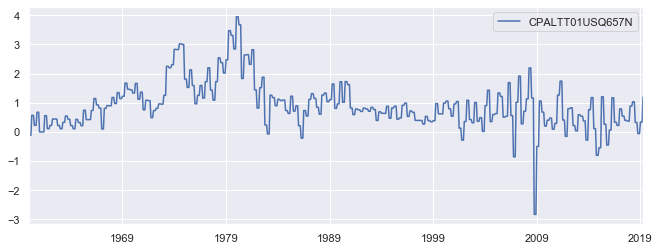

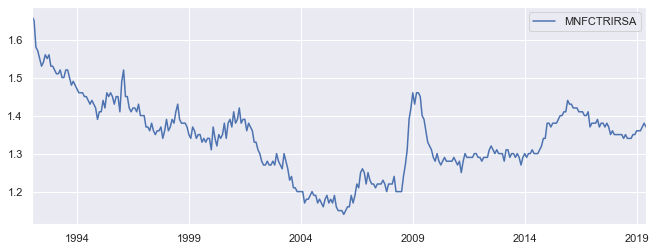

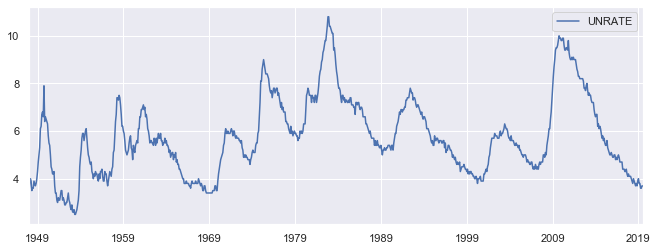

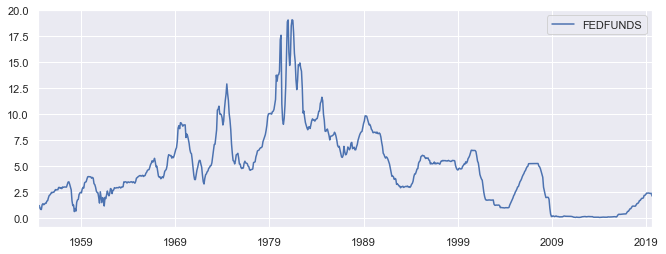

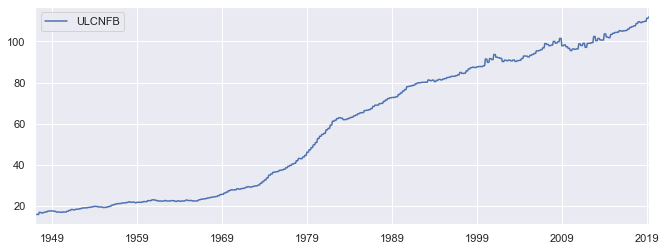

In [12]:
lagging_fred = ['A191RP1Q027SBEA','CPALTT01USQ657N','MNFCTRIRSA','UNRATE','FEDFUNDS','ULCNFB']
lagging_df = {}
for i in range(0,len(lagging_fred)):
    data = fred.get_series(lagging_fred[i]).dropna()
    data_series = pd.DataFrame(data,columns=[lagging_fred[i]])
    data_series = data_series.asfreq(freq='MS',method='ffill')
    data_series.plot()
#     data_series
    lagging_df[lagging_fred[i]] = data_series


In [13]:
# Eliminate Seasonality
for i in range(0,len(lagging_fred)):
    lagging_df[lagging_fred[i]] = lagging_df[lagging_fred[i]].diff(periods=12).dropna()
    lagging_df[lagging_fred[i]]

# Merge all Indicators and Indices
merge3 = Merge(lagging_df,lagging_fred)
merge3

A191RP1Q027SBEA
1948-04-01              6.0
1948-05-01              6.0
1948-06-01              6.0
1948-07-01              4.1
1948-08-01              4.1
1948-09-01              4.1
1948-10-01            -15.6
1948-11-01            -15.6
1948-12-01            -15.6
1949-01-01            -17.0
1949-02-01            -17.0
1949-03-01            -17.0
1949-04-01            -15.9
1949-05-01            -15.9
1949-06-01            -15.9
1949-07-01             -7.8
1949-08-01             -7.8
1949-09-01             -7.8
1949-10-01             -5.0
1949-11-01             -5.0
1949-12-01             -5.0
1950-01-01             23.4
1950-02-01             23.4
1950-03-01             23.4
1950-04-01             19.5
1950-05-01             19.5
1950-06-01             19.5
1950-07-01             24.5
1950-08-01             24.5
1950-09-01             24.5
...                     ...
2016-11-01              3.9
2016-12-01              3.9
2017-01-01              2.6
2017-02-01              2.6
2017-03-01              2.6
2017-04-01             -1.2
2017-05-01             -1.2
2017-06-01             -1.2
2017-07-01              1.7
2017-08-01              1.7
2017-09-01              1.7
2017-10-01              2.4
2017-11-01              2.4
2017-12-01              2.4
2018-01-01              0.8
2018-02-01              0.8
2018-03-01              0.8
2018-04-01              3.6
2018-05-01              3.6
2018-06-01              3.6
2018-07-01             -0.6
2018-08-01             -0.6
2018-09-01             -0.6
2018-10-01             -3.5
2018-11-01             -3.5
2018-12-01             -3.5
2019-01-01             -1.1
2019-02-01             -1.1
2019-03-01             -1.1
2019-04-01             -2.5

[853 rows x 1 columns]

CPALTT01USQ657N
1961-01-01         0.113379
1961-02-01         0.113379
1961-03-01         0.113379
1961-04-01        -0.567537
1961-05-01        -0.567537
1961-06-01        -0.567537
1961-07-01         0.333550
1961-08-01         0.333550
1961-09-01         0.333550
1961-10-01        -0.564441
1961-11-01        -0.564441
1961-12-01        -0.564441
1962-01-01         0.222222
1962-02-01         0.222222
1962-03-01         0.222222
1962-04-01         0.443459
1962-05-01         0.443459
1962-06-01         0.443459
1962-07-01        -0.117783
1962-08-01        -0.117783
1962-09-01        -0.117783
1962-10-01         0.108546
1962-11-01         0.108546
1962-12-01         0.108546
1963-01-01        -0.112573
1963-02-01        -0.112573
1963-03-01        -0.112573
1963-04-01        -0.114872
1963-05-01        -0.114872
1963-06-01        -0.114872
...                     ...
2016-11-01         0.672418
2016-12-01         0.672418
2017-01-01         0.726103
2017-02-01         0.726103
2017-03-01         0.726103
2017-04-01        -0.628833
2017-05-01        -0.628833
2017-06-01        -0.628833
2017-07-01         0.063934
2017-08-01         0.063934
2017-09-01         0.063934
2017-10-01         0.148055
2017-11-01         0.148055
2017-12-01         0.148055
2018-01-01         0.095381
2018-02-01         0.095381
2018-03-01         0.095381
2018-04-01         0.489558
2018-05-01         0.489558
2018-06-01         0.489558
2018-07-01        -0.069348
2018-08-01        -0.069348
2018-09-01        -0.069348
2018-10-01        -0.428124
2018-11-01        -0.428124
2018-12-01        -0.428124
2019-01-01        -0.551002
2019-02-01        -0.551002
2019-03-01        -0.551002
2019-04-01         0.165438

[700 rows x 1 columns]

MNFCTRIRSA
1993-01-01       -0.14
1993-02-01       -0.14
1993-03-01       -0.07
1993-04-01       -0.05
1993-05-01       -0.05
1993-06-01       -0.03
1993-07-01       -0.02
1993-08-01       -0.04
1993-09-01       -0.05
1993-10-01       -0.08
1993-11-01       -0.04
1993-12-01       -0.05
1994-01-01       -0.05
1994-02-01       -0.05
1994-03-01       -0.05
1994-04-01       -0.06
1994-05-01       -0.05
1994-06-01       -0.05
1994-07-01       -0.08
1994-08-01       -0.09
1994-09-01       -0.06
1994-10-01       -0.05
1994-11-01       -0.07
1994-12-01       -0.09
1995-01-01       -0.06
1995-02-01       -0.05
1995-03-01       -0.02
1995-04-01       -0.04
1995-05-01        0.01
1995-06-01        0.00
...                ...
2017-01-01       -0.05
2017-02-01       -0.05
2017-03-01       -0.04
2017-04-01       -0.03
2017-05-01       -0.05
2017-06-01       -0.03
2017-07-01       -0.03
2017-08-01       -0.04
2017-09-01       -0.02
2017-10-01       -0.03
2017-11-01       -0.06
2017-12-01       -0.01
2018-01-01       -0.03
2018-02-01       -0.03
2018-03-01       -0.03
2018-04-01       -0.04
2018-05-01       -0.02
2018-06-01       -0.04
2018-07-01       -0.03
2018-08-01       -0.03
2018-09-01       -0.04
2018-10-01       -0.03
2018-11-01        0.00
2018-12-01       -0.01
2019-01-01        0.01
2019-02-01        0.01
2019-03-01        0.01
2019-04-01        0.02
2019-05-01        0.03
2019-06-01        0.03

[318 rows x 1 columns]

UNRATE
1949-01-01     0.9
1949-02-01     0.9
1949-03-01     1.0
1949-04-01     1.4
1949-05-01     2.6
1949-06-01     2.6
1949-07-01     3.1
1949-08-01     2.9
1949-09-01     2.8
1949-10-01     4.2
1949-11-01     2.6
1949-12-01     2.6
1950-01-01     2.2
1950-02-01     1.7
1950-03-01     1.3
1950-04-01     0.5
1950-05-01    -0.6
1950-06-01    -0.8
1950-07-01    -1.7
1950-08-01    -2.3
1950-09-01    -2.2
1950-10-01    -3.7
1950-11-01    -2.2
1950-12-01    -2.3
1951-01-01    -2.8
1951-02-01    -3.0
1951-03-01    -2.9
1951-04-01    -2.7
1951-05-01    -2.5
1951-06-01    -2.2
...            ...
2017-02-01    -0.2
2017-03-01    -0.6
2017-04-01    -0.6
2017-05-01    -0.4
2017-06-01    -0.6
2017-07-01    -0.5
2017-08-01    -0.5
2017-09-01    -0.8
2017-10-01    -0.8
2017-11-01    -0.5
2017-12-01    -0.6
2018-01-01    -0.6
2018-02-01    -0.6
2018-03-01    -0.4
2018-04-01    -0.5
2018-05-01    -0.6
2018-06-01    -0.3
2018-07-01    -0.4
2018-08-01    -0.6
2018-09-01    -0.5
2018-10-01    -0.3
2018-11-01    -0.5
2018-12-01    -0.2
2019-01-01    -0.1
2019-02-01    -0.3
2019-03-01    -0.2
2019-04-01    -0.3
2019-05-01    -0.2
2019-06-01    -0.3
2019-07-01    -0.2

[847 rows x 1 columns]

FEDFUNDS
1955-07-01      0.88
1955-08-01      0.74
1955-09-01      1.12
1955-10-01      1.39
1955-11-01      1.52
1955-12-01      1.20
1956-01-01      1.06
1956-02-01      1.21
1956-03-01      1.15
1956-04-01      1.19
1956-05-01      1.32
1956-06-01      1.07
1956-07-01      1.07
1956-08-01      0.77
1956-09-01      0.77
1956-10-01      0.72
1956-11-01      0.53
1956-12-01      0.46
1957-01-01      0.39
1957-02-01      0.50
1957-03-01      0.46
1957-04-01      0.38
1957-05-01      0.25
1957-06-01      0.29
1957-07-01      0.24
1957-08-01      0.51
1957-09-01      0.52
1957-10-01      0.54
1957-11-01      0.40
1957-12-01      0.04
...              ...
2017-03-01      0.43
2017-04-01      0.53
2017-05-01      0.54
2017-06-01      0.66
2017-07-01      0.76
2017-08-01      0.76
2017-09-01      0.75
2017-10-01      0.75
2017-11-01      0.75
2017-12-01      0.76
2018-01-01      0.76
2018-02-01      0.76
2018-03-01      0.72
2018-04-01      0.79
2018-05-01      0.79
2018-06-01      0.78
2018-07-01      0.76
2018-08-01      0.75
2018-09-01      0.80
2018-10-01      1.04
2018-11-01      1.04
2018-12-01      0.97
2019-01-01      0.99
2019-02-01      0.98
2019-03-01      0.90
2019-04-01      0.73
2019-05-01      0.69
2019-06-01      0.56
2019-07-01      0.49
2019-08-01      0.22

[770 rows x 1 columns]

ULCNFB
1948-01-01   1.008
1948-02-01   1.008
1948-03-01   1.008
1948-04-01   1.283
1948-05-01   1.283
1948-06-01   1.283
1948-07-01   0.625
1948-08-01   0.625
1948-09-01   0.625
1948-10-01   1.022
1948-11-01   1.022
1948-12-01   1.022
1949-01-01   0.633
1949-02-01   0.633
1949-03-01   0.633
1949-04-01   0.215
1949-05-01   0.215
1949-06-01   0.215
1949-07-01  -0.485
1949-08-01  -0.485
1949-09-01  -0.485
1949-10-01  -0.537
1949-11-01  -0.537
1949-12-01  -0.537
1950-01-01  -0.609
1950-02-01  -0.609
1950-03-01  -0.609
1950-04-01  -0.310
1950-05-01  -0.310
1950-06-01  -0.310
...            ...
2016-11-01   0.757
2016-12-01   0.757
2017-01-01   1.799
2017-02-01   1.799
2017-03-01   1.799
2017-04-01   2.060
2017-05-01   2.060
2017-06-01   2.060
2017-07-01   2.276
2017-08-01   2.276
2017-09-01   2.276
2017-10-01   2.751
2017-11-01   2.751
2017-12-01   2.751
2018-01-01   2.786
2018-02-01   2.786
2018-03-01   2.786
2018-04-01   1.933
2018-05-01   1.933
2018-06-01   1.933
2018-07-01   1.992
2018-08-01   1.992
2018-09-01   1.992
2018-10-01   1.036
2018-11-01   1.036
2018-12-01   1.036
2019-01-01   1.706
2019-02-01   1.706
2019-03-01   1.706
2019-04-01   2.838

[856 rows x 1 columns]

R1000    R1000G     R1000V     SP500  A191RP1Q027SBEA  \
Date                                                                   
2002-10-01  8.710151  7.831176   6.907849  8.291442              0.5   
2002-11-01  5.192548  5.500032   5.822577  5.550058              0.5   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928              0.5   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749             -0.8   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984             -0.8   
2003-03-01  1.749153  0.887685  -0.025528  0.832287             -0.8   
2003-04-01  7.076132  7.636873   8.234498  7.792735              0.8   
2003-05-01  4.777050  5.372610   5.996177  4.964567              0.8   
2003-06-01  1.251348  1.166838   1.079230  1.125863              0.8   
2003-07-01  2.402049  1.831130   1.248816  1.609351              5.6   
2003-08-01  2.361945  1.850221   1.320796  1.771534              5.6   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623              5.6   
2003-10-01  5.379164  5.548351   5.724132  5.350427              4.3   
2003-11-01  0.945482  1.027573   1.113868  0.710323              4.3   
2003-12-01  3.282110  4.513700   5.770335  4.951890              4.3   
2004-01-01  1.982772  1.775387   1.564719  1.712888              1.1   
2004-02-01  0.508854  1.210404   1.914144  1.213510              1.1   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422              1.1   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339              1.8   
2004-05-01  1.738915  1.270972   0.795082  1.201102              1.8   
2004-06-01  1.137139  1.639801   2.147690  1.782919              1.8   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224             -2.7   
2004-08-01 -0.628061  0.319647   1.204977  0.228472             -2.7   
2004-09-01  0.879950  1.109106   1.319269  0.932034             -2.7   
2004-10-01  1.491633  1.474818   1.458525  1.391696              0.1   
2004-11-01  3.255415  4.012631   4.706808  3.786878              0.1   
2004-12-01  3.764679  3.394976   3.057709  3.194249              0.1   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575              2.7   
2005-02-01  0.929152  2.020492   2.990637  1.872693              2.7   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275              2.7   
...              ...       ...        ...       ...              ...   
2016-11-01  1.934488  3.604850   5.257402  3.360347              3.9   
2016-12-01  1.120583  1.704111   2.265861  1.803710              3.9   
2017-01-01  3.246062  1.889957   0.577924  1.772630              2.6   
2017-02-01  3.893583  3.570075   3.251692  3.652310              2.6   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931              2.6   
2017-04-01  2.181269  0.940558  -0.331047  0.905014             -1.2   
2017-05-01  2.383220  1.033628  -0.384645  1.150972             -1.2   
2017-06-01 -0.377620  0.547824   1.437704  0.480228             -1.2   
2017-07-01  2.555833  1.847336   1.162697  1.916396              1.7   
2017-08-01  1.633451  0.075963  -1.459676  0.054634              1.7   
2017-09-01  1.201057  1.972947   2.740088  1.911896              1.7   
2017-10-01  3.733605  2.162013   0.580499  2.194560              2.4   
2017-11-01  2.799006  2.763013   2.727175  2.769552              2.4   
2017-12-01  0.693780  0.975856   1.263428  0.978360              2.4   
2018-01-01  6.785496  5.248504   3.659400  5.465742              0.8   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612              0.8   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251              0.8   
2018-04-01  0.280503  0.232515   0.181893  0.271511              3.6   
2018-05-01  4.114378  2.291228   0.302141  2.137820              3.6   
2018-06-01  0.861540  0.507924   0.069077  0.483071              3.6   
2018-07-01  2.842282  3.283340   3.714599  3.538798             -0.6   
2018-08-01  5.162683  3.175230   1.203347  2.981432             -0.6   
2018-09-01  0.473600  0.238122  -0.000802  0.428511    

0
0
0
0
1
0
1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[]

R1000    R1000G     R1000V     SP500  A191RP1Q027SBEA  \
Date                                                                   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928              0.5   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749             -0.8   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984             -0.8   
2003-03-01  1.749153  0.887685  -0.025528  0.832287             -0.8   
2003-04-01  7.076132  7.636873   8.234498  7.792735              0.8   
2003-05-01  4.777050  5.372610   5.996177  4.964567              0.8   
2003-06-01  1.251348  1.166838   1.079230  1.125863              0.8   
2003-07-01  2.402049  1.831130   1.248816  1.609351              5.6   
2003-08-01  2.361945  1.850221   1.320796  1.771534              5.6   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623              5.6   
2003-10-01  5.379164  5.548351   5.724132  5.350427              4.3   
2003-11-01  0.945482  1.027573   1.113868  0.710323              4.3   
2003-12-01  3.282110  4.513700   5.770335  4.951890              4.3   
2004-01-01  1.982772  1.775387   1.564719  1.712888              1.1   
2004-02-01  0.508854  1.210404   1.914144  1.213510              1.1   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422              1.1   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339              1.8   
2004-05-01  1.738915  1.270972   0.795082  1.201102              1.8   
2004-06-01  1.137139  1.639801   2.147690  1.782919              1.8   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224             -2.7   
2004-08-01 -0.628061  0.319647   1.204977  0.228472             -2.7   
2004-09-01  0.879950  1.109106   1.319269  0.932034             -2.7   
2004-10-01  1.491633  1.474818   1.458525  1.391696              0.1   
2004-11-01  3.255415  4.012631   4.706808  3.786878              0.1   
2004-12-01  3.764679  3.394976   3.057709  3.194249              0.1   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575              2.7   
2005-02-01  0.929152  2.020492   2.990637  1.872693              2.7   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275              2.7   
2005-04-01 -1.970686 -1.979256  -1.985863 -2.031352             -1.8   
2005-05-01  4.584695  3.307338   2.170843  2.951222             -1.8   
...              ...       ...        ...       ...              ...   
2016-11-01  1.934488  3.604850   5.257402  3.360347              3.9   
2016-12-01  1.120583  1.704111   2.265861  1.803710              3.9   
2017-01-01  3.246062  1.889957   0.577924  1.772630              2.6   
2017-02-01  3.893583  3.570075   3.251692  3.652310              2.6   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931              2.6   
2017-04-01  2.181269  0.940558  -0.331047  0.905014             -1.2   
2017-05-01  2.383220  1.033628  -0.384645  1.150972             -1.2   
2017-06-01 -0.377620  0.547824   1.437704  0.480228             -1.2   
2017-07-01  2.555833  1.847336   1.162697  1.916396              1.7   
2017-08-01  1.633451  0.075963  -1.459676  0.054634              1.7   
2017-09-01  1.201057  1.972947   2.740088  1.911896              1.7   
2017-10-01  3.733605  2.162013   0.580499  2.194560              2.4   
2017-11-01  2.799006  2.763013   2.727175  2.769552              2.4   
2017-12-01  0.693780  0.975856   1.263428  0.978360              2.4   
2018-01-01  6.785496  5.248504   3.659400  5.465742              0.8   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612              0.8   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251              0.8   
2018-04-01  0.280503  0.232515   0.181893  0.271511              3.6   
2018-05-01  4.114378  2.291228   0.302141  2.137820              3.6   
2018-06-01  0.861540  0.507924   0.069077  0.483071              3.6   
2018-07-01  2.842282  3.283340   3.714599  3.538798             -0.6   
2018-08-01  5.162683  3.175230   1.203347  2.981432             -0.6   
2018-09-01  0.473600  0.238122  -0.000802  0.428511    

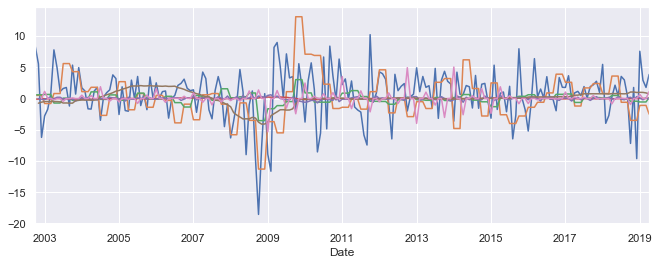

In [14]:
# ADF Test: test whether the series is stationary or not, take the difference if not stationary
merge3_diff = merge3.copy()

[index_remove3,merge3_differenced]=ADF_Test(merge3_diff)
index_remove3
merge3_differenced

#### 2.1.1 Forecast the returns for SP500

In [15]:
# Testing Causation using Granger’s Causality Test
maxlag = 12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# Grangers Causation Test, drop the indicator that do not pass the test
def causation_test(df_differenced,n,m):
    df_select = df_differenced.copy()
    df_select = pd.concat([df_select.iloc[:,n],df_select.iloc[:,m:]], axis=1)
    print(df_select)
    causation_matrix = grangers_causation_matrix(df_select, variables = df_select.columns)
    index_remove=[]
    for i in causation_matrix.iloc[0,1:]:
        if i>0.05:
            index_remove.append(causation_matrix.columns.get_loc((causation_matrix == i).idxmax(axis=1)[0])+m-1) 
            # get column index of indicators whose p-value>0.05
    df_differenced = df_differenced.drop(df_differenced.columns[index_remove],axis=1) # drop columns whose p-value>0.05
    return causation_matrix,index_remove,df_differenced

In [16]:
# Leading Indicators
[causation_matrix,index_remove,merge1_tested] = causation_test(merge1_differenced,3,4)
causation_matrix
index_remove
merge1_tested

                SP500  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-01   1.278156   -722.0     1.0  11300.0  1.000000e-01   
2007-09-01   3.516828 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-01   1.471356  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-01  -4.504279  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-01  -0.866593   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-01  -6.311391   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-01  -3.537971  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-01  -0.597741  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-01   4.645094  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-01   1.061759   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-01  -8.988355  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-01  -0.990830 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-01   1.211680  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-01  -9.518079   4

SP500_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
SP500_y             1.0000     0.0464    0.2384  0.0473      0.3905   
DGORDER_y           0.0038     1.0000    0.0894  0.0000      0.0000   
PERMIT_y            0.0071     0.0000    1.0000  0.0000      0.0017   
ICSA_y              0.0065     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y          0.0000     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y   0.0917     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y            0.0056     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
SP500_y                       0.0029    0.1866  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[5, 7, 9]

R1000     R1000G     R1000V      SP500  DGORDER     ICSA  \
Date                                                                       
2007-08-01   1.451094   1.343026   0.824544   1.278156   -722.0  11300.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828 -33032.0  -8550.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  21007.0  15550.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0  -3000.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  14450.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391   5531.0  -2700.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   2500.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0  30000.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094  -3303.0 -14750.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759   3094.0  23300.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   5500.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  16700.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  -4725.0  28250.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079   4154.0  37600.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0  -3600.0   
2008-11-01  -8.524662  -8.180672  -7.839137  -7.779835 -12002.0  36800.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114 -21062.0  32000.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0  17450.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0  64000.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274   1051.0  -1400.0   
2009-04-01   9.069183   9.489713   9.965882   8.977221   2325.0 -27600.0   
2009-05-01   4.631017   5.131951   5.691168   5.172056   4451.0 -23050.0   
2009-06-01   0.955655   0.063731  -0.947814   0.019582  -1258.0 -30200.0   
2009-07-01   6.778741   7.220907   7.681294   7.152198  16259.0 -46500.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932   7521.0 -42300.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010   3443.0 -42700.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987  25614.0 -33350.0   
2009-11-01   5.747930   5.479906   5.206403   5.577902   6264.0 -75950.0   
2009-12-01   2.910690   2.247248   1.571612   1.761455   9834.0 -52700.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514  39990.0 -13700.0   
...               ...        ...        ...        ...      ...      ...   
2017-02-01   3.893583   3.570075   3.251692   3.652310   7490.0   4650.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   7186.0  13250.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9038.0  -9250.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972   4061.0 -11250.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  28489.0  10500.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396 -26588.0   8750.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634   1001.0  -8500.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  13830.0  42950.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -18529.0 -37700.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  14849.0  12250.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360   2245.0  -5600.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742  -8328.0    600.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  12988.0  -7250.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0  -6200.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511  -3020.0   4700.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2765.0   2000.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071 -16954.0   -250.0   
2018-07-01   2.842282   3.283340   3.714599   3.538798  16676.0  -9950.0   
2018-08-01   5.162683   3.175230   1.203347   2.981432   5556.0   3950.0   
2018-09-01   0.473600   0.238122  -0.000802   0.428511  -9079.0 

In [17]:
# Coincident Indicators
[causation_matrix,index_remove,merge2_tested] = causation_test(merge2_differenced,3,4)
causation_matrix
index_remove
merge2_tested

               SP500    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                     
2002-10-01  8.291442  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-01  5.550058  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-01 -6.222928  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-01 -2.779749  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-01 -1.714984  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-01  0.832287  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-01  7.792735  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-01  4.964567  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-01  1.125863  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-01  1.609351  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-01  1.771534  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-01 -1.201623  0.064845  0.1370

SP500_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
SP500_y            1.0000    0.0134     0.4749    0.0001      0.0001  0.0693   
PAYEMS_y           0.0000    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y          0.3802    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y           0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y         0.0000    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y              0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y            0.0004    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y   0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y           0.0085    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
SP500_y            0.0054            0.0374    0.1321  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[5, 8, 11]

R1000    R1000G     R1000V     SP500    PAYEMS    INDPRO  \
Date                                                                      
2002-10-01  8.710151  7.831176   6.907849  8.291442  0.004206  0.594417   
2002-11-01  5.192548  5.500032   5.822577  5.550058  0.055747  0.721922   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.653793   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749  0.099263  0.558220   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984  0.111199  0.520974   
2003-03-01  1.749153  0.887685  -0.025528  0.832287  0.097305  0.346765   
2003-04-01  7.076132  7.636873   8.234498  7.792735  0.088249  0.193963   
2003-05-01  4.777050  5.372610   5.996177  4.964567  0.084787  0.074919   
2003-06-01  1.251348  1.166838   1.079230  1.125863  0.071424 -0.118949   
2003-07-01  2.402049  1.831130   1.248816  1.609351  0.075028 -0.090106   
2003-08-01  2.361945  1.850221   1.320796  1.771534  0.063512 -0.114520   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623  0.064845 -0.120675   
2003-10-01  5.379164  5.548351   5.724132  5.350427  0.041608 -0.094843   
2003-11-01  0.945482  1.027573   1.113868  0.710323  0.024424 -0.158581   
2003-12-01  3.282110  4.513700   5.770335  4.951890  0.039912 -0.080597   
2004-01-01  1.982772  1.775387   1.564719  1.712888  0.029517 -0.133349   
2004-02-01  0.508854  1.210404   1.914144  1.213510  0.042996 -0.108901   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422  0.089058 -0.044146   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.147298   
2004-05-01  1.738915  1.270972   0.795082  1.201102  0.123371  0.243577   
2004-06-01  1.137139  1.639801   2.147690  1.782919  0.132695  0.225641   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224  0.130750  0.196384   
2004-08-01 -0.628061  0.319647   1.204977  0.228472  0.141555  0.227405   
2004-09-01  0.879950  1.109106   1.319269  0.932034  0.132088  0.148172   
2004-10-01  1.491633  1.474818   1.458525  1.391696  0.137182  0.178421   
2004-11-01  3.255415  4.012631   4.706808  3.786878  0.137768  0.111338   
2004-12-01  3.764679  3.394976   3.057709  3.194249  0.121626  0.143311   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575  0.114541  0.202333   
2005-02-01  0.929152  2.020492   2.990637  1.872693  0.114898  0.170623   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275  0.069097  0.221187   
...              ...       ...        ...       ...       ...       ...   
2017-01-01  3.246062  1.889957   0.577924  1.772630 -0.009963  0.248374   
2017-02-01  3.893583  3.570075   3.251692  3.652310 -0.014195  0.293057   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931 -0.029552  0.457961   
2017-04-01  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.466704   
2017-05-01  2.383220  1.033628  -0.384645  1.150972  0.000219  0.456029   
2017-06-01 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.368182   
2017-07-01  2.555833  1.847336   1.162697  1.916396 -0.019362  0.371316   
2017-08-01  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.333770   
2017-09-01  1.201057  1.972947   2.740088  1.911896 -0.039417  0.301960   
2017-10-01  3.733605  2.162013   0.580499  2.194560 -0.019566  0.364163   
2017-11-01  2.799006  2.763013   2.727175  2.769552 -0.012921  0.383336   
2017-12-01  0.693780  0.975856   1.263428  0.978360 -0.011428  0.219900   
2018-01-01  6.785496  5.248504   3.659400  5.465742 -0.025392  0.250332   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.283491   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.152493   
2018-04-01  0.280503  0.232515   0.181893  0.271511 -0.001193  0.086693   
2018-05-01  4.114378  2.291228   0.302141  2.137820  0.000228 -0.009296   
2018-06-01  0.861540  0.507924   0.069077  0.483071  0.005141  0.062132   
2018-07-01  2.842282  3.283340   3.714599  3.538798  0.011299  0.126916   
2018-08-01  5.162683  3.175230   1.203347  2.981432  0.013591  0.265216   
2018-09-01  0.473600  0.238122  -0.00080

In [18]:
# Lagging Indicators
[causation_matrix,index_remove,merge3_tested] = causation_test(merge3_differenced,3,4)
causation_matrix
index_remove
merge3_tested

               SP500  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                 
2002-12-01 -6.222928              0.5         0.595036       -0.03   
2003-01-01 -2.779749             -0.8         0.654682       -0.05   
2003-02-01 -1.714984             -0.8         0.654682       -0.04   
2003-03-01  0.832287             -0.8         0.654682       -0.04   
2003-04-01  7.792735              0.8        -0.722454        0.02   
2003-05-01  4.964567              0.8        -0.722454        0.01   
2003-06-01  1.125863              0.8        -0.722454       -0.01   
2003-07-01  1.609351              5.6         0.063697       -0.05   
2003-08-01  1.771534              5.6         0.063697       -0.03   
2003-09-01 -1.201623              5.6         0.063697       -0.06   
2003-10-01  5.350427              4.3        -0.295709       -0.07   
2003-11-01  0.710323              4.3        -0.295709       -0.07   
2003-12-01  4.951890

SP500_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
SP500_y             1.0000             0.1344             0.0112   
A191RP1Q027SBEA_y   0.0001             1.0000             0.0958   
CPALTT01USQ657N_y   0.0005             0.1267             1.0000   
MNFCTRIRSA_y        0.0000             0.0000             0.0000   
UNRATE_y            0.0006             0.0000             0.0001   
FEDFUNDS_y          0.0139             0.0015             0.0000   
ULCNFB_y            0.0087             0.0003             0.0160   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
SP500_y                  0.1429    0.1691      0.0004    0.0413  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.6843  
MNFCTRIRSA_y             1.0000    0.0004      0.0000    0.1075  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0080    0.0299      1.0000    0.0091  
ULCNFB_y                 0.0010    0.0000      0.0120    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928         0.595036   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-01  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-01  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-01  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-01  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-01  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-01  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-01  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-01  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-01  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-01  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-01  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-01  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-01  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-01 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-01  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-01  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-01  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-01  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-01  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-01 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-01  4.584695  3.307338   2.170843  2.951222        -0.094369   
...              ...       ...        ...       ...              ...   
2016-11-01  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-01  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-01  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-01  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-01  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-01  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-01 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-01  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-01  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-01  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-01  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-01  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-01  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-01  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-01  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-01  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-01  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-01  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-01  5.162683  3.175230   1.203347  2.981432        -0.069348   
2018-09-01  0.473600  0.238122  -0.000802  0.428511    

* Create Composite and Forecast

In [19]:
# Merge the three forecasts based on the index "date"
df1_merge = pd.concat([merge1_tested,merge2_tested,merge3_tested],join='inner',axis=1).T.drop_duplicates().T
df1_merge
Indicator1 = df1_merge.iloc[:,4:]
Indicator1 = (Indicator1-Indicator1.mean())/Indicator1.std()
Composite1 = pd.DataFrame(Indicator1.mean(axis=1),columns={'Composite'})

new_df1 = pd.concat([df1_merge.iloc[:,:4],Composite1],join='inner',axis=1)
new_df1

R1000     R1000G     R1000V      SP500  DGORDER     ICSA  \
Date                                                                       
2007-08-01   1.451094   1.343026   0.824544   1.278156   -722.0  11300.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828 -33032.0  -8550.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  21007.0  15550.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0  -3000.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  14450.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391   5531.0  -2700.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   2500.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0  30000.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094  -3303.0 -14750.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759   3094.0  23300.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   5500.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  16700.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  -4725.0  28250.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079   4154.0  37600.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0  -3600.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114 -21062.0  32000.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0  17450.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0  64000.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274   1051.0  -1400.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932   7521.0 -42300.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010   3443.0 -42700.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987  25614.0 -33350.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514  39990.0 -13700.0   
2010-02-01   3.188464   3.014783   2.839627   2.811474   4259.0 -66050.0   
2010-10-01   4.597967   3.707909   2.803906   3.619300 -12300.0  15400.0   
2010-11-01   0.952730   0.102461  -0.775315  -0.229291   5247.0  10850.0   
2010-12-01   5.256990   6.316767   7.407668   6.325652  -1393.0   2500.0   
2011-01-01   2.459626   2.279742   2.096084   2.239299 -13302.0  12250.0   
2011-02-01   3.038365   3.211681   3.387347   3.145660  -3460.0 -31250.0   
2011-03-01   0.004941   0.112671   0.223371  -0.104785  13031.0  20000.0   
...               ...        ...        ...        ...      ...      ...   
2016-11-01   1.934488   3.604850   5.257402   3.360347  -9635.0 -10050.0   
2016-12-01   1.120583   1.704111   2.265861   1.803710   7545.0    400.0   
2017-01-01   3.246062   1.889957   0.577924   1.772630  -6391.0 -12800.0   
2017-02-01   3.893583   3.570075   3.251692   3.652310   7490.0   4650.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   7186.0  13250.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9038.0  -9250.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972   4061.0 -11250.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  28489.0  10500.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396 -26588.0   8750.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634   1001.0  -8500.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  13830.0  42950.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -18529.0 -37700.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  14849.0  12250.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360   2245.0  -5600.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742  -8328.0    600.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  12988.0  -7250.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0  -6200.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511  -3020.0   4700.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2765.0   2000.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071 -16954.0 

R1000     R1000G     R1000V      SP500  Composite
Date                                                             
2007-08-01   1.451094   1.343026   0.824544   1.278156  -0.012690
2007-09-01   4.013039   3.400576   3.169563   3.516828  -0.405890
2007-10-01   3.287222   1.625314  -0.139933   1.471356   0.140436
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -0.020463
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  -0.153426
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  -0.282931
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -0.506640
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -0.522655
2008-04-01   5.051552   4.838550   4.606064   4.645094  -0.758150
2008-05-01   3.463409   1.607319  -0.449713   1.061759  -0.635760
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -0.746943
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830  -0.631445
2008-08-01   0.919754   1.160272   1.420719   1.211680  -0.746694
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079  -0.877041
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649  -1.857724
2008-12-01   1.585869   1.308314   1.029820   0.779114  -1.986722
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989  -2.440720
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -1.488181
2009-03-01   8.352894   8.179480   7.983105   8.195274  -1.809379
2009-08-01   1.842496   3.338834   4.851332   3.300932  -1.074929
2009-09-01   4.036280   3.824114   3.613123   3.510010  -0.673406
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987   0.179636
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514   1.870142
2010-02-01   3.188464   3.014783   2.839627   2.811474   1.261231
2010-10-01   4.597967   3.707909   2.803906   3.619300   1.494382
2010-11-01   0.952730   0.102461  -0.775315  -0.229291   1.192118
2010-12-01   5.256990   6.316767   7.407668   6.325652   0.926553
2011-01-01   2.459626   2.279742   2.096084   2.239299   1.120133
2011-02-01   3.038365   3.211681   3.387347   3.145660   0.551780
2011-03-01   0.004941   0.112671   0.223371  -0.104785   0.471905
...               ...        ...        ...        ...        ...
2016-11-01   1.934488   3.604850   5.257402   3.360347   0.187256
2016-12-01   1.120583   1.704111   2.265861   1.803710   0.457962
2017-01-01   3.246062   1.889957   0.577924   1.772630   0.477038
2017-02-01   3.893583   3.570075   3.251692   3.652310   0.372478
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   0.513290
2017-04-01   2.181269   0.940558  -0.331047   0.905014   0.264977
2017-05-01   2.383220   1.033628  -0.384645   1.150972   0.303588
2017-06-01  -0.377620   0.547824   1.437704   0.480228   0.425263
2017-07-01   2.555833   1.847336   1.162697   1.916396   0.262520
2017-08-01   1.633451   0.075963  -1.459676   0.054634   0.336669
2017-09-01   1.201057   1.972947   2.740088   1.911896   0.692415
2017-10-01   3.733605   2.162013   0.580499   2.194560   0.213157
2017-11-01   2.799006   2.763013   2.727175   2.769552   0.614815
2017-12-01   0.693780   0.975856   1.263428   0.978360   0.272023
2018-01-01   6.785496   5.248504   3.659400   5.465742   0.099781
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612   0.312646
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251   0.219142
2018-04-01   0.280503   0.232515   0.181893   0.271511   0.187263
2018-05-01   4.114378   2.291228   0.302141   2.137820   0.312812
2018-06-01   0.861540   0.507924   0.069077   0.483071   0.222106
2018-07-01   2.842282   3.283340   3.714599   3.538798   0.305442
2018-08-01   5.162683   3.175230   1.203347   2.981432   0.303800
2018-09-01   0.473600   0.238122  -0.000802   0.428511  -0.051547
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935   0.097449
2018-11-01   0.863638   1.779685   2.665644   1.770178  -0.074342
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529  -0.140613
2019-01-01   8.555235   7.920548   7.293949   7.574215   0.189566
2019-02-01   3.335416   3.112511   2.890544   2.929559  

In [20]:
# Build VAR Model
def VAR_Model(new_df,n,test_size):
    # Split the data into trainset and testset
    df = new_df.copy()
    df = pd.concat([df.iloc[:,n],df.iloc[:,-1]], axis=1)
    df_train, df_test = train_test_split(df, test_size=test_size,shuffle=False)
    
    # Build the Vector Autoregressive Model
    model = VAR(df_train)
    aic = []
    bic = []
    for i in range(0,7):
        try:
            result = model.fit(i)
            aic.append(result.aic)
            bic.append(result.bic)
        except:
            break
    lag1 = aic.index(min(aic))
    lag2 = bic.index(min(bic))

    if lag1>6:
        lag = lag2
    else:
        lag = lag1 

    model_fitted = model.fit(lag)
    print(model_fitted.summary())
    
    # Generate Forecast
    lag_order = model_fitted.k_ar
    nobs = df_test.shape[0]
    fc = model_fitted.forecast(y=model_fitted.y,steps=nobs)
    df_forecast = pd.DataFrame(fc, index=df_test.index, columns
                               =df.columns + '_forecast')

    # Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
    out = durbin_watson(model_fitted.resid)

    for col, val in zip(df.columns, out):
        def adjust(val, length= 6): return str(val).ljust(length)
        print(adjust(col), ':', round(val, 2))
    
    return model_fitted,df,df_train,df_test,df_forecast

In [21]:
# Train Set = 95%
[model1_fitted,df1,df1_train,df1_test,df1_forecast] = VAR_Model(new_df1,3,0.05)
df1_forecast
df1_test

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:03:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.840918
Nobs:                     112.000    HQIC:                  0.465887
Log likelihood:          -303.593    FPE:                    1.23607
AIC:                     0.209838    Det(Omega_mle):        0.992340
--------------------------------------------------------------------
Results for equation SP500
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.651428         0.376492            1.730           0.084
L1.SP500            -0.007154         0.098352           -0.073           0.942
L1.Composite         4.318610         1.437255            3.005 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


SP500_forecast  Composite_forecast
Date                                          
2018-10-01       -0.955041            0.078873
2018-11-01       -0.068862           -0.108152
2018-12-01       -0.564762           -0.018751
2019-01-01       -0.383714           -0.186981
2019-02-01        0.217208           -0.260210
2019-03-01       -0.365409           -0.230265
2019-04-01        0.102490           -0.241629

SP500  Composite
Date                           
2018-10-01 -7.192935   0.097449
2018-11-01  1.770178  -0.074342
2018-12-01 -9.626529  -0.140613
2019-01-01  7.574215   0.189566
2019-02-01  2.929559  -0.110412
2019-03-01  1.776554  -0.114427
2019-04-01  3.856034   0.056322

In [22]:
# Forecast and Plot
def forecast_plot(df_forecast,new_df,m,train_size):
    date_f = df_forecast.index.values
    nobs = len(date_f)
    index1 = new_df.index.get_loc(date_f[0])    
    df_actual = new_df.iloc[index1:index1+nobs+1,m]
    col = new_df.columns[m]  
    date = new_df.index.values
 
    fig, ax = plt.subplots(dpi=300)
    plt.plot(date_f, df_forecast.iloc[:,0],marker='.', linestyle='-', linewidth=0.7)
    plt.plot(date_f, df_actual,marker='.', linestyle='-', linewidth=0.7)
    plt.plot(date[index1-60:index1],new_df.iloc[index1-60:index1,m],
             marker='.', linestyle='-', linewidth=0.7)
    plt.gca().legend((col+'_forecast',col+'_actual',col+'_train'))
    myFmt = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    plt.xticks(rotation=30)
    plt.xlabel('Date')
    plt.ylabel('Returns(%)')
    plt.title(col + ": Forecast vs Actuals Expected Returns, Train Set = "+ "%.2f%%"% train_size)
    plt.show()

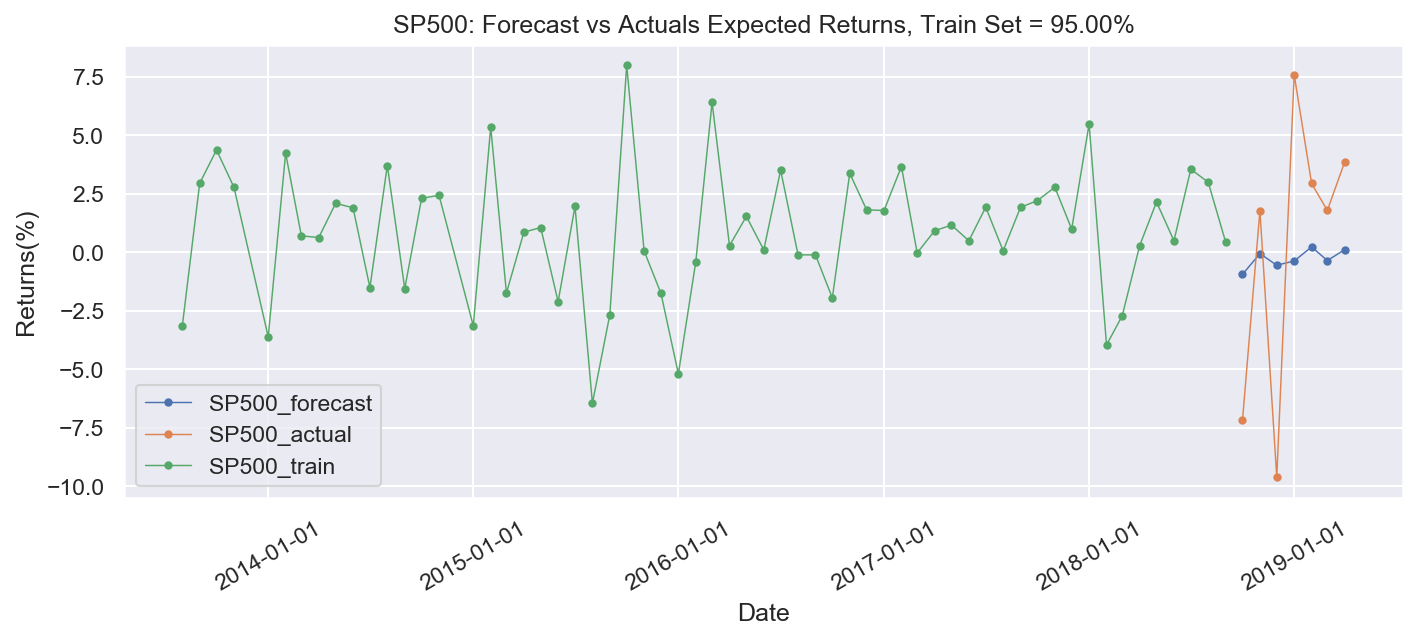

In [23]:
forecast_plot(df1_forecast,new_df1,3,95)

#### 2.1.2 Forecast the returns for R1000

In [24]:
[causation_matrix,index_remove,merge1_tested_R1000] = causation_test(merge1_differenced,0,4)
causation_matrix
index_remove
merge1_tested_R1000

                R1000  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-01   1.451094   -722.0     1.0  11300.0  1.000000e-01   
2007-09-01   4.013039 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-01   3.287222  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-01  -3.887221  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-01  -0.469530   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-01  -8.177504   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-01  -2.147421  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-01  -0.723745  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-01   5.051552  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-01   3.463409   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-01  -7.581258  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-01  -1.983120 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-01   0.919754  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-01 -12.663713   4

R1000_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
R1000_y             1.0000     0.0759    0.1270  0.0730      0.4217   
DGORDER_y           0.0016     1.0000    0.0894  0.0000      0.0000   
PERMIT_y            0.0036     0.0000    1.0000  0.0000      0.0017   
ICSA_y              0.0110     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y          0.0001     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y   0.1313     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y            0.0029     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
R1000_y                       0.0073    0.1622  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[4, 5, 6, 7, 9]

R1000     R1000G     R1000V      SP500  CSCICP03USM665S
Date                                                                   
2007-08-01   1.451094   1.343026   0.824544   1.278156         0.089706
2007-09-01   4.013039   3.400576   3.169563   3.516828        -0.469253
2007-10-01   3.287222   1.625314  -0.139933   1.471356        -1.169357
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279        -1.675790
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593        -1.953669
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391        -2.143401
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971        -2.305934
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741        -2.499122
2008-04-01   5.051552   4.838550   4.606064   4.645094        -2.846579
2008-05-01   3.463409   1.607319  -0.449713   1.061759        -3.159378
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355        -3.236472
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830        -3.014665
2008-08-01   0.919754   1.160272   1.420719   1.211680        -2.537795
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079        -2.213249
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649        -2.270743
2008-11-01  -8.524662  -8.180672  -7.839137  -7.779835        -2.242307
2008-12-01   1.585869   1.308314   1.029820   0.779114        -2.084861
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989        -1.919417
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654        -1.563785
2009-03-01   8.352894   8.179480   7.983105   8.195274        -0.906266
2009-04-01   9.069183   9.489713   9.965882   8.977221         0.051088
2009-05-01   4.631017   5.131951   5.691168   5.172056         0.801047
2009-06-01   0.955655   0.063731  -0.947814   0.019582         1.074522
2009-07-01   6.778741   7.220907   7.681294   7.152198         0.831038
2009-08-01   1.842496   3.338834   4.851332   3.300932         0.621565
2009-09-01   4.036280   3.824114   3.613123   3.510010         0.721359
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987         1.096482
2009-11-01   5.747930   5.479906   5.206403   5.577902         1.361849
2009-12-01   2.910690   2.247248   1.571612   1.761455         1.539892
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514         1.691073
...               ...        ...        ...        ...              ...
2017-02-01   3.893583   3.570075   3.251692   3.652310         0.679215
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931         0.688332
2017-04-01   2.181269   0.940558  -0.331047   0.905014         0.627653
2017-05-01   2.383220   1.033628  -0.384645   1.150972         0.437164
2017-06-01  -0.377620   0.547824   1.437704   0.480228         0.354733
2017-07-01   2.555833   1.847336   1.162697   1.916396         0.458731
2017-08-01   1.633451   0.075963  -1.459676   0.054634         0.657897
2017-09-01   1.201057   1.972947   2.740088   1.911896         0.795597
2017-10-01   3.733605   2.162013   0.580499   2.194560         0.867145
2017-11-01   2.799006   2.763013   2.727175   2.769552         0.523457
2017-12-01   0.693780   0.975856   1.263428   0.978360         0.110147
2018-01-01   6.785496   5.248504   3.659400   5.465742        -0.006872
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612         0.162074
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251         0.289593
2018-04-01   0.280503   0.232515   0.181893   0.271511         0.279573
2018-05-01   4.114378   2.291228   0.302141   2.137820         0.266922
2018-06-01   0.861540   0.507924   0.069077   0.483071         0.315223
2018-07-01   2.842282   3.283340   3.714599   3.538798         0.325261
2018-08-01   5.162683   3.175230   1.203347   2.981432         0.241242
2018-09-01   0.473600   0.238122  -0.000802   0.428511         0.202726
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935         0.038614
2018-11-01   0.863638   1.779685   2.665644   1.770178        -0.046454
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529  

In [25]:
[causation_matrix,index_remove,merge2_tested_R1000] = causation_test(merge2_differenced,0,4)
causation_matrix
index_remove
merge2_tested_R1000

               R1000    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                     
2002-10-01  8.710151  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-01  5.192548  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-01 -7.291105  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-01 -2.530097  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-01 -0.593941  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-01  1.749153  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-01  7.076132  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-01  4.777050  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-01  1.251348  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-01  2.402049  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-01  2.361945  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-01 -1.171651  0.064845  0.1370

R1000_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
R1000_y            1.0000    0.0839     0.5037    0.0000      0.0002  0.1227   
PAYEMS_y           0.0002    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y          0.4263    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y           0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y         0.0001    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y              0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y            0.0002    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y   0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y           0.0135    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
R1000_y            0.0030            0.0842    0.2488  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[4, 5, 8, 10, 11]

R1000    R1000G     R1000V     SP500    INDPRO  CMRMTSPL  \
Date                                                                      
2002-10-01  8.710151  7.831176   6.907849  8.291442  0.594417  0.110698   
2002-11-01  5.192548  5.500032   5.822577  5.550058  0.721922  0.219846   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928  0.653793  0.187226   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749  0.558220  0.185118   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984  0.520974  0.068662   
2003-03-01  1.749153  0.887685  -0.025528  0.832287  0.346765  0.126198   
2003-04-01  7.076132  7.636873   8.234498  7.792735  0.193963 -0.154515   
2003-05-01  4.777050  5.372610   5.996177  4.964567  0.074919 -0.044556   
2003-06-01  1.251348  1.166838   1.079230  1.125863 -0.118949 -0.135476   
2003-07-01  2.402049  1.831130   1.248816  1.609351 -0.090106  0.005881   
2003-08-01  2.361945  1.850221   1.320796  1.771534 -0.114520 -0.088260   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623 -0.120675 -0.088042   
2003-10-01  5.379164  5.548351   5.724132  5.350427 -0.094843  0.252618   
2003-11-01  0.945482  1.027573   1.113868  0.710323 -0.158581  0.066553   
2003-12-01  3.282110  4.513700   5.770335  4.951890 -0.080597  0.189205   
2004-01-01  1.982772  1.775387   1.564719  1.712888 -0.133349  0.041753   
2004-02-01  0.508854  1.210404   1.914144  1.213510 -0.108901  0.321630   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422 -0.044146  0.322573   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339  0.147298  0.376909   
2004-05-01  1.738915  1.270972   0.795082  1.201102  0.243577  0.271814   
2004-06-01  1.137139  1.639801   2.147690  1.782919  0.225641  0.135875   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224  0.196384 -0.001307   
2004-08-01 -0.628061  0.319647   1.204977  0.228472  0.227405  0.157227   
2004-09-01  0.879950  1.109106   1.319269  0.932034  0.148172  0.051946   
2004-10-01  1.491633  1.474818   1.458525  1.391696  0.178421 -0.008277   
2004-11-01  3.255415  4.012631   4.706808  3.786878  0.111338  0.031434   
2004-12-01  3.764679  3.394976   3.057709  3.194249  0.143311  0.142599   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575  0.202333  0.304865   
2005-02-01  0.929152  2.020492   2.990637  1.872693  0.170623  0.086176   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275  0.221187 -0.282023   
...              ...       ...        ...       ...       ...       ...   
2017-01-01  3.246062  1.889957   0.577924  1.772630  0.248374  0.160040   
2017-02-01  3.893583  3.570075   3.251692  3.652310  0.293057 -0.005355   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931  0.457961  0.009181   
2017-04-01  2.181269  0.940558  -0.331047  0.905014  0.466704  0.079652   
2017-05-01  2.383220  1.033628  -0.384645  1.150972  0.456029  0.117568   
2017-06-01 -0.377620  0.547824   1.437704  0.480228  0.368182  0.072612   
2017-07-01  2.555833  1.847336   1.162697  1.916396  0.371316  0.124306   
2017-08-01  1.633451  0.075963  -1.459676  0.054634  0.333770  0.063195   
2017-09-01  1.201057  1.972947   2.740088  1.911896  0.301960  0.150417   
2017-10-01  3.733605  2.162013   0.580499  2.194560  0.364163  0.153829   
2017-11-01  2.799006  2.763013   2.727175  2.769552  0.383336  0.194379   
2017-12-01  0.693780  0.975856   1.263428  0.978360  0.219900  0.022229   
2018-01-01  6.785496  5.248504   3.659400  5.465742  0.250332 -0.010090   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612  0.283491  0.088773   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251  0.152493  0.110122   
2018-04-01  0.280503  0.232515   0.181893  0.271511  0.086693  0.123573   
2018-05-01  4.114378  2.291228   0.302141  2.137820 -0.009296  0.047684   
2018-06-01  0.861540  0.507924   0.069077  0.483071  0.062132  0.017298   
2018-07-01  2.842282  3.283340   3.714599  3.538798  0.126916 -0.040896   
2018-08-01  5.162683  3.175230   1.203347  2.981432  0.265216 -0.029015   
2018-09-01  0.473600  0.238122  -0.00080

In [26]:
[causation_matrix,index_remove,merge3_tested_R1000] = causation_test(merge3_differenced,0,4)
causation_matrix
index_remove
merge3_tested_R1000 

               R1000  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                 
2002-12-01 -7.291105              0.5         0.595036       -0.03   
2003-01-01 -2.530097             -0.8         0.654682       -0.05   
2003-02-01 -0.593941             -0.8         0.654682       -0.04   
2003-03-01  1.749153             -0.8         0.654682       -0.04   
2003-04-01  7.076132              0.8        -0.722454        0.02   
2003-05-01  4.777050              0.8        -0.722454        0.01   
2003-06-01  1.251348              0.8        -0.722454       -0.01   
2003-07-01  2.402049              5.6         0.063697       -0.05   
2003-08-01  2.361945              5.6         0.063697       -0.03   
2003-09-01 -1.171651              5.6         0.063697       -0.06   
2003-10-01  5.379164              4.3        -0.295709       -0.07   
2003-11-01  0.945482              4.3        -0.295709       -0.07   
2003-12-01  3.282110

R1000_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
R1000_y             1.0000             0.1612             0.0122   
A191RP1Q027SBEA_y   0.0001             1.0000             0.0958   
CPALTT01USQ657N_y   0.0002             0.1267             1.0000   
MNFCTRIRSA_y        0.0000             0.0000             0.0000   
UNRATE_y            0.0004             0.0000             0.0001   
FEDFUNDS_y          0.0110             0.0015             0.0000   
ULCNFB_y            0.0080             0.0003             0.0160   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
R1000_y                  0.2166    0.0895      0.0013    0.0433  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.6843  
MNFCTRIRSA_y             1.0000    0.0004      0.0000    0.1075  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0080    0.0299      1.0000    0.0091  
ULCNFB_y                 0.0010    0.0000      0.0120    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928         0.595036   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-01  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-01  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-01  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-01  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-01  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-01  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-01  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-01  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-01  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-01  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-01  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-01  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-01  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-01 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-01  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-01  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-01  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-01  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-01  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-01 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-01  4.584695  3.307338   2.170843  2.951222        -0.094369   
...              ...       ...        ...       ...              ...   
2016-11-01  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-01  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-01  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-01  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-01  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-01  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-01 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-01  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-01  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-01  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-01  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-01  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-01  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-01  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-01  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-01  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-01  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-01  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-01  5.162683  3.175230   1.203347  2.981432        -0.069348   
2018-09-01  0.473600  0.238122  -0.000802  0.428511    

* Create Composite and Forecast

In [27]:
# Merge the three forecasts based on the index "date"
df1_merge_R1000 = pd.concat([merge1_tested_R1000,merge2_tested_R1000,merge3_tested_R1000],
                            join='inner',axis=1).T.drop_duplicates().T
df1_merge_R1000
Indicator1_R1000 = df1_merge_R1000.iloc[:,4:]
Indicator1_R1000 = Indicator1_R1000.iloc[:,:-1]
# Indicator1_R1000 = (Indicator1_R1000-Indicator1_R1000.mean())/Indicator1_R1000.std()
Indicator1_R1000
Composite1_R1000 = pd.DataFrame(Indicator1_R1000.mean(axis=1),columns={'Composite'})

new_df1_R1000 = pd.concat([df1_merge_R1000.iloc[:,:4],Composite1_R1000],join='inner',axis=1)
new_df1_R1000

R1000     R1000G     R1000V      SP500  CSCICP03USM665S  \
Date                                                                      
2007-08-01   1.451094   1.343026   0.824544   1.278156         0.089706   
2007-09-01   4.013039   3.400576   3.169563   3.516828        -0.469253   
2007-10-01   3.287222   1.625314  -0.139933   1.471356        -1.169357   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279        -1.675790   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593        -1.953669   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391        -2.143401   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971        -2.305934   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741        -2.499122   
2008-04-01   5.051552   4.838550   4.606064   4.645094        -2.846579   
2008-05-01   3.463409   1.607319  -0.449713   1.061759        -3.159378   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355        -3.236472   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830        -3.014665   
2008-08-01   0.919754   1.160272   1.420719   1.211680        -2.537795   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079        -2.213249   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649        -2.270743   
2008-12-01   1.585869   1.308314   1.029820   0.779114        -2.084861   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989        -1.919417   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654        -1.563785   
2009-03-01   8.352894   8.179480   7.983105   8.195274        -0.906266   
2009-08-01   1.842496   3.338834   4.851332   3.300932         0.621565   
2009-09-01   4.036280   3.824114   3.613123   3.510010         0.721359   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987         1.096482   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514         1.691073   
2010-02-01   3.188464   3.014783   2.839627   2.811474         1.770544   
2010-10-01   4.597967   3.707909   2.803906   3.619300        -0.122302   
2010-11-01   0.952730   0.102461  -0.775315  -0.229291         0.115650   
2010-12-01   5.256990   6.316767   7.407668   6.325652         0.190305   
2011-01-01   2.459626   2.279742   2.096084   2.239299         0.137974   
2011-02-01   3.038365   3.211681   3.387347   3.145660         0.036045   
2011-03-01   0.004941   0.112671   0.223371  -0.104785        -0.199203   
...               ...        ...        ...        ...              ...   
2016-11-01   1.934488   3.604850   5.257402   3.360347         0.285062   
2016-12-01   1.120583   1.704111   2.265861   1.803710         0.521630   
2017-01-01   3.246062   1.889957   0.577924   1.772630         0.654569   
2017-02-01   3.893583   3.570075   3.251692   3.652310         0.679215   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931         0.688332   
2017-04-01   2.181269   0.940558  -0.331047   0.905014         0.627653   
2017-05-01   2.383220   1.033628  -0.384645   1.150972         0.437164   
2017-06-01  -0.377620   0.547824   1.437704   0.480228         0.354733   
2017-07-01   2.555833   1.847336   1.162697   1.916396         0.458731   
2017-08-01   1.633451   0.075963  -1.459676   0.054634         0.657897   
2017-09-01   1.201057   1.972947   2.740088   1.911896         0.795597   
2017-10-01   3.733605   2.162013   0.580499   2.194560         0.867145   
2017-11-01   2.799006   2.763013   2.727175   2.769552         0.523457   
2017-12-01   0.693780   0.975856   1.263428   0.978360         0.110147   
2018-01-01   6.785496   5.248504   3.659400   5.465742        -0.006872   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612         0.162074   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251         0.289593   
2018-04-01   0.280503   0.232515   0.181893   0.271511         0.279573   
2018-05-01   4.114378   2.291228   0.302141   2.137820         0.266922   
2018-06-01   0.861540   0.507924   0.069077   0.483071         0.315223   
2018-07-01   2.842282   3.283340   3.7145

CSCICP03USM665S    INDPRO  CMRMTSPL     RRSFS  CPALTT01USQ657N  \
Date                                                                         
2007-08-01         0.089706 -0.001862  0.062657 -0.004471        -0.284295   
2007-09-01        -0.469253 -0.092863  0.029424 -0.105864        -0.284295   
2007-10-01        -1.169357 -0.014141  0.060505 -0.137734         1.563255   
2007-11-01        -1.675790  0.134847  0.144284 -0.033341         1.563255   
2007-12-01        -1.953669  0.014878 -0.140535 -0.271803         1.563255   
2008-01-01        -2.143401  0.089133  0.046889 -0.062329         0.117603   
2008-02-01        -2.305934 -0.105681 -0.113114 -0.177404         0.117603   
2008-03-01        -2.499122 -0.144572 -0.231161 -0.234002         0.117603   
2008-04-01        -2.846579 -0.291317 -0.197034 -0.163681         0.278016   
2008-05-01        -3.159378 -0.354892 -0.297771 -0.323320         0.278016   
2008-06-01        -3.236472 -0.347206 -0.312934 -0.230145         0.278016   
2008-07-01        -3.014665 -0.388266 -0.394545 -0.376309         0.887127   
2008-08-01        -2.537795 -0.521121 -0.617259 -0.496471         0.887127   
2008-09-01        -2.213249 -0.971898 -0.834391 -0.625215         0.887127   
2008-10-01        -2.270743 -0.827259 -0.994666 -0.903361        -3.539744   
2008-12-01        -2.084861 -1.201464 -0.956713 -0.898277        -3.539744   
2009-01-01        -1.919417 -1.400272 -1.269859 -0.799632        -1.634407   
2009-02-01        -1.563785 -1.314598 -1.008393 -0.694628        -1.634407   
2009-03-01        -0.906266 -1.390155 -0.949322 -0.785101        -1.634407   
2009-08-01         0.621565 -0.704273 -0.429532 -0.059276        -0.483983   
2009-09-01         0.721359  0.129687 -0.000561 -0.010415        -0.483983   
2009-10-01         1.096482 -0.036718  0.240547  0.564231         3.029718   
2010-01-01         1.691073  1.251191  1.169372  0.898210         0.899048   
2010-02-01         1.770544  1.360945  1.041063  0.952124         0.899048   
2010-10-01        -0.122302  1.112514  0.944107  0.672772         0.093728   
2010-11-01         0.115650  0.943371  0.612665  0.483781         0.093728   
2010-12-01         0.190305  0.725656  0.526161  0.308823         0.093728   
2011-01-01         0.137974  0.322425  0.496820  0.443855         0.863407   
2011-02-01         0.036045  0.172002  0.318479  0.381357         0.863407   
2011-03-01        -0.199203  0.011883  0.029644 -0.090035         0.863407   
...                     ...       ...       ...       ...              ...   
2016-11-01         0.285062  0.264871  0.016237  0.000807         0.672418   
2016-12-01         0.521630  0.419355  0.187238 -0.038446         0.672418   
2017-01-01         0.654569  0.248374  0.160040  0.128980         0.726103   
2017-02-01         0.679215  0.293057 -0.005355 -0.105603         0.726103   
2017-03-01         0.688332  0.457961  0.009181  0.077421         0.726103   
2017-04-01         0.627653  0.466704  0.079652  0.102212        -0.628833   
2017-05-01         0.437164  0.456029  0.117568  0.101374        -0.628833   
2017-06-01         0.354733  0.368182  0.072612 -0.001229        -0.628833   
2017-07-01         0.458731  0.371316  0.124306  0.056230         0.063934   
2017-08-01         0.657897  0.333770  0.063195  0.055870         0.063934   
2017-09-01         0.795597  0.301960  0.150417  0.122149         0.063934   
2017-10-01         0.867145  0.364163  0.153829  0.100824         0.148055   
2017-11-01         0.523457  0.383336  0.194379  0.195138         0.148055   
2017-12-01         0.110147  0.219900  0.022229  0.130467         0.148055   
2018-01-01        -0.006872  0.250332 -0.010090 -0.067534         0.095381   
2018-02-01         0.162074  0.283491  0.088773  0.069770         0.095381   
2018-03-01         0.289593  0.152493  0.110122  0.028477         0.095381   
2018-04-01         0.279573  0.086693  0.123573 -0.025004         0.489558   
2018-05-01         0.266922 -0.009

R1000     R1000G     R1000V      SP500  Composite
Date                                                             
2007-08-01   1.451094   1.343026   0.824544   1.278156  -0.061378
2007-09-01   4.013039   3.400576   3.169563   3.516828  -0.205475
2007-10-01   3.287222   1.625314  -0.139933   1.471356  -0.031245
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -0.104458
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  -0.297979
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  -0.543684
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -0.810755
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -0.940209
2008-04-01   5.051552   4.838550   4.606064   4.645094  -1.031766
2008-05-01   3.463409   1.607319  -0.449713   1.061759  -1.187891
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -1.183123
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830  -1.089443
2008-08-01   0.919754   1.160272   1.420719   1.211680  -1.050920
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079  -1.147938
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649  -2.054295
2008-12-01   1.585869   1.308314   1.029820   0.779114  -2.126843
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989  -1.802264
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -1.495969
2009-03-01   8.352894   8.179480   7.983105   8.195274  -1.349208
2009-08-01   1.842496   3.338834   4.851332   3.300932  -0.482583
2009-09-01   4.036280   3.824114   3.613123   3.510010  -0.217319
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987   0.674043
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514   0.978149
2010-02-01   3.188464   3.014783   2.839627   2.811474   0.988954
2010-10-01   4.597967   3.707909   2.803906   3.619300   0.461803
2010-11-01   0.952730   0.102461  -0.775315  -0.229291   0.386532
2010-12-01   5.256990   6.316767   7.407668   6.325652   0.317445
2011-01-01   2.459626   2.279742   2.096084   2.239299   0.387413
2011-02-01   3.038365   3.211681   3.387347   3.145660   0.300215
2011-03-01   0.004941   0.112671   0.223371  -0.104785   0.099283
...               ...        ...        ...        ...        ...
2016-11-01   1.934488   3.604850   5.257402   3.360347   0.254899
2016-12-01   1.120583   1.704111   2.265861   1.803710   0.343699
2017-01-01   3.246062   1.889957   0.577924   1.772630   0.371344
2017-02-01   3.893583   3.570075   3.251692   3.652310   0.311236
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   0.398166
2017-04-01   2.181269   0.940558  -0.331047   0.905014   0.196232
2017-05-01   2.383220   1.033628  -0.384645   1.150972   0.170550
2017-06-01  -0.377620   0.547824   1.437704   0.480228   0.137578
2017-07-01   2.555833   1.847336   1.162697   1.916396   0.305753
2017-08-01   1.633451   0.075963  -1.459676   0.054634   0.322444
2017-09-01   1.201057   1.972947   2.740088   1.911896   0.364010
2017-10-01   3.733605   2.162013   0.580499   2.194560   0.397336
2017-11-01   2.799006   2.763013   2.727175   2.769552   0.365727
2017-12-01   0.693780   0.975856   1.263428   0.978360   0.231800
2018-01-01   6.785496   5.248504   3.659400   5.465742   0.170203
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612   0.243248
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251   0.232678
2018-04-01   0.280503   0.232515   0.181893   0.271511   0.290732
2018-05-01   4.114378   2.291228   0.302141   2.137820   0.285448
2018-06-01   0.861540   0.507924   0.069077   0.483071   0.297483
2018-07-01   2.842282   3.283340   3.714599   3.538798   0.206787
2018-08-01   5.162683   3.175230   1.203347   2.981432   0.218656
2018-09-01   0.473600   0.238122  -0.000802   0.428511   0.168931
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935   0.079098
2018-11-01   0.863638   1.779685   2.665644   1.770178   0.021600
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529  -0.020957
2019-01-01   8.555235   7.920548   7.293949   7.574215   0.009052
2019-02-01   3.335416   3.112511   2.890544   2.929559  

In [28]:
# Train Set = 95%
[model1_fitted_R1000,df1_R1000,df1_train_R1000,df1_test_R1000,df1_forecast_R1000] = VAR_Model(new_df1_R1000,0,0.05)
df1_forecast_R1000
df1_test_R1000

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:05:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.395306
Nobs:                     112.000    HQIC:                 -0.770337
Log likelihood:          -234.365    FPE:                   0.359054
AIC:                     -1.02639    Det(Omega_mle):        0.288254
--------------------------------------------------------------------
Results for equation R1000
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                1.726596         0.436863            3.952           0.000
L1.R1000            -0.124109         0.098384           -1.261           0.207
L1.Composite         3.471688         2.655375            1.307 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


R1000_forecast  Composite_forecast
Date                                          
2018-10-01        0.241618            0.118206
2018-11-01        0.440945            0.054983
2018-12-01       -0.044681            0.018653
2019-01-01       -0.075158           -0.092014
2019-02-01        0.170411           -0.159124
2019-03-01        0.895172           -0.191347
2019-04-01        0.644695           -0.174042

R1000  Composite
Date                           
2018-10-01 -9.422744   0.079098
2018-11-01  0.863638   0.021600
2018-12-01 -9.086627  -0.020957
2019-01-01  8.555235   0.009052
2019-02-01  3.335416  -0.059555
2019-03-01  2.703876  -0.038823
2019-04-01  4.367489   0.054985

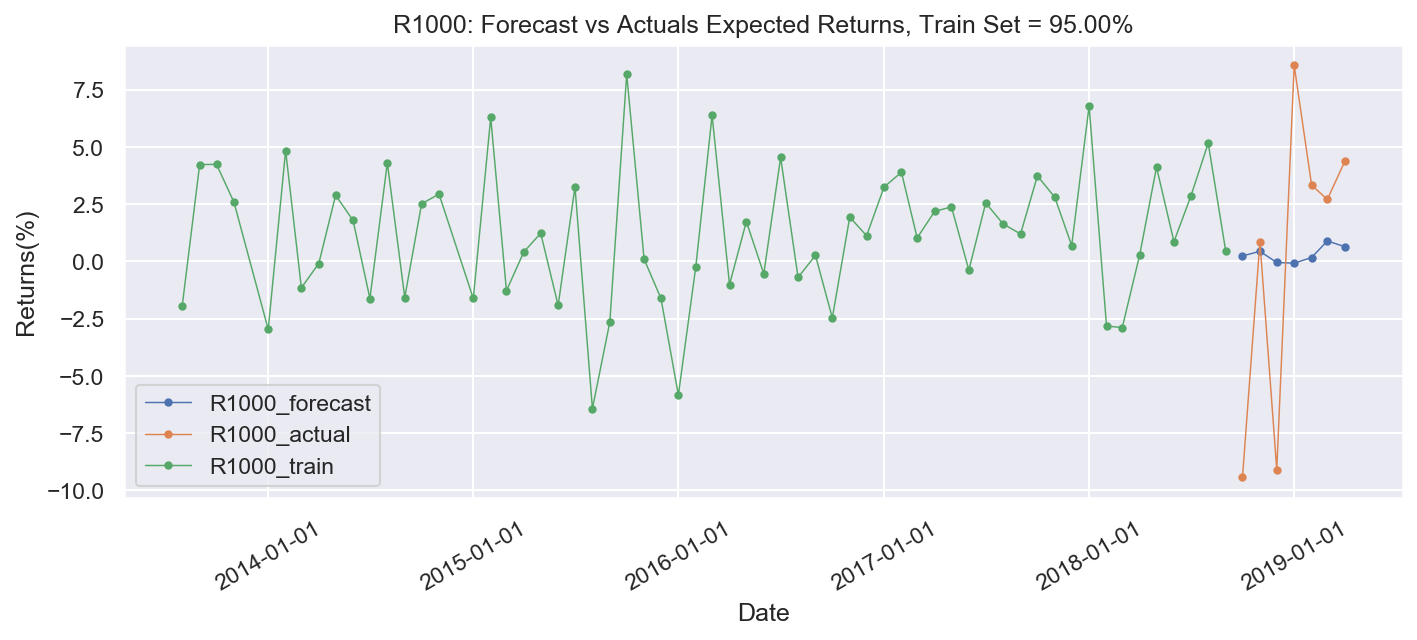

In [29]:
forecast_plot(df1_forecast_R1000,new_df1_R1000,0,95)

#### 2.1.3 Forecast the returns for R1000G

In [30]:
[causation_matrix,index_remove,merge1_tested_R1000G] = causation_test(merge1_differenced,1,4)
causation_matrix
index_remove
merge1_tested_R1000G

               R1000G  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-01   1.343026   -722.0     1.0  11300.0  1.000000e-01   
2007-09-01   3.400576 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-01   1.625314  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-01  -4.575993  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-01  -0.824280   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-01  -6.302100   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-01  -3.323734  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-01  -0.843280  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-01   4.838550  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-01   1.607319   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-01  -8.848446  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-01  -1.309697 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-01   1.160272  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-01 -10.319972   4

R1000G_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
R1000G_y             1.0000     0.0565    0.2245  0.0474      0.4091   
DGORDER_y            0.0032     1.0000    0.0894  0.0000      0.0000   
PERMIT_y             0.0064     0.0000    1.0000  0.0000      0.0017   
ICSA_y               0.0081     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y           0.0000     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y    0.0984     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y             0.0055     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
R1000G_y                      0.0031    0.1964  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[4, 5, 7, 9]

R1000     R1000G     R1000V      SP500     ICSA  \
Date                                                              
2007-08-01   1.451094   1.343026   0.824544   1.278156  11300.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828  -8550.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  15550.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -3000.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  14450.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  -2700.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971   2500.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  30000.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094 -14750.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759  23300.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355   5500.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830  16700.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  28250.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079  37600.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649  -3600.0   
2008-11-01  -8.524662  -8.180672  -7.839137  -7.779835  36800.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114  32000.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989  17450.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  64000.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274  -1400.0   
2009-04-01   9.069183   9.489713   9.965882   8.977221 -27600.0   
2009-05-01   4.631017   5.131951   5.691168   5.172056 -23050.0   
2009-06-01   0.955655   0.063731  -0.947814   0.019582 -30200.0   
2009-07-01   6.778741   7.220907   7.681294   7.152198 -46500.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932 -42300.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010 -42700.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987 -33350.0   
2009-11-01   5.747930   5.479906   5.206403   5.577902 -75950.0   
2009-12-01   2.910690   2.247248   1.571612   1.761455 -52700.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514 -13700.0   
...               ...        ...        ...        ...      ...   
2017-02-01   3.893583   3.570075   3.251692   3.652310   4650.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931  13250.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9250.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972 -11250.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  10500.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396   8750.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634  -8500.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  42950.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -37700.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  12250.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360  -5600.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742    600.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  -7250.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -6200.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511   4700.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2000.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071   -250.0   
2018-07-01   2.842282   3.283340   3.714599   3.538798  -9950.0   
2018-08-01   5.162683   3.175230   1.203347   2.981432   3950.0   
2018-09-01   0.473600   0.238122  -0.000802   0.428511 -33200.0   
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935  36450.0   
2018-11-01   0.863638   1.779685   2.665644   1.770178   4750.0   
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529   -600.0   
2019-01-01   8.555235   7.920548   7.293949   7.574215   5100.0   
2019-02-01   3.335416   3.112511   2.890544   2.929559  17750.0   
2019-03-01   2.703876   1.572581   0.430165   1.776554 -13250.0   
2019-04-01   4.367489   3.850449   3.317437   3.856034   1250.0

In [31]:
[causation_matrix,index_remove,merge2_tested_R1000G] = causation_test(merge2_differenced,1,4)
causation_matrix
index_remove
merge2_tested_R1000G

              R1000G    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                     
2002-10-01  7.831176  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-01  5.500032  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-01 -5.998594  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-01 -2.581405  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-01 -1.760957  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-01  0.887685  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-01  7.636873  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-01  5.372610  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-01  1.166838  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-01  1.831130  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-01  1.850221  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-01 -1.167637  0.064845  0.1370

R1000G_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
R1000G_y            1.0000    0.0124     0.4863    0.0001      0.0001  0.0757   
PAYEMS_y            0.0000    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y           0.3915    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y            0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y          0.0000    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y               0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y             0.0003    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y    0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y            0.0082    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
R1000G_y           0.0045            0.0407    0.1328  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[5, 8, 11]

R1000    R1000G     R1000V     SP500    PAYEMS    INDPRO  \
Date                                                                      
2002-10-01  8.710151  7.831176   6.907849  8.291442  0.004206  0.594417   
2002-11-01  5.192548  5.500032   5.822577  5.550058  0.055747  0.721922   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.653793   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749  0.099263  0.558220   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984  0.111199  0.520974   
2003-03-01  1.749153  0.887685  -0.025528  0.832287  0.097305  0.346765   
2003-04-01  7.076132  7.636873   8.234498  7.792735  0.088249  0.193963   
2003-05-01  4.777050  5.372610   5.996177  4.964567  0.084787  0.074919   
2003-06-01  1.251348  1.166838   1.079230  1.125863  0.071424 -0.118949   
2003-07-01  2.402049  1.831130   1.248816  1.609351  0.075028 -0.090106   
2003-08-01  2.361945  1.850221   1.320796  1.771534  0.063512 -0.114520   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623  0.064845 -0.120675   
2003-10-01  5.379164  5.548351   5.724132  5.350427  0.041608 -0.094843   
2003-11-01  0.945482  1.027573   1.113868  0.710323  0.024424 -0.158581   
2003-12-01  3.282110  4.513700   5.770335  4.951890  0.039912 -0.080597   
2004-01-01  1.982772  1.775387   1.564719  1.712888  0.029517 -0.133349   
2004-02-01  0.508854  1.210404   1.914144  1.213510  0.042996 -0.108901   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422  0.089058 -0.044146   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.147298   
2004-05-01  1.738915  1.270972   0.795082  1.201102  0.123371  0.243577   
2004-06-01  1.137139  1.639801   2.147690  1.782919  0.132695  0.225641   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224  0.130750  0.196384   
2004-08-01 -0.628061  0.319647   1.204977  0.228472  0.141555  0.227405   
2004-09-01  0.879950  1.109106   1.319269  0.932034  0.132088  0.148172   
2004-10-01  1.491633  1.474818   1.458525  1.391696  0.137182  0.178421   
2004-11-01  3.255415  4.012631   4.706808  3.786878  0.137768  0.111338   
2004-12-01  3.764679  3.394976   3.057709  3.194249  0.121626  0.143311   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575  0.114541  0.202333   
2005-02-01  0.929152  2.020492   2.990637  1.872693  0.114898  0.170623   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275  0.069097  0.221187   
...              ...       ...        ...       ...       ...       ...   
2017-01-01  3.246062  1.889957   0.577924  1.772630 -0.009963  0.248374   
2017-02-01  3.893583  3.570075   3.251692  3.652310 -0.014195  0.293057   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931 -0.029552  0.457961   
2017-04-01  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.466704   
2017-05-01  2.383220  1.033628  -0.384645  1.150972  0.000219  0.456029   
2017-06-01 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.368182   
2017-07-01  2.555833  1.847336   1.162697  1.916396 -0.019362  0.371316   
2017-08-01  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.333770   
2017-09-01  1.201057  1.972947   2.740088  1.911896 -0.039417  0.301960   
2017-10-01  3.733605  2.162013   0.580499  2.194560 -0.019566  0.364163   
2017-11-01  2.799006  2.763013   2.727175  2.769552 -0.012921  0.383336   
2017-12-01  0.693780  0.975856   1.263428  0.978360 -0.011428  0.219900   
2018-01-01  6.785496  5.248504   3.659400  5.465742 -0.025392  0.250332   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.283491   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.152493   
2018-04-01  0.280503  0.232515   0.181893  0.271511 -0.001193  0.086693   
2018-05-01  4.114378  2.291228   0.302141  2.137820  0.000228 -0.009296   
2018-06-01  0.861540  0.507924   0.069077  0.483071  0.005141  0.062132   
2018-07-01  2.842282  3.283340   3.714599  3.538798  0.011299  0.126916   
2018-08-01  5.162683  3.175230   1.203347  2.981432  0.013591  0.265216   
2018-09-01  0.473600  0.238122  -0.00080

In [32]:
[causation_matrix,index_remove,merge3_tested_R1000G] = causation_test(merge3_differenced,1,4)
causation_matrix
index_remove
merge3_tested_R1000G

              R1000G  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                 
2002-12-01 -5.998594              0.5         0.595036       -0.03   
2003-01-01 -2.581405             -0.8         0.654682       -0.05   
2003-02-01 -1.760957             -0.8         0.654682       -0.04   
2003-03-01  0.887685             -0.8         0.654682       -0.04   
2003-04-01  7.636873              0.8        -0.722454        0.02   
2003-05-01  5.372610              0.8        -0.722454        0.01   
2003-06-01  1.166838              0.8        -0.722454       -0.01   
2003-07-01  1.831130              5.6         0.063697       -0.05   
2003-08-01  1.850221              5.6         0.063697       -0.03   
2003-09-01 -1.167637              5.6         0.063697       -0.06   
2003-10-01  5.548351              4.3        -0.295709       -0.07   
2003-11-01  1.027573              4.3        -0.295709       -0.07   
2003-12-01  4.513700

R1000G_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
R1000G_y             1.0000             0.1393             0.0115   
A191RP1Q027SBEA_y    0.0001             1.0000             0.0958   
CPALTT01USQ657N_y    0.0003             0.1267             1.0000   
MNFCTRIRSA_y         0.0000             0.0000             0.0000   
UNRATE_y             0.0005             0.0000             0.0001   
FEDFUNDS_y           0.0177             0.0015             0.0000   
ULCNFB_y             0.0066             0.0003             0.0160   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
R1000G_y                 0.1735    0.1538      0.0002    0.0402  
A191RP1Q027SBEA_y        0.0000    0.0001      0.0000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001      0.0000    0.6843  
MNFCTRIRSA_y             1.0000    0.0004      0.0000    0.1075  
UNRATE_y                 0.0000    1.0000      0.0000    0.0000  
FEDFUNDS_y               0.0080    0.0299      1.0000    0.0091  
ULCNFB_y                 0.0010    0.0000      0.0120    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928         0.595036   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-01  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-01  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-01  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-01  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-01  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-01  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-01  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-01  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-01  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-01  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-01  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-01  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-01  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-01 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-01  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-01  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-01  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-01  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-01  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-01 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-01  4.584695  3.307338   2.170843  2.951222        -0.094369   
...              ...       ...        ...       ...              ...   
2016-11-01  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-01  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-01  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-01  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-01  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-01  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-01 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-01  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-01  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-01  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-01  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-01  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-01  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-01  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-01  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-01  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-01  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-01  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-01  5.162683  3.175230   1.203347  2.981432        -0.069348   
2018-09-01  0.473600  0.238122  -0.000802  0.428511    

* Create Composite and Forecast

In [33]:
# Merge the three forecasts based on the index "date"
df1_merge_R1000G = pd.concat([merge1_tested_R1000G,merge2_tested_R1000G,merge3_tested_R1000G],
                            join='inner',axis=1).T.drop_duplicates().T
df1_merge_R1000G
Indicator1_R1000G = df1_merge_R1000G.iloc[:,4:]
Indicator1_R1000G = (Indicator1_R1000G-Indicator1_R1000G.mean())/Indicator1_R1000G.std()
Composite1_R1000G = pd.DataFrame(Indicator1_R1000G.mean(axis=1),columns={'Composite'})

new_df1_R1000G = pd.concat([df1_merge_R1000G.iloc[:,:4],Composite1_R1000G],join='inner',axis=1)
new_df1_R1000G

R1000     R1000G     R1000V      SP500     ICSA  \
Date                                                              
2007-08-01   1.451094   1.343026   0.824544   1.278156  11300.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828  -8550.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  15550.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -3000.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  14450.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  -2700.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971   2500.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  30000.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094 -14750.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759  23300.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355   5500.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830  16700.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  28250.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079  37600.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649  -3600.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114  32000.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989  17450.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  64000.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274  -1400.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932 -42300.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010 -42700.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987 -33350.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514 -13700.0   
2010-02-01   3.188464   3.014783   2.839627   2.811474 -66050.0   
2010-10-01   4.597967   3.707909   2.803906   3.619300  15400.0   
2010-11-01   0.952730   0.102461  -0.775315  -0.229291  10850.0   
2010-12-01   5.256990   6.316767   7.407668   6.325652   2500.0   
2011-01-01   2.459626   2.279742   2.096084   2.239299  12250.0   
2011-02-01   3.038365   3.211681   3.387347   3.145660 -31250.0   
2011-03-01   0.004941   0.112671   0.223371  -0.104785  20000.0   
...               ...        ...        ...        ...      ...   
2016-11-01   1.934488   3.604850   5.257402   3.360347 -10050.0   
2016-12-01   1.120583   1.704111   2.265861   1.803710    400.0   
2017-01-01   3.246062   1.889957   0.577924   1.772630 -12800.0   
2017-02-01   3.893583   3.570075   3.251692   3.652310   4650.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931  13250.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9250.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972 -11250.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  10500.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396   8750.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634  -8500.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  42950.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -37700.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  12250.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360  -5600.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742    600.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  -7250.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -6200.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511   4700.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2000.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071   -250.0   
2018-07-01   2.842282   3.283340   3.714599   3.538798  -9950.0   
2018-08-01   5.162683   3.175230   1.203347   2.981432   3950.0   
2018-09-01   0.473600   0.238122  -0.000802   0.428511 -33200.0   
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935  36450.0   
2018-11-01   0.863638   1.779685   2.665644   1.770178   4750.0   
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529   -600.0   
2019-01-01   8.555235   7.920548   7.293949   7.574215   5100.0

R1000     R1000G     R1000V      SP500  Composite
Date                                                             
2007-08-01   1.451094   1.343026   0.824544   1.278156  -0.012091
2007-09-01   4.013039   3.400576   3.169563   3.516828  -0.249891
2007-10-01   3.287222   1.625314  -0.139933   1.471356   0.025394
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279   0.009696
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  -0.210594
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  -0.347041
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -0.516775
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -0.522182
2008-04-01   5.051552   4.838550   4.606064   4.645094  -0.816543
2008-05-01   3.463409   1.607319  -0.449713   1.061759  -0.720466
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -0.807560
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830  -0.617840
2008-08-01   0.919754   1.160272   1.420719   1.211680  -0.795371
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079  -0.992263
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649  -1.911815
2008-12-01   1.585869   1.308314   1.029820   0.779114  -2.060945
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989  -2.596936
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -1.616751
2009-03-01   8.352894   8.179480   7.983105   8.195274  -1.999134
2009-08-01   1.842496   3.338834   4.851332   3.300932  -1.230232
2009-09-01   4.036280   3.824114   3.613123   3.510010  -0.763980
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987   0.040750
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514   1.813667
2010-02-01   3.188464   3.014783   2.839627   2.811474   1.359203
2010-10-01   4.597967   3.707909   2.803906   3.619300   1.715464
2010-11-01   0.952730   0.102461  -0.775315  -0.229291   1.277224
2010-12-01   5.256990   6.316767   7.407668   6.325652   1.025120
2011-01-01   2.459626   2.279742   2.096084   2.239299   1.309830
2011-02-01   3.038365   3.211681   3.387347   3.145660   0.625326
2011-03-01   0.004941   0.112671   0.223371  -0.104785   0.438079
...               ...        ...        ...        ...        ...
2016-11-01   1.934488   3.604850   5.257402   3.360347   0.261565
2016-12-01   1.120583   1.704111   2.265861   1.803710   0.455804
2017-01-01   3.246062   1.889957   0.577924   1.772630   0.560774
2017-02-01   3.893583   3.570075   3.251692   3.652310   0.362103
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   0.518828
2017-04-01   2.181269   0.940558  -0.331047   0.905014   0.343459
2017-05-01   2.383220   1.033628  -0.384645   1.150972   0.306989
2017-06-01  -0.377620   0.547824   1.437704   0.480228   0.293612
2017-07-01   2.555833   1.847336   1.162697   1.916396   0.446525
2017-08-01   1.633451   0.075963  -1.459676   0.054634   0.361819
2017-09-01   1.201057   1.972947   2.740088   1.911896   0.675824
2017-10-01   3.733605   2.162013   0.580499   2.194560   0.343657
2017-11-01   2.799006   2.763013   2.727175   2.769552   0.584324
2017-12-01   0.693780   0.975856   1.263428   0.978360   0.283212
2018-01-01   6.785496   5.248504   3.659400   5.465742   0.157465
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612   0.263152
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251   0.255833
2018-04-01   0.280503   0.232515   0.181893   0.271511   0.221706
2018-05-01   4.114378   2.291228   0.302141   2.137820   0.324946
2018-06-01   0.861540   0.507924   0.069077   0.483071   0.344009
2018-07-01   2.842282   3.283340   3.714599   3.538798   0.233002
2018-08-01   5.162683   3.175230   1.203347   2.981432   0.298212
2018-09-01   0.473600   0.238122  -0.000802   0.428511  -0.004469
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935   0.132981
2018-11-01   0.863638   1.779685   2.665644   1.770178  -0.073767
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529  -0.133600
2019-01-01   8.555235   7.920548   7.293949   7.574215   0.141433
2019-02-01   3.335416   3.112511   2.890544   2.929559  

In [34]:
# Train Set = 95%
[model1_fitted_R1000G,df1_R1000G,df1_train_R1000G,df1_test_R1000G,df1_forecast_R1000G]=VAR_Model(new_df1_R1000G,1,0.05)
df1_forecast_R1000G
df1_test_R1000G

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:09:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.857475
Nobs:                     112.000    HQIC:                  0.482444
Log likelihood:          -304.520    FPE:                    1.25671
AIC:                     0.226395    Det(Omega_mle):         1.00891
--------------------------------------------------------------------
Results for equation R1000G
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.673900         0.385485            1.748           0.080
L1.R1000G           -0.021814         0.098476           -0.222           0.825
L1.Composite         4.185193         1.477056            2.833

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


R1000G_forecast  Composite_forecast
Date                                           
2018-10-01        -0.542662            0.137652
2018-11-01         0.249378           -0.011110
2018-12-01        -0.233570           -0.001605
2019-01-01        -0.433515           -0.089892
2019-02-01         0.132569           -0.211584
2019-03-01        -0.039065           -0.166414
2019-04-01         0.211284           -0.217747

R1000G  Composite
Date                           
2018-10-01 -7.448538   0.132981
2018-11-01  1.779685  -0.073767
2018-12-01 -9.719585  -0.133600
2019-01-01  7.920548   0.141433
2019-02-01  3.112511  -0.012281
2019-03-01  1.572581  -0.133772
2019-04-01  3.850449   0.083806

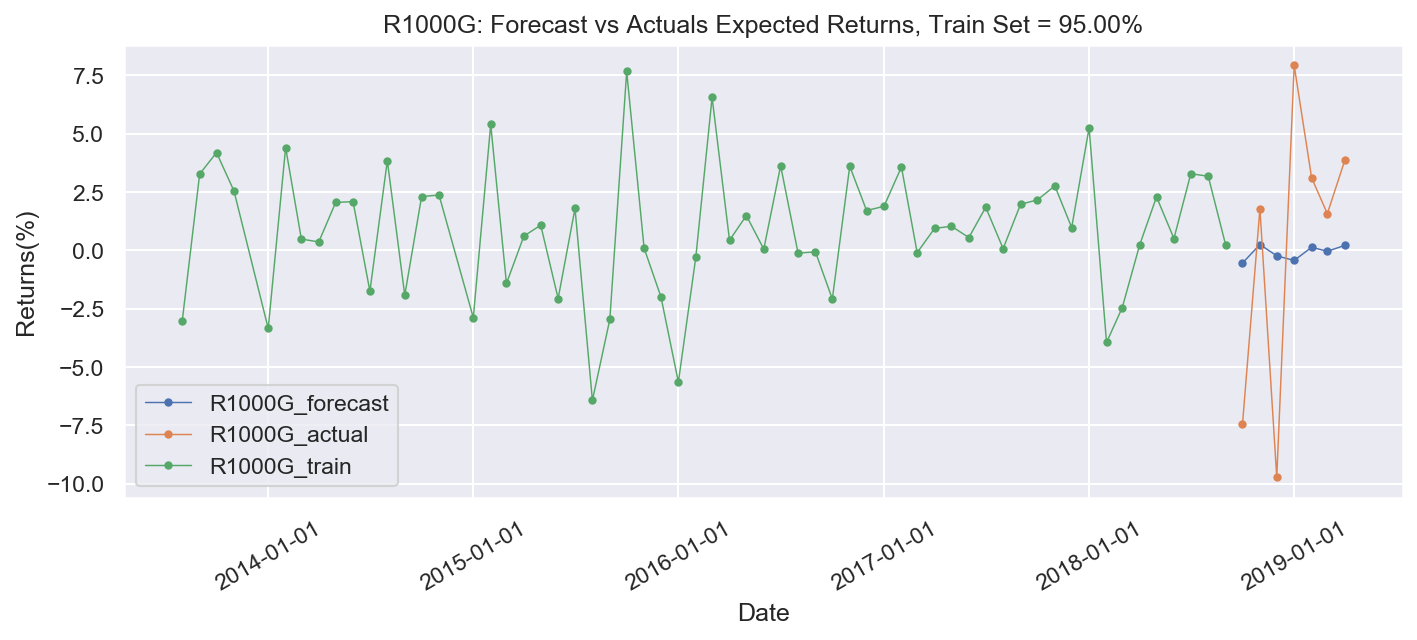

In [35]:
forecast_plot(df1_forecast_R1000G,new_df1_R1000G,1,95)

#### 2.1.4 Forecast the returns for R1000V

In [36]:
[causation_matrix,index_remove,merge1_tested_R1000V] = causation_test(merge1_differenced,2,4)
causation_matrix
index_remove
merge1_tested_R1000V

               R1000V  DGORDER  PERMIT     ICSA      AWHAEMAN  \
Date                                                            
2007-08-01   0.824544   -722.0     1.0  11300.0  1.000000e-01   
2007-09-01   3.169563 -33032.0     7.0  -8550.0  0.000000e+00   
2007-10-01  -0.139933  21007.0    16.0  15550.0 -3.000000e-01   
2007-11-01  -5.321445  -5756.0    67.0  -3000.0  3.000000e-01   
2007-12-01  -1.214891   6528.0  -178.0  14450.0  0.000000e+00   
2008-01-01  -4.271911   5531.0   -43.0  -2700.0 -2.000000e-01   
2008-02-01  -4.587407  -7137.0   -52.0   2500.0  2.000000e-01   
2008-03-01  -0.972388  -9163.0   -45.0  30000.0  0.000000e+00   
2008-04-01   4.606064  -3303.0   167.0 -14750.0 -3.000000e-01   
2008-05-01  -0.449713   3094.0   -36.0  23300.0  1.000000e-01   
2008-06-01 -10.320302  -2748.0   271.0   5500.0 -1.000000e-01   
2008-07-01  -0.583980 -13147.0  -213.0  16700.0 -1.000000e-01   
2008-08-01   1.420719  -4725.0   -23.0  28250.0  0.000000e+00   
2008-09-01  -7.893354   4

R1000V_x  DGORDER_x  PERMIT_x  ICSA_x  AWHAEMAN_x  \
R1000V_y             1.0000     0.0479    0.2482  0.0377      0.2904   
DGORDER_y            0.0097     1.0000    0.0894  0.0000      0.0000   
PERMIT_y             0.0092     0.0000    1.0000  0.0000      0.0017   
ICSA_y               0.0094     0.0535    0.0216  1.0000      0.1471   
AWHAEMAN_y           0.0000     0.0000    0.0001  0.0000      1.0000   
CSCICP03USM665S_y    0.0719     0.1197    0.0075  0.2277      0.0574   
T10Y3M_y             0.0149     0.0001    0.0000  0.1609      0.0978   

                   CSCICP03USM665S_x  T10Y3M_x  
R1000V_y                      0.0019    0.1971  
DGORDER_y                     0.0037    0.5878  
PERMIT_y                      0.0049    0.0001  
ICSA_y                        0.0001    0.0050  
AWHAEMAN_y                    0.0100    0.0003  
CSCICP03USM665S_y             1.0000    0.0000  
T10Y3M_y                      0.0445    1.0000

[5, 7, 9]

R1000     R1000G     R1000V      SP500  DGORDER     ICSA  \
Date                                                                       
2007-08-01   1.451094   1.343026   0.824544   1.278156   -722.0  11300.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828 -33032.0  -8550.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  21007.0  15550.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0  -3000.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  14450.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391   5531.0  -2700.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   2500.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0  30000.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094  -3303.0 -14750.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759   3094.0  23300.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   5500.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  16700.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  -4725.0  28250.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079   4154.0  37600.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0  -3600.0   
2008-11-01  -8.524662  -8.180672  -7.839137  -7.779835 -12002.0  36800.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114 -21062.0  32000.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0  17450.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0  64000.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274   1051.0  -1400.0   
2009-04-01   9.069183   9.489713   9.965882   8.977221   2325.0 -27600.0   
2009-05-01   4.631017   5.131951   5.691168   5.172056   4451.0 -23050.0   
2009-06-01   0.955655   0.063731  -0.947814   0.019582  -1258.0 -30200.0   
2009-07-01   6.778741   7.220907   7.681294   7.152198  16259.0 -46500.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932   7521.0 -42300.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010   3443.0 -42700.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987  25614.0 -33350.0   
2009-11-01   5.747930   5.479906   5.206403   5.577902   6264.0 -75950.0   
2009-12-01   2.910690   2.247248   1.571612   1.761455   9834.0 -52700.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514  39990.0 -13700.0   
...               ...        ...        ...        ...      ...      ...   
2017-02-01   3.893583   3.570075   3.251692   3.652310   7490.0   4650.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   7186.0  13250.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9038.0  -9250.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972   4061.0 -11250.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  28489.0  10500.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396 -26588.0   8750.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634   1001.0  -8500.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  13830.0  42950.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -18529.0 -37700.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  14849.0  12250.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360   2245.0  -5600.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742  -8328.0    600.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  12988.0  -7250.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0  -6200.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511  -3020.0   4700.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2765.0   2000.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071 -16954.0   -250.0   
2018-07-01   2.842282   3.283340   3.714599   3.538798  16676.0  -9950.0   
2018-08-01   5.162683   3.175230   1.203347   2.981432   5556.0   3950.0   
2018-09-01   0.473600   0.238122  -0.000802   0.428511  -9079.0 

In [37]:
[causation_matrix,index_remove,merge2_tested_R1000V] = causation_test(merge2_differenced,2,4)
causation_matrix
index_remove
merge2_tested_R1000V 

               R1000V    PAYEMS   DSPIC96    INDPRO  CMRMTSPL       PCE  \
Date                                                                      
2002-10-01   6.907849  0.004206  0.147638  0.594417  0.110698 -0.125535   
2002-11-01   5.822577  0.055747  0.131342  0.721922  0.219846  0.017991   
2002-12-01  -4.650805  0.076576  0.139069  0.653793  0.187226  0.176248   
2003-01-01  -2.636353  0.099263 -0.139311  0.558220  0.185118  0.174294   
2003-02-01  -2.971919  0.111199 -0.159950  0.520974  0.068662  0.097911   
2003-03-01  -0.025528  0.097305 -0.113320  0.346765  0.126198  0.113742   
2003-04-01   8.234498  0.088249 -0.151563  0.193963 -0.154515 -0.001987   
2003-05-01   5.996177  0.084787 -0.163442  0.074919 -0.044556  0.112097   
2003-06-01   1.079230  0.071424 -0.175391 -0.118949 -0.135476  0.102105   
2003-07-01   1.248816  0.075028  0.099308 -0.090106  0.005881  0.039042   
2003-08-01   1.320796  0.063512  0.305734 -0.114520 -0.088260  0.137660   
2003-09-01  -1.163576  0.

R1000V_x  PAYEMS_x  DSPIC96_x  INDPRO_x  CMRMTSPL_x   PCE_x  \
R1000V_y            1.0000    0.0039     0.4992    0.0001      0.0002  0.0563   
PAYEMS_y            0.0000    1.0000     0.4328    0.0000      0.0000  0.0000   
DSPIC96_y           0.3775    0.0660     1.0000    0.1283      0.0030  0.0002   
INDPRO_y            0.0000    0.0000     0.6947    1.0000      0.0016  0.0183   
CMRMTSPL_y          0.0000    0.0018     0.0216    0.0012      1.0000  0.0106   
PCE_y               0.0000    0.1343     0.0008    0.0001      0.0000  1.0000   
RRSFS_y             0.0010    0.0737     0.0000    0.0000      0.0003  0.0749   
S423SMM144SCEN_y    0.0000    0.0233     0.5054    0.0000      0.0007  0.0002   
PPIACO_y            0.0085    0.2581     0.0292    0.0000      0.0000  0.0020   

                  RRSFS_x  S423SMM144SCEN_x  PPIACO_x  
R1000V_y           0.0111            0.0254    0.0535  
PAYEMS_y           0.0000            0.0000    0.0000  
DSPIC96_y          0.0000            0.0400    0.0159  
INDPRO_y           0.0016            0.0002    0.0000  
CMRMTSPL_y         0.0018            0.0004    0.0000  
PCE_y              0.0011            0.0057    0.0000  
RRSFS_y            1.0000            0.0010    0.0000  
S423SMM144SCEN_y   0.0000            1.0000    0.0000  
PPIACO_y           0.0001            0.0563    1.0000

[5, 8, 11]

R1000    R1000G     R1000V     SP500    PAYEMS    INDPRO  \
Date                                                                      
2002-10-01  8.710151  7.831176   6.907849  8.291442  0.004206  0.594417   
2002-11-01  5.192548  5.500032   5.822577  5.550058  0.055747  0.721922   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928  0.076576  0.653793   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749  0.099263  0.558220   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984  0.111199  0.520974   
2003-03-01  1.749153  0.887685  -0.025528  0.832287  0.097305  0.346765   
2003-04-01  7.076132  7.636873   8.234498  7.792735  0.088249  0.193963   
2003-05-01  4.777050  5.372610   5.996177  4.964567  0.084787  0.074919   
2003-06-01  1.251348  1.166838   1.079230  1.125863  0.071424 -0.118949   
2003-07-01  2.402049  1.831130   1.248816  1.609351  0.075028 -0.090106   
2003-08-01  2.361945  1.850221   1.320796  1.771534  0.063512 -0.114520   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623  0.064845 -0.120675   
2003-10-01  5.379164  5.548351   5.724132  5.350427  0.041608 -0.094843   
2003-11-01  0.945482  1.027573   1.113868  0.710323  0.024424 -0.158581   
2003-12-01  3.282110  4.513700   5.770335  4.951890  0.039912 -0.080597   
2004-01-01  1.982772  1.775387   1.564719  1.712888  0.029517 -0.133349   
2004-02-01  0.508854  1.210404   1.914144  1.213510  0.042996 -0.108901   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422  0.089058 -0.044146   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339  0.106729  0.147298   
2004-05-01  1.738915  1.270972   0.795082  1.201102  0.123371  0.243577   
2004-06-01  1.137139  1.639801   2.147690  1.782919  0.132695  0.225641   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224  0.130750  0.196384   
2004-08-01 -0.628061  0.319647   1.204977  0.228472  0.141555  0.227405   
2004-09-01  0.879950  1.109106   1.319269  0.932034  0.132088  0.148172   
2004-10-01  1.491633  1.474818   1.458525  1.391696  0.137182  0.178421   
2004-11-01  3.255415  4.012631   4.706808  3.786878  0.137768  0.111338   
2004-12-01  3.764679  3.394976   3.057709  3.194249  0.121626  0.143311   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575  0.114541  0.202333   
2005-02-01  0.929152  2.020492   2.990637  1.872693  0.114898  0.170623   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275  0.069097  0.221187   
...              ...       ...        ...       ...       ...       ...   
2017-01-01  3.246062  1.889957   0.577924  1.772630 -0.009963  0.248374   
2017-02-01  3.893583  3.570075   3.251692  3.652310 -0.014195  0.293057   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931 -0.029552  0.457961   
2017-04-01  2.181269  0.940558  -0.331047  0.905014 -0.024138  0.466704   
2017-05-01  2.383220  1.033628  -0.384645  1.150972  0.000219  0.456029   
2017-06-01 -0.377620  0.547824   1.437704  0.480228 -0.009373  0.368182   
2017-07-01  2.555833  1.847336   1.162697  1.916396 -0.019362  0.371316   
2017-08-01  1.633451  0.075963  -1.459676  0.054634 -0.017154  0.333770   
2017-09-01  1.201057  1.972947   2.740088  1.911896 -0.039417  0.301960   
2017-10-01  3.733605  2.162013   0.580499  2.194560 -0.019566  0.364163   
2017-11-01  2.799006  2.763013   2.727175  2.769552 -0.012921  0.383336   
2017-12-01  0.693780  0.975856   1.263428  0.978360 -0.011428  0.219900   
2018-01-01  6.785496  5.248504   3.659400  5.465742 -0.025392  0.250332   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612 -0.009436  0.283491   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251 -0.000126  0.152493   
2018-04-01  0.280503  0.232515   0.181893  0.271511 -0.001193  0.086693   
2018-05-01  4.114378  2.291228   0.302141  2.137820  0.000228 -0.009296   
2018-06-01  0.861540  0.507924   0.069077  0.483071  0.005141  0.062132   
2018-07-01  2.842282  3.283340   3.714599  3.538798  0.011299  0.126916   
2018-08-01  5.162683  3.175230   1.203347  2.981432  0.013591  0.265216   
2018-09-01  0.473600  0.238122  -0.00080

In [38]:
[causation_matrix,index_remove,merge3_tested_R1000V] = causation_test(merge3_differenced,2,4)
causation_matrix
index_remove
merge3_tested_R1000V

               R1000V  A191RP1Q027SBEA  CPALTT01USQ657N  MNFCTRIRSA  \
Date                                                                  
2002-12-01  -4.650805              0.5         0.595036       -0.03   
2003-01-01  -2.636353             -0.8         0.654682       -0.05   
2003-02-01  -2.971919             -0.8         0.654682       -0.04   
2003-03-01  -0.025528             -0.8         0.654682       -0.04   
2003-04-01   8.234498              0.8        -0.722454        0.02   
2003-05-01   5.996177              0.8        -0.722454        0.01   
2003-06-01   1.079230              0.8        -0.722454       -0.01   
2003-07-01   1.248816              5.6         0.063697       -0.05   
2003-08-01   1.320796              5.6         0.063697       -0.03   
2003-09-01  -1.163576              5.6         0.063697       -0.06   
2003-10-01   5.724132              4.3        -0.295709       -0.07   
2003-11-01   1.113868              4.3        -0.295709       -0.07   
2003-1

R1000V_x  A191RP1Q027SBEA_x  CPALTT01USQ657N_x  \
R1000V_y             1.0000             0.1211             0.0074   
A191RP1Q027SBEA_y    0.0001             1.0000             0.0958   
CPALTT01USQ657N_y    0.0014             0.1267             1.0000   
MNFCTRIRSA_y         0.0000             0.0000             0.0000   
UNRATE_y             0.0014             0.0000             0.0001   
FEDFUNDS_y           0.0136             0.0015             0.0000   
ULCNFB_y             0.0097             0.0003             0.0160   

                   MNFCTRIRSA_x  UNRATE_x  FEDFUNDS_x  ULCNFB_x  
R1000V_y                 0.0864    0.1341       0.000    0.0335  
A191RP1Q027SBEA_y        0.0000    0.0001       0.000    0.0000  
CPALTT01USQ657N_y        0.0000    0.0001       0.000    0.6843  
MNFCTRIRSA_y             1.0000    0.0004       0.000    0.1075  
UNRATE_y                 0.0000    1.0000       0.000    0.0000  
FEDFUNDS_y               0.0080    0.0299       1.000    0.0091  
ULCNFB_y                 0.0010    0.0000       0.012    1.0000

[4, 6, 7]

R1000    R1000G     R1000V     SP500  CPALTT01USQ657N  \
Date                                                                   
2002-12-01 -7.291105 -5.998594  -4.650805 -6.222928         0.595036   
2003-01-01 -2.530097 -2.581405  -2.636353 -2.779749         0.654682   
2003-02-01 -0.593941 -1.760957  -2.971919 -1.714984         0.654682   
2003-03-01  1.749153  0.887685  -0.025528  0.832287         0.654682   
2003-04-01  7.076132  7.636873   8.234498  7.792735        -0.722454   
2003-05-01  4.777050  5.372610   5.996177  4.964567        -0.722454   
2003-06-01  1.251348  1.166838   1.079230  1.125863        -0.722454   
2003-07-01  2.402049  1.831130   1.248816  1.609351         0.063697   
2003-08-01  2.361945  1.850221   1.320796  1.771534         0.063697   
2003-09-01 -1.171651 -1.167637  -1.163576 -1.201623         0.063697   
2003-10-01  5.379164  5.548351   5.724132  5.350427        -0.295709   
2003-11-01  0.945482  1.027573   1.113868  0.710323        -0.295709   
2003-12-01  3.282110  4.513700   5.770335  4.951890        -0.295709   
2004-01-01  1.982772  1.775387   1.564719  1.712888        -0.109107   
2004-02-01  0.508854  1.210404   1.914144  1.213510        -0.109107   
2004-03-01 -1.949273 -1.506607  -1.065646 -1.649422        -0.109107   
2004-04-01 -1.214257 -1.939404  -2.657600 -1.693339         1.067341   
2004-05-01  1.738915  1.270972   0.795082  1.201102         1.067341   
2004-06-01  1.137139  1.639801   2.147690  1.782919         1.067341   
2004-07-01 -5.872672 -3.694466  -1.603431 -3.489224        -0.137160   
2004-08-01 -0.628061  0.319647   1.204977  0.228472        -0.137160   
2004-09-01  0.879950  1.109106   1.319269  0.932034        -0.137160   
2004-10-01  1.491633  1.474818   1.458525  1.391696         0.579689   
2004-11-01  3.255415  4.012631   4.706808  3.786878         0.579689   
2004-12-01  3.764679  3.394976   3.057709  3.194249         0.579689   
2005-01-01 -3.443213 -2.646110  -1.924526 -2.561575        -0.273702   
2005-02-01  0.929152  2.020492   2.990637  1.872693        -0.273702   
2005-03-01 -1.928443 -1.738551  -1.571321 -1.930275        -0.273702   
2005-04-01 -1.970686 -1.979256  -1.985863 -2.031352        -0.094369   
2005-05-01  4.584695  3.307338   2.170843  2.951222        -0.094369   
...              ...       ...        ...       ...              ...   
2016-11-01  1.934488  3.604850   5.257402  3.360347         0.672418   
2016-12-01  1.120583  1.704111   2.265861  1.803710         0.672418   
2017-01-01  3.246062  1.889957   0.577924  1.772630         0.726103   
2017-02-01  3.893583  3.570075   3.251692  3.652310         0.726103   
2017-03-01  1.026074 -0.097658  -1.221718 -0.038931         0.726103   
2017-04-01  2.181269  0.940558  -0.331047  0.905014        -0.628833   
2017-05-01  2.383220  1.033628  -0.384645  1.150972        -0.628833   
2017-06-01 -0.377620  0.547824   1.437704  0.480228        -0.628833   
2017-07-01  2.555833  1.847336   1.162697  1.916396         0.063934   
2017-08-01  1.633451  0.075963  -1.459676  0.054634         0.063934   
2017-09-01  1.201057  1.972947   2.740088  1.911896         0.063934   
2017-10-01  3.733605  2.162013   0.580499  2.194560         0.148055   
2017-11-01  2.799006  2.763013   2.727175  2.769552         0.148055   
2017-12-01  0.693780  0.975856   1.263428  0.978360         0.148055   
2018-01-01  6.785496  5.248504   3.659400  5.465742         0.095381   
2018-02-01 -2.815429 -3.946459  -5.149210 -3.972612         0.095381   
2018-03-01 -2.890414 -2.451827  -1.980362 -2.725251         0.095381   
2018-04-01  0.280503  0.232515   0.181893  0.271511         0.489558   
2018-05-01  4.114378  2.291228   0.302141  2.137820         0.489558   
2018-06-01  0.861540  0.507924   0.069077  0.483071         0.489558   
2018-07-01  2.842282  3.283340   3.714599  3.538798        -0.069348   
2018-08-01  5.162683  3.175230   1.203347  2.981432        -0.069348   
2018-09-01  0.473600  0.238122  -0.000802  0.428511    

* Create Composite and Forecast

In [39]:
# Merge the three forecasts based on the index "date"
df1_merge_R1000V = pd.concat([merge1_tested_R1000V,merge2_tested_R1000V,merge3_tested_R1000V],
                            join='inner',axis=1).T.drop_duplicates().T
df1_merge_R1000V
Indicator1_R1000V = df1_merge_R1000V.iloc[:,4:]
Indicator1_R1000V = (Indicator1_R1000V-Indicator1_R1000V.mean())/Indicator1_R1000V.std()
Composite1_R1000V = pd.DataFrame(Indicator1_R1000V.mean(axis=1),columns={'Composite'})

new_df1_R1000V = pd.concat([df1_merge_R1000V.iloc[:,:4],Composite1_R1000V],join='inner',axis=1)
new_df1_R1000V

R1000     R1000G     R1000V      SP500  DGORDER     ICSA  \
Date                                                                       
2007-08-01   1.451094   1.343026   0.824544   1.278156   -722.0  11300.0   
2007-09-01   4.013039   3.400576   3.169563   3.516828 -33032.0  -8550.0   
2007-10-01   3.287222   1.625314  -0.139933   1.471356  21007.0  15550.0   
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -5756.0  -3000.0   
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593   6528.0  14450.0   
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391   5531.0  -2700.0   
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -7137.0   2500.0   
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -9163.0  30000.0   
2008-04-01   5.051552   4.838550   4.606064   4.645094  -3303.0 -14750.0   
2008-05-01   3.463409   1.607319  -0.449713   1.061759   3094.0  23300.0   
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -2748.0   5500.0   
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830 -13147.0  16700.0   
2008-08-01   0.919754   1.160272   1.420719   1.211680  -4725.0  28250.0   
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079   4154.0  37600.0   
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649 -22262.0  -3600.0   
2008-12-01   1.585869   1.308314   1.029820   0.779114 -21062.0  32000.0   
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989 -14990.0  17450.0   
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -3772.0  64000.0   
2009-03-01   8.352894   8.179480   7.983105   8.195274   1051.0  -1400.0   
2009-08-01   1.842496   3.338834   4.851332   3.300932   7521.0 -42300.0   
2009-09-01   4.036280   3.824114   3.613123   3.510010   3443.0 -42700.0   
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987  25614.0 -33350.0   
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514  39990.0 -13700.0   
2010-02-01   3.188464   3.014783   2.839627   2.811474   4259.0 -66050.0   
2010-10-01   4.597967   3.707909   2.803906   3.619300 -12300.0  15400.0   
2010-11-01   0.952730   0.102461  -0.775315  -0.229291   5247.0  10850.0   
2010-12-01   5.256990   6.316767   7.407668   6.325652  -1393.0   2500.0   
2011-01-01   2.459626   2.279742   2.096084   2.239299 -13302.0  12250.0   
2011-02-01   3.038365   3.211681   3.387347   3.145660  -3460.0 -31250.0   
2011-03-01   0.004941   0.112671   0.223371  -0.104785  13031.0  20000.0   
...               ...        ...        ...        ...      ...      ...   
2016-11-01   1.934488   3.604850   5.257402   3.360347  -9635.0 -10050.0   
2016-12-01   1.120583   1.704111   2.265861   1.803710   7545.0    400.0   
2017-01-01   3.246062   1.889957   0.577924   1.772630  -6391.0 -12800.0   
2017-02-01   3.893583   3.570075   3.251692   3.652310   7490.0   4650.0   
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   7186.0  13250.0   
2017-04-01   2.181269   0.940558  -0.331047   0.905014  -9038.0  -9250.0   
2017-05-01   2.383220   1.033628  -0.384645   1.150972   4061.0 -11250.0   
2017-06-01  -0.377620   0.547824   1.437704   0.480228  28489.0  10500.0   
2017-07-01   2.555833   1.847336   1.162697   1.916396 -26588.0   8750.0   
2017-08-01   1.633451   0.075963  -1.459676   0.054634   1001.0  -8500.0   
2017-09-01   1.201057   1.972947   2.740088   1.911896  13830.0  42950.0   
2017-10-01   3.733605   2.162013   0.580499   2.194560 -18529.0 -37700.0   
2017-11-01   2.799006   2.763013   2.727175   2.769552  14849.0  12250.0   
2017-12-01   0.693780   0.975856   1.263428   0.978360   2245.0  -5600.0   
2018-01-01   6.785496   5.248504   3.659400   5.465742  -8328.0    600.0   
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612  12988.0  -7250.0   
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251  -2864.0  -6200.0   
2018-04-01   0.280503   0.232515   0.181893   0.271511  -3020.0   4700.0   
2018-05-01   4.114378   2.291228   0.302141   2.137820   2765.0   2000.0   
2018-06-01   0.861540   0.507924   0.069077   0.483071 -16954.0 

R1000     R1000G     R1000V      SP500  Composite
Date                                                             
2007-08-01   1.451094   1.343026   0.824544   1.278156  -0.012690
2007-09-01   4.013039   3.400576   3.169563   3.516828  -0.405890
2007-10-01   3.287222   1.625314  -0.139933   1.471356   0.140436
2007-11-01  -3.887221  -4.575993  -5.321445  -4.504279  -0.020463
2007-12-01  -0.469530  -0.824280  -1.214891  -0.866593  -0.153426
2008-01-01  -8.177504  -6.302100  -4.271911  -6.311391  -0.282931
2008-02-01  -2.147421  -3.323734  -4.587407  -3.537971  -0.506640
2008-03-01  -0.723745  -0.843280  -0.972388  -0.597741  -0.522655
2008-04-01   5.051552   4.838550   4.606064   4.645094  -0.758150
2008-05-01   3.463409   1.607319  -0.449713   1.061759  -0.635760
2008-06-01  -7.581258  -8.848446 -10.320302  -8.988355  -0.746943
2008-07-01  -1.983120  -1.309697  -0.583980  -0.990830  -0.631445
2008-08-01   0.919754   1.160272   1.420719   1.211680  -0.746694
2008-09-01 -12.663713 -10.319972  -7.893354  -9.518079  -0.877041
2008-10-01 -19.213874 -19.240826 -19.266675 -18.563649  -1.857724
2008-12-01   1.585869   1.308314   1.029820   0.779114  -1.986722
2009-01-01  -4.990750  -8.656976 -12.439555  -8.954989  -2.440720
2009-02-01  -8.058801 -11.278515 -14.847023 -11.645654  -1.488181
2009-03-01   8.352894   8.179480   7.983105   8.195274  -1.809379
2009-08-01   1.842496   3.338834   4.851332   3.300932  -1.074929
2009-09-01   4.036280   3.824114   3.613123   3.510010  -0.673406
2009-10-01  -1.439247  -2.349930  -3.259107  -1.995987   0.179636
2010-01-01  -4.520717  -3.762659  -2.989845  -3.767514   1.870142
2010-02-01   3.188464   3.014783   2.839627   2.811474   1.261231
2010-10-01   4.597967   3.707909   2.803906   3.619300   1.494382
2010-11-01   0.952730   0.102461  -0.775315  -0.229291   1.192118
2010-12-01   5.256990   6.316767   7.407668   6.325652   0.926553
2011-01-01   2.459626   2.279742   2.096084   2.239299   1.120133
2011-02-01   3.038365   3.211681   3.387347   3.145660   0.551780
2011-03-01   0.004941   0.112671   0.223371  -0.104785   0.471905
...               ...        ...        ...        ...        ...
2016-11-01   1.934488   3.604850   5.257402   3.360347   0.187256
2016-12-01   1.120583   1.704111   2.265861   1.803710   0.457962
2017-01-01   3.246062   1.889957   0.577924   1.772630   0.477038
2017-02-01   3.893583   3.570075   3.251692   3.652310   0.372478
2017-03-01   1.026074  -0.097658  -1.221718  -0.038931   0.513290
2017-04-01   2.181269   0.940558  -0.331047   0.905014   0.264977
2017-05-01   2.383220   1.033628  -0.384645   1.150972   0.303588
2017-06-01  -0.377620   0.547824   1.437704   0.480228   0.425263
2017-07-01   2.555833   1.847336   1.162697   1.916396   0.262520
2017-08-01   1.633451   0.075963  -1.459676   0.054634   0.336669
2017-09-01   1.201057   1.972947   2.740088   1.911896   0.692415
2017-10-01   3.733605   2.162013   0.580499   2.194560   0.213157
2017-11-01   2.799006   2.763013   2.727175   2.769552   0.614815
2017-12-01   0.693780   0.975856   1.263428   0.978360   0.272023
2018-01-01   6.785496   5.248504   3.659400   5.465742   0.099781
2018-02-01  -2.815429  -3.946459  -5.149210  -3.972612   0.312646
2018-03-01  -2.890414  -2.451827  -1.980362  -2.725251   0.219142
2018-04-01   0.280503   0.232515   0.181893   0.271511   0.187263
2018-05-01   4.114378   2.291228   0.302141   2.137820   0.312812
2018-06-01   0.861540   0.507924   0.069077   0.483071   0.222106
2018-07-01   2.842282   3.283340   3.714599   3.538798   0.305442
2018-08-01   5.162683   3.175230   1.203347   2.981432   0.303800
2018-09-01   0.473600   0.238122  -0.000802   0.428511  -0.051547
2018-10-01  -9.422744  -7.448538  -5.479570  -7.192935   0.097449
2018-11-01   0.863638   1.779685   2.665644   1.770178  -0.074342
2018-12-01  -9.086627  -9.719585 -10.337158  -9.626529  -0.140613
2019-01-01   8.555235   7.920548   7.293949   7.574215   0.189566
2019-02-01   3.335416   3.112511   2.890544   2.929559  

In [40]:
# Train Set = 95%
[model1_fitted_R1000V,df1_R1000V,df1_train_R1000V,df1_test_R1000V,df1_forecast_R1000V] = VAR_Model(new_df1_R1000V,2,0.05)
df1_forecast_R1000V
df1_test_R1000V

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:11:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.729246
Nobs:                     115.000    HQIC:                  0.530717
Log likelihood:          -335.073    FPE:                    1.48495
AIC:                     0.395080    Det(Omega_mle):         1.31944
--------------------------------------------------------------------
Results for equation R1000V
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.089965         0.384562            0.234           0.815
L1.R1000V            0.043400         0.095698            0.454           0.650
L1.Composite         3.498824         1.296967            2.698

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


R1000V_forecast  Composite_forecast
Date                                           
2018-10-01        -0.504330           -0.012028
2018-11-01        -0.336866           -0.157850
2018-12-01        -0.330288           -0.119190
2019-01-01        -0.318349           -0.160140
2019-02-01        -0.262447           -0.117762
2019-03-01        -0.171461           -0.116605
2019-04-01        -0.111151           -0.081034

R1000V  Composite
Date                            
2018-10-01  -5.479570   0.097449
2018-11-01   2.665644  -0.074342
2018-12-01 -10.337158  -0.140613
2019-01-01   7.293949   0.189566
2019-02-01   2.890544  -0.110412
2019-03-01   0.430165  -0.114427
2019-04-01   3.317437   0.056322

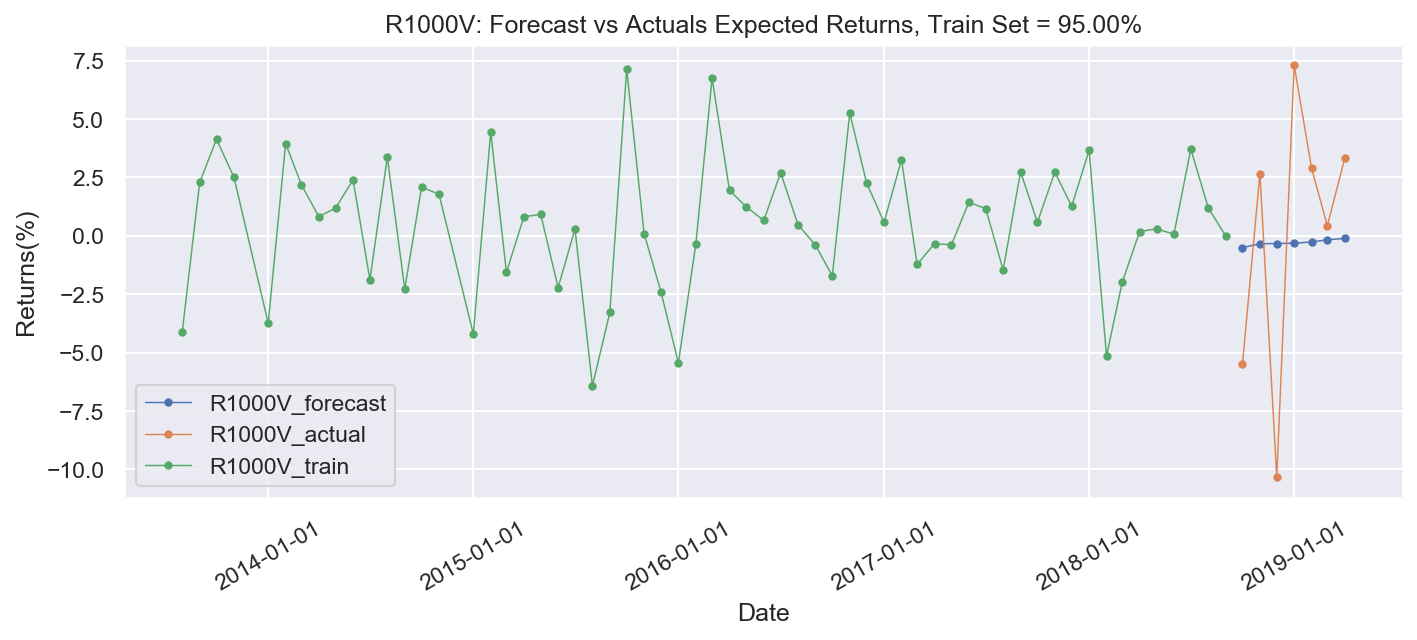

In [41]:
forecast_plot(df1_forecast_R1000V,new_df1_R1000V,2,95)

## Part Two: Global Indices VS Global Indicators

### 3. Global Indices

* ACWI Net TR USD 
* ACWI ex USA Net TR USD 
* MSCI EAFE Net TR USD

In [42]:
# Monthly Data
ACWI = pd.read_excel('historyIndex_MSCI.xls', skiprows=5,header=1,skipfooter=18)
ACWI = ACWI.set_index('Date')
ACWI_exUSA = pd.read_excel('historyIndex_MSCI ex USA.xls', skiprows=5,header=1,skipfooter=18)
ACWI_exUSA = ACWI_exUSA.set_index('Date')
EAFE = pd.read_excel('historyIndex_MSCI EAFE.xls', skiprows=5,header=1,skipfooter=18)
EAFE = EAFE.set_index('Date')
Indice_2 = pd.concat([ACWI,ACWI_exUSA,EAFE],join='inner',axis=1)
TR_2 = np.log(Indice_2).diff().dropna()

In [43]:
# Change frequency to monthly
TR_2_M = TR_2.resample('MS').sum()*100
TR_2_M

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


### 4 Forecasting Global Indices

#### 4.1 Data Preparation

CCI_OECD
Date                
2015-01-01   0.69323
2015-02-01   0.75575
2015-03-01   0.72092
2015-04-01   0.62111
2015-05-01   0.52240
2015-06-01   0.47134
2015-07-01   0.39816
2015-08-01   0.32383
2015-09-01   0.27356
2015-10-01   0.33295
2015-11-01   0.38703
2015-12-01   0.27540
2016-01-01   0.04480
2016-02-01  -0.15910
2016-03-01  -0.25060
2016-04-01  -0.23710
2016-05-01  -0.11810
2016-06-01  -0.06970
2016-07-01  -0.02640
2016-08-01   0.05670
2016-09-01   0.11850
2016-10-01   0.03270
2016-11-01  -0.05380
2016-12-01  -0.04270
2017-01-01   0.04070
2017-02-01   0.17730
2017-03-01   0.31180
2017-04-01   0.38800
2017-05-01   0.38160
2017-06-01   0.38990
2017-07-01   0.46560
2017-08-01   0.51930
2017-09-01   0.54790
2017-10-01   0.60200
2017-11-01   0.55960
2017-12-01   0.49140
2018-01-01   0.49670
2018-02-01   0.51720
2018-03-01   0.46270
2018-04-01   0.35430
2018-05-01   0.26980
2018-06-01   0.24160
2018-07-01   0.21220
2018-08-01   0.10780
2018-09-01  -0.01390
2018-10-01  -0.17500
2018-11-01  -0.28920
2018-12-01  -0.37220
2019-01-01  -0.45330
2019-02-01  -0.44690
2019-03-01  -0.38580
2019-04-01  -0.33410
2019-05-01  -0.33180
2019-06-01  -0.38040
2019-07-01  -0.40760

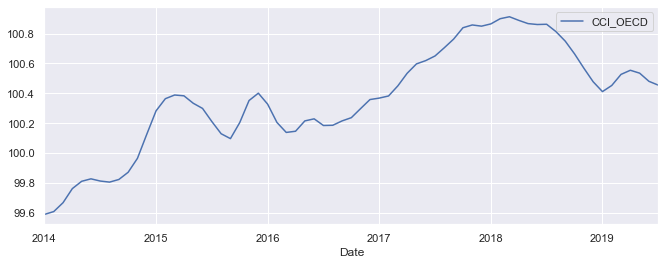

In [44]:
# indicators from OECD downloaded data
def OECD_Month(df,colname):
    df = df.drop(['LOCATION'],axis=1).rename(columns={'TIME':'Date','Value':colname})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.asfreq(freq='MS',method='bfill')
    df.plot()
    return df
CCI = pd.read_csv("CCI.csv",usecols=[0,5,6])
CCI_OECD = CCI[CCI.LOCATION =='OECD'].reset_index(drop=True)
CCI_OECD = OECD_Month(CCI_OECD,'CCI_OECD')
# Eliminate seasonal effect
CCI_OECD = CCI_OECD.diff(periods=12).dropna()
CCI_OECD

In [45]:
merge4 = pd.concat([TR_2_M,CCI_OECD],join='inner',axis=1)
merge4

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

0


[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

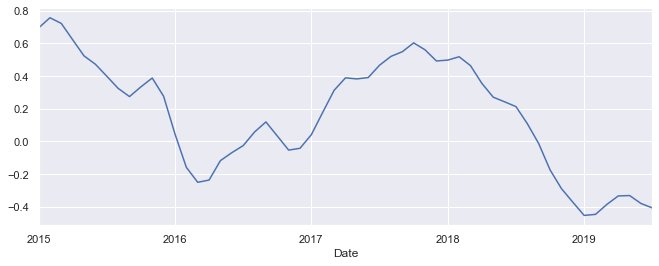

In [46]:
# ADF Test
merge4_diff = merge4.copy()

[index_remove4,merge4_differenced]=ADF_Test(merge4_diff)
index_remove4
merge4_differenced

PPI_Euro
2000-01-01      81.6
2000-02-01      81.9
2000-03-01      82.0
2000-04-01      82.2
2000-05-01      82.5
2000-06-01      82.6
2000-07-01      82.9
2000-08-01      83.1
2000-09-01      83.4
2000-10-01      83.6
2000-11-01      83.8
2000-12-01      83.9
2001-01-01      84.2
2001-02-01      84.6
2001-03-01      85.0
2001-04-01      85.3
2001-05-01      85.4
2001-06-01      85.6
2001-07-01      85.7
2001-08-01      85.6
2001-09-01      85.5
2001-10-01      85.5
2001-11-01      85.5
2001-12-01      85.6
2002-01-01      85.8
2002-02-01      85.8
2002-03-01      86.0
2002-04-01      86.0
2002-05-01      86.0
2002-06-01      85.9
...              ...
2017-01-01     101.0
2017-02-01     101.1
2017-03-01     101.1
2017-04-01     101.6
2017-05-01     101.7
2017-06-01     101.7
2017-07-01     101.7
2017-08-01     101.7
2017-09-01     101.7
2017-10-01     101.6
2017-11-01     101.4
2017-12-01     101.4
2018-01-01     101.2
2018-02-01     101.0
2018-03-01     101.0
2018-04-01     101.0
2018-05-01     101.0
2018-06-01     101.0
2018-07-01     100.9
2018-08-01     100.9
2018-09-01     100.8
2018-10-01     100.8
2018-11-01     100.9
2018-12-01     100.9
2019-01-01     101.0
2019-02-01     101.1
2019-03-01     101.2
2019-04-01     101.4
2019-05-01     101.5
2019-06-01     101.6

[234 rows x 1 columns]

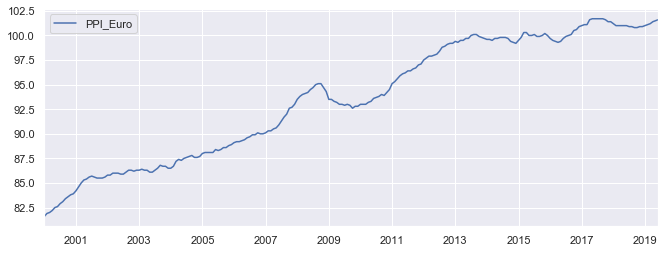

In [47]:
# Monthly Data
PPI_Euro = fred.get_series('PITGCG01EZM661N').dropna()
PPI_Euro = pd.DataFrame(PPI_Euro,columns=['PPI_Euro']).asfreq(freq='MS',method='ffill')
PPI_Euro.plot()
PPI_Euro
PPI_Euro = PPI_Euro.diff(periods=12).dropna()

C:\ProgramData\Anaconda3\lib\site-packages\pandasdmx\writer\data2pandas.py:124: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  d_frame = PD.concat(list(pd_series), axis=1, copy=False)


retail_trade
Date                    
1971-01-01       2.05460
1971-02-01       2.09187
1971-03-01       2.44833
1971-04-01       3.08063
1971-05-01       2.28762
1971-06-01       2.33528
1971-07-01       2.04932
1971-08-01       2.14708
1971-09-01       2.80954
1971-10-01       2.95419
1971-11-01       3.51473
1971-12-01       2.21546
1972-01-01       2.17222
1972-02-01       1.94425
1972-03-01       2.88956
1972-04-01       1.63648
1972-05-01       2.56399
1972-06-01       2.49373
1972-07-01       2.71403
1972-08-01       3.23228
1972-09-01       2.75641
1972-10-01       2.68422
1972-11-01       2.65864
1972-12-01       4.17277
1973-01-01       4.38253
1973-02-01       5.07041
1973-03-01       4.01656
1973-04-01       3.86458
1973-05-01       2.71320
1973-06-01       3.10242
...                  ...
2017-01-01       2.23530
2017-02-01       2.03270
2017-03-01       2.46300
2017-04-01       2.62460
2017-05-01       2.22530
2017-06-01       2.26020
2017-07-01       1.93330
2017-08-01       1.83340
2017-09-01       2.91480
2017-10-01       1.73080
2017-11-01       3.16760
2017-12-01       2.66040
2018-01-01       2.04910
2018-02-01       2.11920
2018-03-01       2.33680
2018-04-01       2.04620
2018-05-01       2.97770
2018-06-01       2.56580
2018-07-01       2.53690
2018-08-01       2.80940
2018-09-01       1.50590
2018-10-01       2.39080
2018-11-01       1.89680
2018-12-01       0.45340
2019-01-01       1.72650
2019-02-01       1.44880
2019-03-01       2.08450
2019-04-01       1.85890
2019-05-01       1.15560
2019-06-01       1.80580

[582 rows x 1 columns]

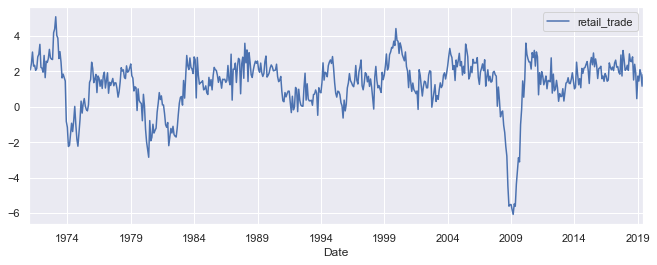

In [48]:
# Get OECD Data through API (not so stable),
# might need to rerun the cell to get the result
def OECD_API_M(df,colname):
    df = df.rename(columns={'index':'Date','M':colname})
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df = df.asfreq(freq='MS',method='ffill')
    df = df.diff(periods=12).dropna()
    df.plot()
    return df

oecd = pandasdmx.Request('OECD')
data_response = oecd.data(resource_id='MEI_REAL')
retail_trade = data_response.write(data_response.data.series, parse_time=False)
retail_trade = retail_trade['SLRTTO01']['OECD']['M'].dropna()
retail_trade = retail_trade.reset_index()

retail_trade = OECD_API_M(retail_trade,'retail_trade')
retail_trade

industry_production
Date                           
1976-01-01              1.39705
1976-02-01              2.35386
1976-03-01              2.71172
1976-04-01              3.48753
1976-05-01              3.97053
1976-06-01              3.83950
1976-07-01              3.87385
1976-08-01              3.67011
1976-09-01              3.87121
1976-10-01              3.53334
1976-11-01              3.85906
1976-12-01              3.63586
1977-01-01              3.40326
1977-02-01              2.90801
1977-03-01              2.92768
1977-04-01              2.57885
1977-05-01              2.11731
1977-06-01              2.13179
1977-07-01              1.74768
1977-08-01              1.99897
1977-09-01              1.71192
1977-10-01              1.61783
1977-11-01              1.15530
1977-12-01              1.30957
1978-01-01              0.96064
1978-02-01              0.79423
1978-03-01              0.90087
1978-04-01              1.78888
1978-05-01              1.62082
1978-06-01              1.66024
...                         ...
2016-12-01              2.07272
2017-01-01              0.88680
2017-02-01              1.44130
2017-03-01              2.34949
2017-04-01              2.79930
2017-05-01              3.40613
2017-06-01              2.92670
2017-07-01              3.62010
2017-08-01              3.45430
2017-09-01              3.46820
2017-10-01              3.34320
2017-11-01              3.72860
2017-12-01              4.18740
2018-01-01              3.08300
2018-02-01              3.37700
2018-03-01              3.34440
2018-04-01              2.77140
2018-05-01              2.79950
2018-06-01              2.78140
2018-07-01              2.50500
2018-08-01              2.51110
2018-09-01              2.19170
2018-10-01              2.28470
2018-11-01              0.61830
2018-12-01             -0.18640
2019-01-01              0.92780
2019-02-01              0.42170
2019-03-01              0.32690
2019-04-01             -0.00130
2019-05-01              0.68260

[521 rows x 1 columns]

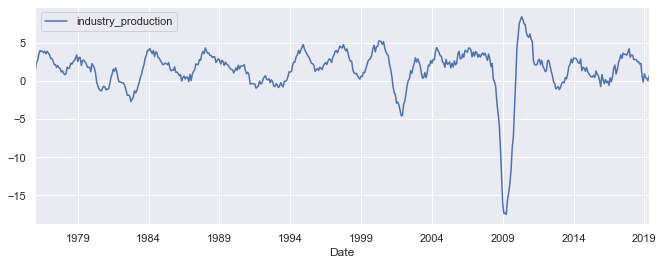

In [49]:
data_response = oecd.data(resource_id='MEI_REAL')
industry_production = data_response.write(data_response.data.series, parse_time=False)
industry_production = industry_production['PRINTO01']['OECD']['M'].dropna()
industry_production = industry_production.reset_index()
industry_production = OECD_API_M(industry_production,'industry_production')
industry_production

In [50]:
merge5 = pd.concat([TR_2_M,PPI_Euro,retail_trade,industry_production],join='inner',axis=1)
merge5

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-01-01                        2.482919   
2001-02-01                       -8.809918   
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-01-01                               1.482950   
2001-02-01                              -8.251965   
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   


1
1
0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


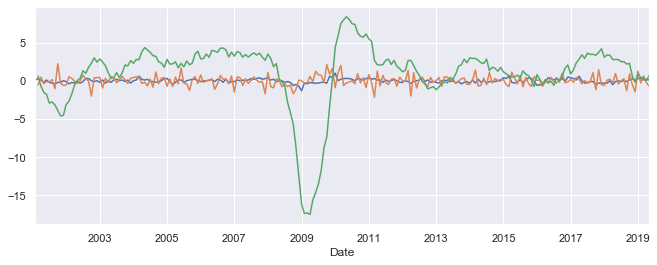

In [51]:
# ADF Test
merge5_diff = merge5.copy()

[index_remove5,merge5_differenced]=ADF_Test(merge5_diff)
index_remove5
merge5_differenced

In [52]:
GDP = pd.read_excel("IMF_GDP.xlsx")
Inflation = pd.read_excel("IMF_Inflation.xlsx")
Balance = pd.read_excel("IMF_Current.xlsx")
NetBL = pd.read_excel("IMF_NetBL.xlsx")
Debt = pd.read_excel("IMF_Debt.xlsx")

In [53]:
def IMF_Data(df):
    # Emerging Economies
    col_name = df.columns[0]
    df_Emerging = df[df[col_name]=='Emerging market and developing economies'].T
    df_Emerging = df_Emerging.reset_index().iloc[1:,:]
    col1 = df_Emerging.columns[0]
    col2 = df_Emerging.columns[1]
    col_name1 = col_name+"_Emerging"
    df_Emerging = df_Emerging.rename(columns = {col1:'Date',col2:col_name1})
    df_Emerging = df_Emerging[df_Emerging[col_name1]!='no data'].reset_index(drop=True)
    df_Emerging['Date'] = pd.to_datetime(df_Emerging['Date'],format='%Y')
    df_Emerging = df_Emerging.set_index('Date').asfreq(freq='MS',method='ffill').astype({col_name1: 'float64'})
    df_Emerging = df_Emerging.diff(periods=12).dropna()
    df_Emerging.plot()
    
    # Advanced Economies
    df_Advanced = df[df[col_name]=='Advanced economies'].T
    df_Advanced = df_Advanced.reset_index().iloc[1:,:]
    col3 = df_Advanced.columns[1]
    col_name2 = col_name+'_Advanced'
    df_Advanced = df_Advanced.rename(columns = {col1:'Date',col3:col_name2})
    df_Advanced = df_Advanced[df_Advanced[col_name2]!='no data'].reset_index(drop=True)
    df_Advanced['Date'] = pd.to_datetime(df_Advanced['Date'],format='%Y')
    df_Advanced = df_Advanced.set_index('Date').asfreq(freq='MS',method='ffill').astype({col_name2: 'float64'})
    df_Advanced = df_Advanced.diff(periods=12).dropna()
    df_Advanced.plot()
    return df_Emerging,df_Advanced

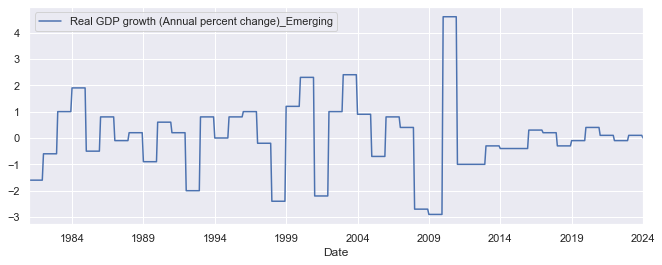

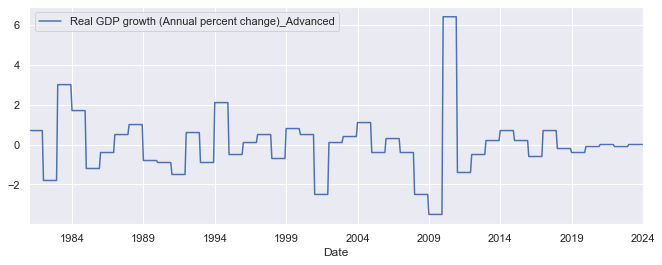

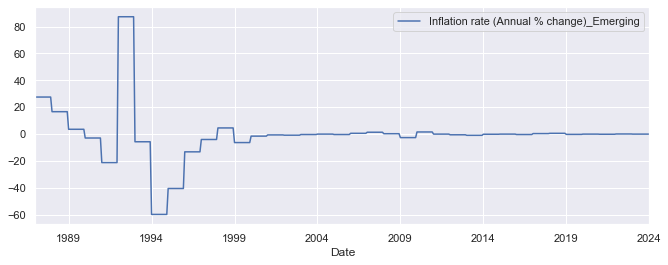

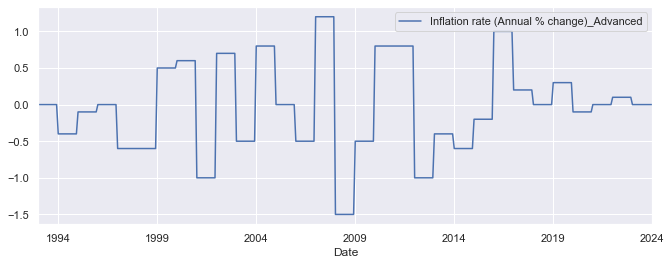

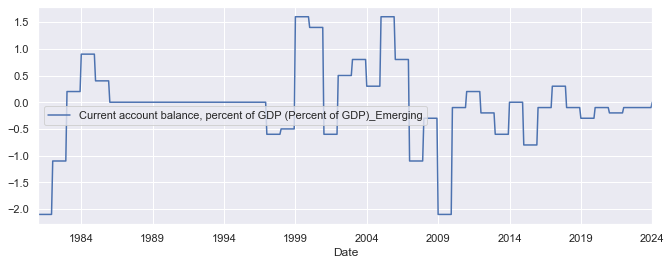

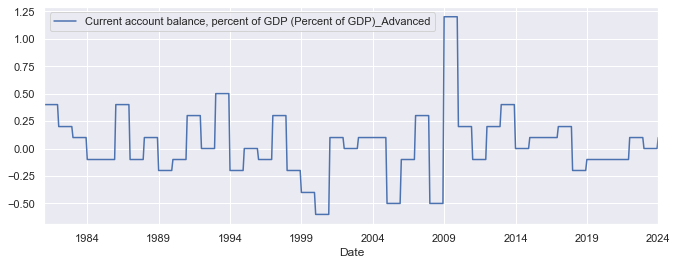

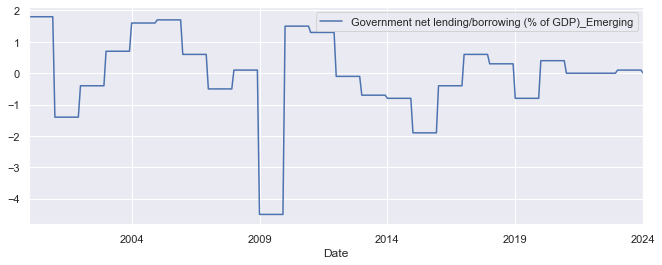

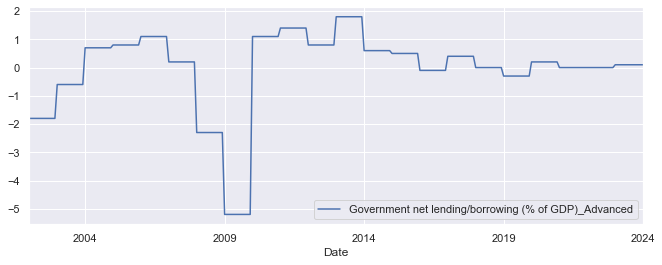

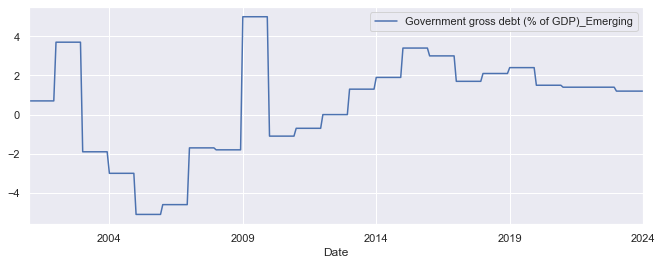

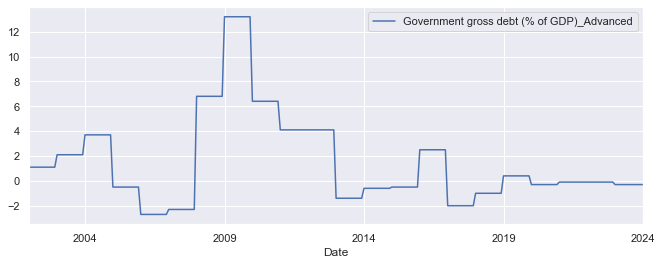

In [54]:
[GDP_Emerging,GDP_Advanced] = IMF_Data(GDP)
[Inflation_Emerging,Inflation_Advanced] = IMF_Data(Inflation)
[Balance_Emerging,Balance_Advanced] = IMF_Data(Balance)
[NetBL_Emerging,NetBL_Advanced] = IMF_Data(NetBL)
[Debt_Emerging,Debt_Advanced] = IMF_Data(Debt)

In [55]:
merge6 = pd.concat([TR_2_M,GDP_Emerging,GDP_Advanced,Inflation_Emerging,Inflation_Advanced,
                     Balance_Emerging,Balance_Advanced,NetBL_Emerging,NetBL_Advanced,
                     Debt_Emerging,Debt_Advanced],join='inner',axis=1)

merge6

ACWI Standard (Large+Mid Cap)   \
Date                                         
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
2003-09-01                        0.605609   
2003-10-01                        5.862538   
2003-11-01                        1.486256   
2003-12-01                        6.119540   
2004-01-01                        1.674971   
2004-02-01                        1.793572   
2004-03-01                       -0.573196   
2004-04-01                       -2.376723   
2004-05-01                        0.773472   
2004-06-01                        1.959747   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   
2002-10-01                               5.218098   
2002-11-01                               4.684674   
2002-12-01                              -3.293724   
2003-01-01                              -3.583394   
2003-02-01                              -2.066294   
2003-03-01                              -2.030773   
2003-04-01                               9.108662   
2003-05-01                               6.094905   
2003-06-01                               2.675763   
2003-07-01                               2.612471   


#### 4.1.1 Forecast the returns for EAFE

In [56]:
# Granger Test
[causation_matrix,index_remove,merge4_tested] = causation_test(merge4_differenced,2,3)
causation_matrix
index_remove
merge4_tested

            EAFE Standard (Large+Mid Cap)   CCI_OECD
Date                                                
2015-01-01                        0.487645   0.69323
2015-02-01                        5.806216   0.75575
2015-03-01                       -1.530766   0.72092
2015-04-01                        4.001753   0.62111
2015-05-01                       -0.513193   0.52240
2015-06-01                       -2.874268   0.47134
2015-07-01                        2.055070   0.39816
2015-08-01                       -7.640913   0.32383
2015-09-01                       -5.211017   0.27356
2015-10-01                        7.526464   0.33295
2015-11-01                       -1.567915   0.38703
2015-12-01                       -1.356572   0.27540
2016-01-01                       -7.506189   0.04480
2016-02-01                       -1.849067  -0.15910
2016-03-01                        6.303813  -0.25060
2016-04-01                        2.853993  -0.23710
2016-05-01                       -0.912559  -0

EAFE Standard (Large+Mid Cap) _x  CCI_OECD_x
EAFE Standard (Large+Mid Cap) _y                            1.0000      0.0004
CCI_OECD_y                                                  0.0003      1.0000

[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

In [57]:
# Grangers Causation Test
[causation_matrix,index_remove,merge5_tested] = causation_test(merge5_differenced,2,3)
causation_matrix
index_remove
merge5_tested

            EAFE Standard (Large+Mid Cap)       PPI_Euro  retail_trade  \
Date                                                                     
2001-03-01                       -6.898659  3.000000e-01      -0.53485   
2001-04-01                        6.718359  1.000000e-01       0.47081   
2001-05-01                       -3.593168 -2.000000e-01      -0.37352   
2001-06-01                       -4.175518  1.000000e-01      -0.09058   
2001-07-01                       -1.836245 -2.000000e-01      -0.13415   
2001-08-01                       -2.566816 -3.000000e-01       0.15084   
2001-09-01                      -10.679162 -4.000000e-01      -1.03901   
2001-10-01                        2.528992 -2.000000e-01       2.23691   
2001-11-01                        3.619946 -2.000000e-01      -0.31980   
2001-12-01                        0.592362 -1.421085e-14      -0.61475   
2002-01-01                       -5.459832 -1.000000e-01      -0.54838   
2002-02-01                        0.69

EAFE Standard (Large+Mid Cap) _x  \
EAFE Standard (Large+Mid Cap) _y                            1.0000   
PPI_Euro_y                                                  0.1344   
retail_trade_y                                              0.0002   
industry_production_y                                       0.0000   

                                  PPI_Euro_x  retail_trade_x  \
EAFE Standard (Large+Mid Cap) _y      0.4069          0.0381   
PPI_Euro_y                            1.0000          0.0000   
retail_trade_y                        0.0001          1.0000   
industry_production_y                 0.0003          0.0000   

                                  industry_production_x  
EAFE Standard (Large+Mid Cap) _y                 0.0357  
PPI_Euro_y                                       0.0001  
retail_trade_y                                   0.0000  
industry_production_y                            1.0000

[3]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


In [58]:
# Grangers Causation Test
[causation_matrix,index_remove,merge6_tested] = causation_test(merge6,2,3)
causation_matrix
index_remove
merge6_tested

            EAFE Standard (Large+Mid Cap)   \
Date                                         
2002-01-01                       -5.459832   
2002-02-01                        0.698988   
2002-03-01                        5.268001   
2002-04-01                        0.660519   
2002-05-01                        1.259102   
2002-06-01                       -4.061957   
2002-07-01                      -10.393948   
2002-08-01                       -0.227250   
2002-09-01                      -11.360946   
2002-10-01                        5.235079   
2002-11-01                        4.438568   
2002-12-01                       -3.420284   
2003-01-01                       -4.264416   
2003-02-01                       -2.321733   
2003-03-01                       -1.984351   
2003-04-01                        9.350116   
2003-05-01                        5.882783   
2003-06-01                        2.387864   
2003-07-01                        2.391817   
2003-08-01                        

EAFE Standard (Large+Mid Cap) _x  \
EAFE Standard (Large+Mid Cap) _y                                              1.0000   
Real GDP growth (Annual percent change)_Emerging_y                            0.0018   
Real GDP growth (Annual percent change)_Advanced_y                            0.0000   
Inflation rate (Annual % change)_Emerging_y                                   0.0001   
Inflation rate (Annual % change)_Advanced_y                                   0.1975   
Current account balance, percent of GDP (Percen...                            0.0091   
Current account balance, percent of GDP (Percen...                            0.0000   
Government net lending/borrowing (% of GDP)_Eme...                            0.0000   
Government net lending/borrowing (% of GDP)_Adv...                            0.0006   
Government gross debt (% of GDP)_Emerging_y                                   0.0014   
Government gross debt (% of GDP)_Advanced_y                                   0.0451   

                                                    Real GDP growth (Annual percent change)_Emerging_x  \
EAFE Standard (Large+Mid Cap) _y                                                               0.0007    
Real GDP growth (Annual percent change)_Emerging_y                                             1.0000    
Real GDP growth (Annual percent change)_Advanced_y                                             0.7700    
Inflation rate (Annual % change)_Emerging_y                                                    0.0074    
Inflation rate (Annual % change)_Advanced_y                                                    0.0891    
Current account balance, percent of GDP (Percen...                                             0.2174    
Current account balance, percent of GDP (Percen...                                             0.1834    
Government net lending/borrowing (% of GDP)_Eme...                                             0.0751    
Government net lending/borrowing (% of GDP)_Adv...                                             0.4546    
Government gross debt (% of GDP)_Emerging_y                                                    0.2708    
Government gross debt (% of GDP)_Advanced_y                                                    0.6239    

                                                    Real GDP growth (Annual percent change)_Advanced_x  \
EAFE Standard (Large+Mid Cap) _y                                                               0.0026    
Real GDP growth (Annual percent change)_Emerging_y                                             0.3947    
Real GDP growth (Annual percent change)_Advanced_y                                             1.0000    
Inflation rate (Annual % change)_Emerging_y                                                    0.0000    
Inflation rate (Annual % change)_Advanced_y                                                    0.3164    
Current account balance, percent of GDP (Percen...                                             0.3950    
Current account balance, percent of GDP (Percen...                                             0.2222    
Government net lending/borrowing (% of GDP)_Eme...                                             0.2865    
Government net lending/borrowing (% of GDP)_Adv...                                             0.4620    
Government gross debt (% of GDP)_Emerging_y                                                    0.7928    
Government gross debt (% of GDP)_Advanced_y                                                    0.4993    

                                                    Inflation rate (Annual % change)_Emerging_x  \
EAFE Standard (Large+Mid Cap) _y                                                         0.0074   
Real GDP growth (Annual percent change)_Emerging_y                                       0.0000   
Real GDP growth (Annual percent change)_Advanced_y                                       0.0000   
Inflation rate (Annual % change)_Emerging_y          

[7, 9, 11]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
2003-09-01                        0.605609   
2003-10-01                        5.862538   
2003-11-01                        1.486256   
2003-12-01                        6.119540   
2004-01-01                        1.674971   
2004-02-01                        1.793572   
2004-03-01                       -0.573196   
2004-04-01                       -2.376723   
2004-05-01                        0.773472   
2004-06-01                        1.959747   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   
2002-10-01                               5.218098   
2002-11-01                               4.684674   
2002-12-01                              -3.293724   
2003-01-01                              -3.583394   
2003-02-01                              -2.066294   
2003-03-01                              -2.030773   
2003-04-01                               9.108662   
2003-05-01                               6.094905   
2003-06-01                               2.675763   
2003-07-01                               2.612471   


* Create Composite and Forecast

In [59]:
# Merge the three forecasts based on the index "date"
df2_merge_EAFE = pd.concat([merge4_tested,merge5_tested,merge6_tested],
                            join='inner',axis=1).T.drop_duplicates().T
df2_merge_EAFE
Indicator2_EAFE = df2_merge_EAFE.iloc[:,3:]
Indicator2_EAFE = (Indicator2_EAFE-Indicator2_EAFE.mean())/Indicator2_EAFE.std()
Composite2_EAFE = pd.DataFrame(Indicator2_EAFE.mean(axis=1),columns={'Composite'})

new_df2_EAFE = pd.concat([df2_merge_EAFE.iloc[:,:3],Composite2_EAFE],join='inner',axis=1)
new_df2_EAFE

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

In [60]:
# Train Set = 95%
[model2_fitted_EAFE,df2_EAFE,df2_train_EAFE,df2_test_EAFE,df2_forecast_EAFE] = VAR_Model(new_df2_EAFE,2,0.05)
df2_forecast_EAFE
df2_test_EAFE

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:13:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.243660
Nobs:                     46.0000    HQIC:                 -0.203844
Log likelihood:          -101.689    FPE:                   0.630228
AIC:                    -0.471895    Det(Omega_mle):        0.440847
--------------------------------------------------------------------
Results for equation EAFE Standard (Large+Mid Cap) 
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.057706         0.523912            0.110           0.912
L1.EAFE Standard (Large+Mid Cap)         -0.265545      

EAFE Standard (Large+Mid Cap) _forecast  Composite_forecast
Date                                                                   
2019-03-01                                -6.697755           -0.504106
2019-04-01                                -2.486051           -0.201087
2019-05-01                                -1.095412           -0.402488

EAFE Standard (Large+Mid Cap)   Composite
Date                                                 
2019-03-01                        0.628599  -0.542648
2019-04-01                        2.772732  -0.686422
2019-05-01                       -4.921743  -0.711232

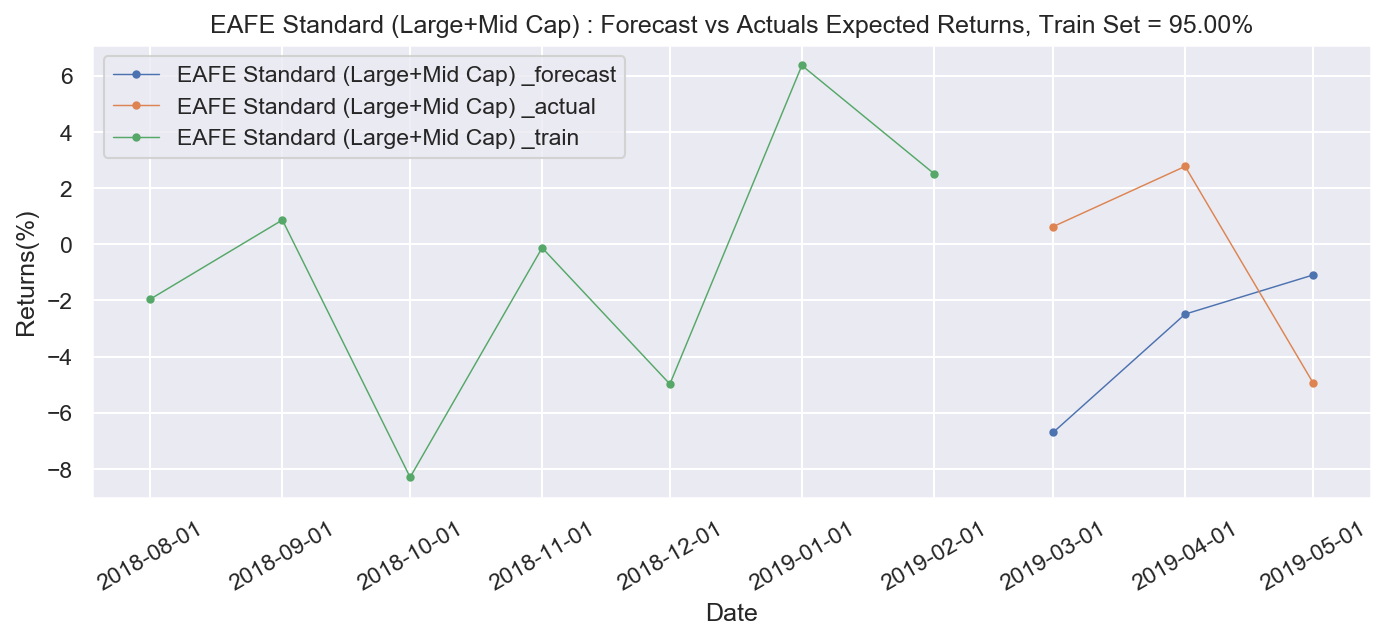

In [61]:
forecast_plot(df2_forecast_EAFE,new_df2_EAFE,2,95)

#### 4.1.2 Forecast the returns for ACWI

In [62]:
[causation_matrix,index_remove,merge4_tested_ACWI] = causation_test(merge4_differenced,0,3)
causation_matrix
index_remove
merge4_tested_ACWI

            ACWI Standard (Large+Mid Cap)   CCI_OECD
Date                                                
2015-01-01                       -1.575821   0.69323
2015-02-01                        5.417695   0.75575
2015-03-01                       -1.561583   0.72092
2015-04-01                        2.860148   0.62111
2015-05-01                       -0.130563   0.52240
2015-06-01                       -2.382347   0.47134
2015-07-01                        0.864648   0.39816
2015-08-01                       -7.101387   0.32383
2015-09-01                       -3.690154   0.27356
2015-10-01                        7.555724   0.33295
2015-11-01                       -0.829184   0.38703
2015-12-01                       -1.819871   0.27540
2016-01-01                       -6.220588   0.04480
2016-02-01                       -0.690262  -0.15910
2016-03-01                        7.149027  -0.25060
2016-04-01                        1.465346  -0.23710
2016-05-01                        0.125949  -0

ACWI Standard (Large+Mid Cap) _x  CCI_OECD_x
ACWI Standard (Large+Mid Cap) _y                               1.0      0.0005
CCI_OECD_y                                                     0.0      1.0000

[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

In [63]:
[causation_matrix,index_remove,merge5_tested_ACWI] = causation_test(merge5_differenced,0,3)
causation_matrix
index_remove
merge5_tested_ACWI

            ACWI Standard (Large+Mid Cap)       PPI_Euro  retail_trade  \
Date                                                                     
2001-03-01                       -7.007856  3.000000e-01      -0.53485   
2001-04-01                        6.990809  1.000000e-01       0.47081   
2001-05-01                       -1.182203 -2.000000e-01      -0.37352   
2001-06-01                       -3.141000  1.000000e-01      -0.09058   
2001-07-01                       -1.609420 -2.000000e-01      -0.13415   
2001-08-01                       -4.740498 -3.000000e-01       0.15084   
2001-09-01                       -9.607513 -4.000000e-01      -1.03901   
2001-10-01                        2.088319 -2.000000e-01       2.23691   
2001-11-01                        5.940744 -2.000000e-01      -0.31980   
2001-12-01                        0.911157 -1.421085e-14      -0.61475   
2002-01-01                       -2.799256 -1.000000e-01      -0.54838   
2002-02-01                       -0.76

ACWI Standard (Large+Mid Cap) _x  \
ACWI Standard (Large+Mid Cap) _y                            1.0000   
PPI_Euro_y                                                  0.0823   
retail_trade_y                                              0.0001   
industry_production_y                                       0.0000   

                                  PPI_Euro_x  retail_trade_x  \
ACWI Standard (Large+Mid Cap) _y      0.2866           0.018   
PPI_Euro_y                            1.0000           0.000   
retail_trade_y                        0.0001           1.000   
industry_production_y                 0.0003           0.000   

                                  industry_production_x  
ACWI Standard (Large+Mid Cap) _y                 0.0228  
PPI_Euro_y                                       0.0001  
retail_trade_y                                   0.0000  
industry_production_y                            1.0000

[3]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


In [64]:
[causation_matrix,index_remove,merge6_tested_ACWI] = causation_test(merge6,0,3)
causation_matrix
index_remove
merge6_tested_ACWI

            ACWI Standard (Large+Mid Cap)   \
Date                                         
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        

ACWI Standard (Large+Mid Cap) _x  \
ACWI Standard (Large+Mid Cap) _y                                              1.0000   
Real GDP growth (Annual percent change)_Emerging_y                            0.0046   
Real GDP growth (Annual percent change)_Advanced_y                            0.0000   
Inflation rate (Annual % change)_Emerging_y                                   0.0001   
Inflation rate (Annual % change)_Advanced_y                                   0.1367   
Current account balance, percent of GDP (Percen...                            0.0091   
Current account balance, percent of GDP (Percen...                            0.0000   
Government net lending/borrowing (% of GDP)_Eme...                            0.0000   
Government net lending/borrowing (% of GDP)_Adv...                            0.0001   
Government gross debt (% of GDP)_Emerging_y                                   0.0009   
Government gross debt (% of GDP)_Advanced_y                                   0.0314   

                                                    Real GDP growth (Annual percent change)_Emerging_x  \
ACWI Standard (Large+Mid Cap) _y                                                               0.0016    
Real GDP growth (Annual percent change)_Emerging_y                                             1.0000    
Real GDP growth (Annual percent change)_Advanced_y                                             0.7700    
Inflation rate (Annual % change)_Emerging_y                                                    0.0074    
Inflation rate (Annual % change)_Advanced_y                                                    0.0891    
Current account balance, percent of GDP (Percen...                                             0.2174    
Current account balance, percent of GDP (Percen...                                             0.1834    
Government net lending/borrowing (% of GDP)_Eme...                                             0.0751    
Government net lending/borrowing (% of GDP)_Adv...                                             0.4546    
Government gross debt (% of GDP)_Emerging_y                                                    0.2708    
Government gross debt (% of GDP)_Advanced_y                                                    0.6239    

                                                    Real GDP growth (Annual percent change)_Advanced_x  \
ACWI Standard (Large+Mid Cap) _y                                                               0.0053    
Real GDP growth (Annual percent change)_Emerging_y                                             0.3947    
Real GDP growth (Annual percent change)_Advanced_y                                             1.0000    
Inflation rate (Annual % change)_Emerging_y                                                    0.0000    
Inflation rate (Annual % change)_Advanced_y                                                    0.3164    
Current account balance, percent of GDP (Percen...                                             0.3950    
Current account balance, percent of GDP (Percen...                                             0.2222    
Government net lending/borrowing (% of GDP)_Eme...                                             0.2865    
Government net lending/borrowing (% of GDP)_Adv...                                             0.4620    
Government gross debt (% of GDP)_Emerging_y                                                    0.7928    
Government gross debt (% of GDP)_Advanced_y                                                    0.4993    

                                                    Inflation rate (Annual % change)_Emerging_x  \
ACWI Standard (Large+Mid Cap) _y                                                         0.0091   
Real GDP growth (Annual percent change)_Emerging_y                                       0.0000   
Real GDP growth (Annual percent change)_Advanced_y                                       0.0000   
Inflation rate (Annual % change)_Emerging_y          

[7, 9, 11]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
2003-09-01                        0.605609   
2003-10-01                        5.862538   
2003-11-01                        1.486256   
2003-12-01                        6.119540   
2004-01-01                        1.674971   
2004-02-01                        1.793572   
2004-03-01                       -0.573196   
2004-04-01                       -2.376723   
2004-05-01                        0.773472   
2004-06-01                        1.959747   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   
2002-10-01                               5.218098   
2002-11-01                               4.684674   
2002-12-01                              -3.293724   
2003-01-01                              -3.583394   
2003-02-01                              -2.066294   
2003-03-01                              -2.030773   
2003-04-01                               9.108662   
2003-05-01                               6.094905   
2003-06-01                               2.675763   
2003-07-01                               2.612471   


* Create Composite and Forecast

In [65]:
# Merge the three forecasts based on the index "date"
df2_merge_ACWI = pd.concat([merge4_tested_ACWI,merge5_tested_ACWI,merge6_tested_ACWI],
                            join='inner',axis=1).T.drop_duplicates().T
df2_merge_ACWI
Indicator2_ACWI = df2_merge_ACWI.iloc[:,3:]
Indicator2_ACWI = (Indicator2_ACWI-Indicator2_ACWI.mean())/Indicator2_ACWI.std()
Composite2_ACWI = pd.DataFrame(Indicator2_ACWI.mean(axis=1),columns={'Composite'})

new_df2_ACWI = pd.concat([df2_merge_ACWI.iloc[:,:3],Composite2_ACWI],join='inner',axis=1)
new_df2_ACWI

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

In [66]:
# Train Set = 95%
[model2_fitted_ACWI,df2_ACWI,df2_train_ACWI,df2_test_ACWI,df2_forecast_ACWI] = VAR_Model(new_df2_ACWI,0,0.05)
df2_forecast_ACWI
df2_test_ACWI

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:15:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.198170
Nobs:                     48.0000    HQIC:                 -0.440684
Log likelihood:          -112.106    FPE:                   0.556279
AIC:                    -0.588003    Det(Omega_mle):        0.456271
--------------------------------------------------------------------
Results for equation ACWI Standard (Large+Mid Cap) 
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.483521         0.494916            0.977           0.329
L1.ACWI Standard (Large+Mid Cap)         -0.150300      

ACWI Standard (Large+Mid Cap) _forecast  Composite_forecast
Date                                                                   
2019-03-01                                -3.249780           -0.379557
2019-04-01                                 0.078144           -0.376498
2019-05-01                                -0.104685           -0.411846

ACWI Standard (Large+Mid Cap)   Composite
Date                                                 
2019-03-01                        1.249418  -0.542648
2019-04-01                        3.320987  -0.686422
2019-05-01                       -6.115188  -0.711232

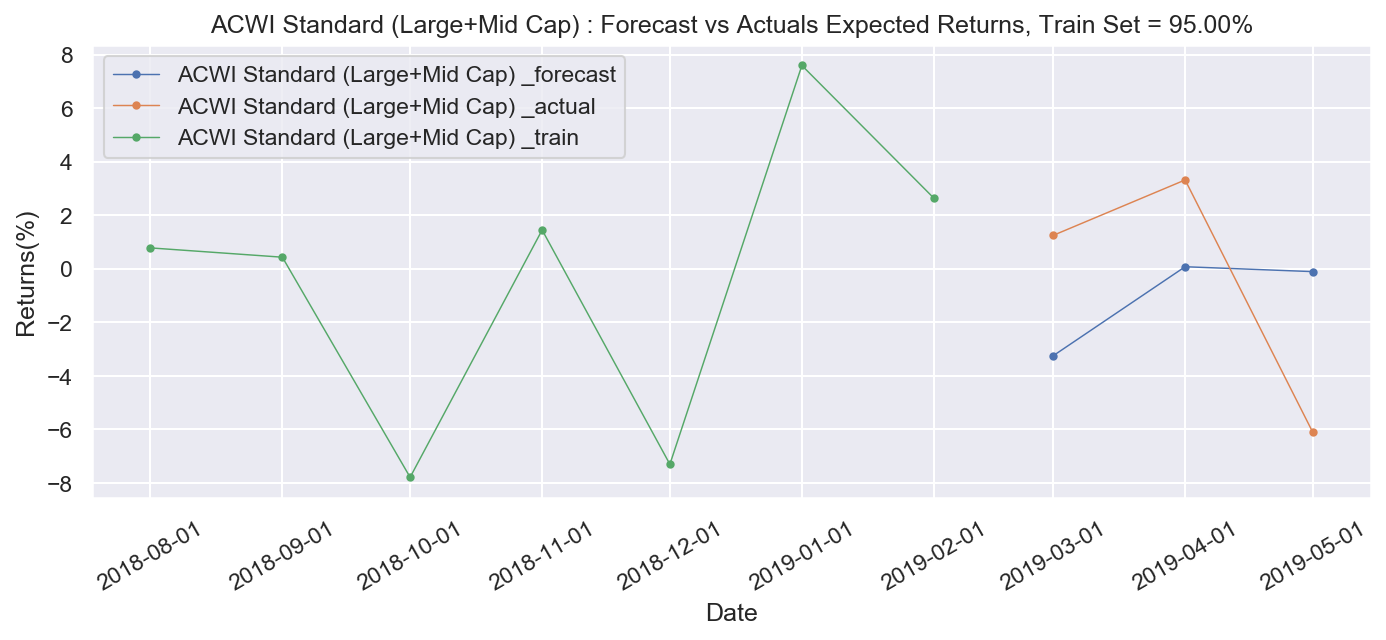

In [67]:
forecast_plot(df2_forecast_ACWI,new_df2_ACWI,0,95)

#### 4.1.3 Forecast the returns for ACWI ex USA

In [68]:
[causation_matrix,index_remove,merge4_tested_ACWI_exUSA] = causation_test(merge4_differenced,1,3)
causation_matrix
index_remove
merge4_tested_ACWI_exUSA

            ACWI ex USA Standard (Large+Mid Cap)   CCI_OECD
Date                                                       
2015-01-01                              -0.148287   0.69323
2015-02-01                               5.208461   0.75575
2015-03-01                              -1.629695   0.72092
2015-04-01                               4.928196   0.62111
2015-05-01                              -1.573472   0.52240
2015-06-01                              -2.829764   0.47134
2015-07-01                              -0.278227   0.39816
2015-08-01                              -7.951185   0.32383
2015-09-01                              -4.747652   0.27356
2015-10-01                               7.180210   0.33295
2015-11-01                              -2.085747   0.38703
2015-12-01                              -1.901501   0.27540
2016-01-01                              -7.044573   0.04480
2016-02-01                              -1.149534  -0.15910
2016-03-01                              

ACWI ex USA Standard (Large+Mid Cap) _x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                   1.0000   
CCI_OECD_y                                                                0.0004   

                                         CCI_OECD_x  
ACWI ex USA Standard (Large+Mid Cap) _y      0.0003  
CCI_OECD_y                                   1.0000

[]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01 

In [69]:
[causation_matrix,index_remove,merge5_tested_ACWI_exUSA] = causation_test(merge5_differenced,1,3)
causation_matrix
index_remove
merge5_tested_ACWI_exUSA

            ACWI ex USA Standard (Large+Mid Cap)       PPI_Euro  retail_trade  \
Date                                                                            
2001-03-01                              -7.379277  3.000000e-01      -0.53485   
2001-04-01                               6.526041  1.000000e-01       0.47081   
2001-05-01                              -2.876030 -2.000000e-01      -0.37352   
2001-06-01                              -3.949976  1.000000e-01      -0.09058   
2001-07-01                              -2.262334 -2.000000e-01      -0.13415   
2001-08-01                              -2.537509 -3.000000e-01       0.15084   
2001-09-01                             -11.240150 -4.000000e-01      -1.03901   
2001-10-01                               2.765227 -2.000000e-01       2.23691   
2001-11-01                               4.464221 -2.000000e-01      -0.31980   
2001-12-01                               1.276394 -1.421085e-14      -0.61475   
2002-01-01                  

ACWI ex USA Standard (Large+Mid Cap) _x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                   1.0000   
PPI_Euro_y                                                                0.0525   
retail_trade_y                                                            0.0001   
industry_production_y                                                     0.0000   

                                         PPI_Euro_x  retail_trade_x  \
ACWI ex USA Standard (Large+Mid Cap) _y      0.3434          0.0476   
PPI_Euro_y                                   1.0000          0.0000   
retail_trade_y                               0.0001          1.0000   
industry_production_y                        0.0003          0.0000   

                                         industry_production_x  
ACWI ex USA Standard (Large+Mid Cap) _y                 0.0473  
PPI_Euro_y                                              0.0001  
retail_trade_y                                          0.0000  
industry_production_y                                   1.0000

[3]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2001-03-01                       -7.007856   
2001-04-01                        6.990809   
2001-05-01                       -1.182203   
2001-06-01                       -3.141000   
2001-07-01                       -1.609420   
2001-08-01                       -4.740498   
2001-09-01                       -9.607513   
2001-10-01                        2.088319   
2001-11-01                        5.940744   
2001-12-01                        0.911157   
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
...                                    ...   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2001-03-01                              -7.379277   
2001-04-01                               6.526041   
2001-05-01                              -2.876030   
2001-06-01                              -3.949976   
2001-07-01                              -2.262334   
2001-08-01                              -2.537509   
2001-09-01                             -11.240150   
2001-10-01                               2.765227   
2001-11-01                               4.464221   
2001-12-01                               1.276394   
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   


In [70]:
[causation_matrix,index_remove,merge6_tested_ACWI_exUSA] = causation_test(merge6,1,3)
causation_matrix
index_remove
merge6_tested_ACWI_exUSA

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   
2002-10-01                               5.218098   
2002-11-01                               4.684674   
2002-12-01                              -3.293724   
2003-01-01                              -3.583394   
2003-02-01                              -2.066294   
2003-03-01                              -2.030773   
2003-04-01                               9.108662   
2003-05-01                               6.094

ACWI ex USA Standard (Large+Mid Cap) _x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                              1.0000   
Real GDP growth (Annual percent change)_Emerging_y                                   0.0026   
Real GDP growth (Annual percent change)_Advanced_y                                   0.0000   
Inflation rate (Annual % change)_Emerging_y                                          0.0000   
Inflation rate (Annual % change)_Advanced_y                                          0.1104   
Current account balance, percent of GDP (Percen...                                   0.0022   
Current account balance, percent of GDP (Percen...                                   0.0000   
Government net lending/borrowing (% of GDP)_Eme...                                   0.0000   
Government net lending/borrowing (% of GDP)_Adv...                                   0.0007   
Government gross debt (% of GDP)_Emerging_y                                          0.0003   
Government gross debt (% of GDP)_Advanced_y                                          0.0601   

                                                    Real GDP growth (Annual percent change)_Emerging_x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                                        0.0020    
Real GDP growth (Annual percent change)_Emerging_y                                             1.0000    
Real GDP growth (Annual percent change)_Advanced_y                                             0.7700    
Inflation rate (Annual % change)_Emerging_y                                                    0.0074    
Inflation rate (Annual % change)_Advanced_y                                                    0.0891    
Current account balance, percent of GDP (Percen...                                             0.2174    
Current account balance, percent of GDP (Percen...                                             0.1834    
Government net lending/borrowing (% of GDP)_Eme...                                             0.0751    
Government net lending/borrowing (% of GDP)_Adv...                                             0.4546    
Government gross debt (% of GDP)_Emerging_y                                                    0.2708    
Government gross debt (% of GDP)_Advanced_y                                                    0.6239    

                                                    Real GDP growth (Annual percent change)_Advanced_x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                                        0.0078    
Real GDP growth (Annual percent change)_Emerging_y                                             0.3947    
Real GDP growth (Annual percent change)_Advanced_y                                             1.0000    
Inflation rate (Annual % change)_Emerging_y                                                    0.0000    
Inflation rate (Annual % change)_Advanced_y                                                    0.3164    
Current account balance, percent of GDP (Percen...                                             0.3950    
Current account balance, percent of GDP (Percen...                                             0.2222    
Government net lending/borrowing (% of GDP)_Eme...                                             0.2865    
Government net lending/borrowing (% of GDP)_Adv...                                             0.4620    
Government gross debt (% of GDP)_Emerging_y                                                    0.7928    
Government gross debt (% of GDP)_Advanced_y                                                    0.4993    

                                                    Inflation rate (Annual % change)_Emerging_x  \
ACWI ex USA Standard (Large+Mid Cap) _y                                                  0.0190   
Real GDP growth (Annual percent change)_Emerging_y                                       0.0000   
Real GDP growth (Annual percent change)_Advanced_y                  

[7, 9, 11]

ACWI Standard (Large+Mid Cap)   \
Date                                         
2002-01-01                       -2.799256   
2002-02-01                       -0.767562   
2002-03-01                        4.382188   
2002-04-01                       -3.256888   
2002-05-01                        0.077016   
2002-06-01                       -6.335876   
2002-07-01                       -8.782482   
2002-08-01                        0.221500   
2002-09-01                      -11.655342   
2002-10-01                        7.078887   
2002-11-01                        5.291551   
2002-12-01                       -4.918101   
2003-01-01                       -2.987762   
2003-02-01                       -1.810081   
2003-03-01                       -0.432356   
2003-04-01                        8.492717   
2003-05-01                        5.590489   
2003-06-01                        1.855072   
2003-07-01                        2.163909   
2003-08-01                        2.311424   
2003-09-01                        0.605609   
2003-10-01                        5.862538   
2003-11-01                        1.486256   
2003-12-01                        6.119540   
2004-01-01                        1.674971   
2004-02-01                        1.793572   
2004-03-01                       -0.573196   
2004-04-01                       -2.376723   
2004-05-01                        0.773472   
2004-06-01                        1.959747   
...                                    ...   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   
2019-06-01                        6.342695   
2019-07-01                        0.292410   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2002-01-01                              -4.386808   
2002-02-01                               0.709522   
2002-03-01                               5.244685   
2002-04-01                               0.593082   
2002-05-01                               1.004461   
2002-06-01                              -4.452693   
2002-07-01                             -10.265927   
2002-08-01                              -0.016783   
2002-09-01                             -11.229084   
2002-10-01                               5.218098   
2002-11-01                               4.684674   
2002-12-01                              -3.293724   
2003-01-01                              -3.583394   
2003-02-01                              -2.066294   
2003-03-01                              -2.030773   
2003-04-01                               9.108662   
2003-05-01                               6.094905   
2003-06-01                               2.675763   
2003-07-01                               2.612471   


* Create Composite and Forecast

In [71]:
# Merge the three forecasts based on the index "date"
df2_merge_ACWI_exUSA = pd.concat([merge4_tested_ACWI_exUSA,merge5_tested_ACWI_exUSA,merge6_tested_ACWI_exUSA],
                            join='inner',axis=1).T.drop_duplicates().T
df2_merge_ACWI_exUSA
Indicator2_ACWI_exUSA = df2_merge_ACWI_exUSA.iloc[:,3:]
Indicator2_ACWI_exUSA = (Indicator2_ACWI_exUSA-Indicator2_ACWI_exUSA.mean())/Indicator2_ACWI_exUSA.std()
Composite2_ACWI_exUSA = pd.DataFrame(Indicator2_ACWI_exUSA.mean(axis=1),columns={'Composite'})

new_df2_ACWI_exUSA = pd.concat([df2_merge_ACWI_exUSA.iloc[:,:3],Composite2_ACWI_exUSA],join='inner',axis=1)
new_df2_ACWI_exUSA

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

ACWI Standard (Large+Mid Cap)   \
Date                                         
2015-01-01                       -1.575821   
2015-02-01                        5.417695   
2015-03-01                       -1.561583   
2015-04-01                        2.860148   
2015-05-01                       -0.130563   
2015-06-01                       -2.382347   
2015-07-01                        0.864648   
2015-08-01                       -7.101387   
2015-09-01                       -3.690154   
2015-10-01                        7.555724   
2015-11-01                       -0.829184   
2015-12-01                       -1.819871   
2016-01-01                       -6.220588   
2016-02-01                       -0.690262   
2016-03-01                        7.149027   
2016-04-01                        1.465346   
2016-05-01                        0.125949   
2016-06-01                       -0.607186   
2016-07-01                        4.219109   
2016-08-01                        0.335869   
2016-09-01                        0.610807   
2016-10-01                       -1.711974   
2016-11-01                        0.757067   
2016-12-01                        2.137243   
2017-01-01                        2.697764   
2017-02-01                        2.766695   
2017-03-01                        1.215594   
2017-04-01                        1.546672   
2017-05-01                        2.184207   
2017-06-01                        0.453674   
2017-07-01                        2.756147   
2017-08-01                        0.382478   
2017-09-01                        1.913517   
2017-10-01                        2.055302   
2017-11-01                        1.917370   
2017-12-01                        1.599379   
2018-01-01                        5.488059   
2018-02-01                       -4.290440   
2018-03-01                       -2.163771   
2018-04-01                        0.950308   
2018-05-01                        0.124649   
2018-06-01                       -0.542765   
2018-07-01                        2.971184   
2018-08-01                        0.782266   
2018-09-01                        0.434441   
2018-10-01                       -7.789546   
2018-11-01                        1.451930   
2018-12-01                       -7.303726   
2019-01-01                        7.599663   
2019-02-01                        2.639719   
2019-03-01                        1.249418   
2019-04-01                        3.320987   
2019-05-01                       -6.115188   

            ACWI ex USA Standard (Large+Mid Cap)   \
Date                                                
2015-01-01                              -0.148287   
2015-02-01                               5.208461   
2015-03-01                              -1.629695   
2015-04-01                               4.928196   
2015-05-01                              -1.573472   
2015-06-01                              -2.829764   
2015-07-01                              -0.278227   
2015-08-01                              -7.951185   
2015-09-01                              -4.747652   
2015-10-01                               7.180210   
2015-11-01                              -2.085747   
2015-12-01                              -1.901501   
2016-01-01                              -7.044573   
2016-02-01                              -1.149534   
2016-03-01                               7.817312   
2016-04-01                               2.597406   
2016-05-01                              -1.702076   
2016-06-01                              -1.541951   
2016-07-01                               4.827145   
2016-08-01                               0.630528   
2016-09-01                               1.225216   
2016-10-01                              -1.448206   
2016-11-01                              -2.340160   
2016-12-01                               2.526108   
2017-01-01                               3.481131   
2017-02-01                               1.581752 

In [72]:
# Train Set = 95%
[model2_fitted_ACWI_exUSA,df2_ACWI_exUSA,df2_train_ACWI_exUSA,df2_test_ACWI_exUSA,df2_forecast_ACWI_exUSA] = VAR_Model(new_df2_ACWI_exUSA,
                                                                                                                       1,0.05)
df2_forecast_ACWI_exUSA
df2_test_ACWI_exUSA

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Sep, 2019
Time:                     16:16:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                -0.00187688
Nobs:                     48.0000    HQIC:                 -0.244392
Log likelihood:          -116.817    FPE:                   0.676926
AIC:                    -0.391710    Det(Omega_mle):        0.555229
--------------------------------------------------------------------
Results for equation ACWI ex USA Standard (Large+Mid Cap) 
                                              coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------------
const                                            0.126866         0.534358            0.237           0.812
L1.ACWI ex USA Standard (Lar

ACWI ex USA Standard (Large+Mid Cap) _forecast  Composite_forecast
Date                                                                          
2019-03-01                                       -3.544873           -0.393911
2019-04-01                                       -0.799525           -0.410597
2019-05-01                                       -0.644343           -0.424467

ACWI ex USA Standard (Large+Mid Cap)   Composite
Date                                                        
2019-03-01                               0.593952  -0.542648
2019-04-01                               2.607491  -0.686422
2019-05-01                              -5.516719  -0.711232

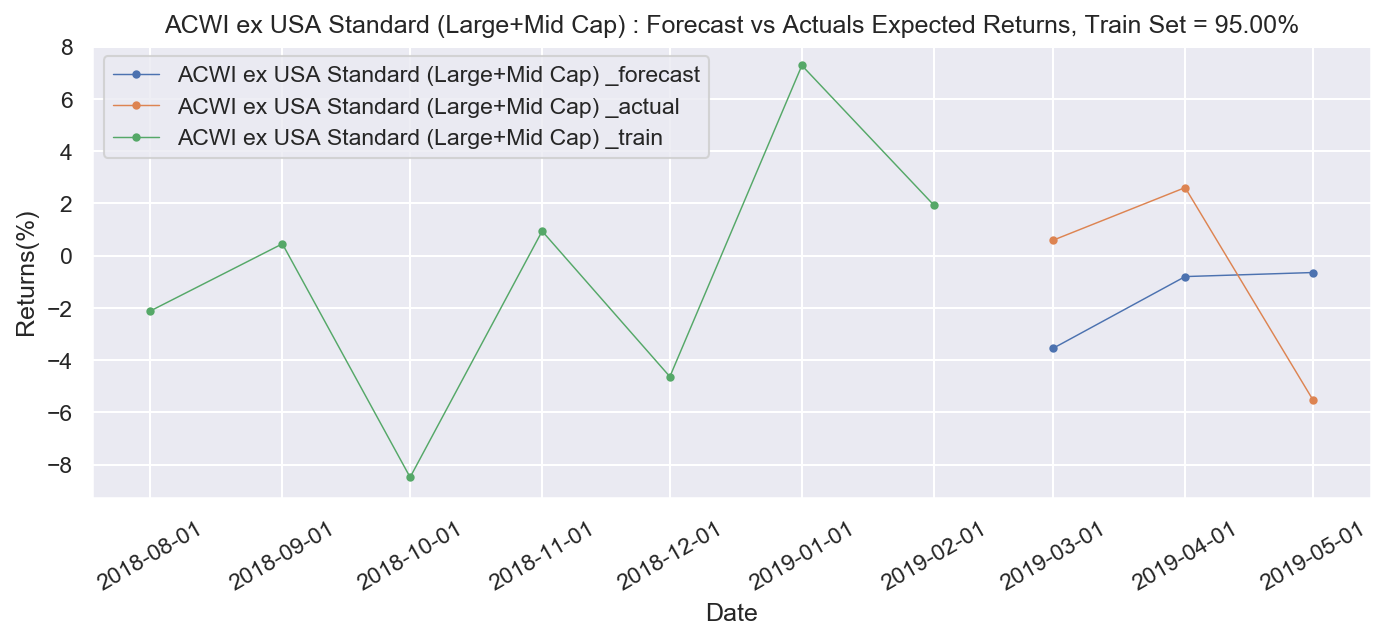

In [73]:
forecast_plot(df2_forecast_ACWI_exUSA,new_df2_ACWI_exUSA,1,95)